#### ADVANCED LINEAR REGRESSION ASSIGNMENT - PART-I

####  Steps Involved to build solution:

1) Read and Understand the data.
2) Data Exploration (EDA).
3) Data Preprocessing.
4) Model Building, Tuning & Evaluation.
5) Comparing Ridge and Lasso models.
6) Conclusion.

In [1]:
## Import required libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
## Suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Step 1: Read and Understand the data.

In [3]:
## Many columns have NA in their values, use keep_default_na as false to prevent it treated NAN and then replace the same with none

housing = pd.read_csv(r'C:\Users\pragyanshree.a.das\Downloads\train.csv',keep_default_na=False)
housing.head()

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL          65     8450   Pave    NA      Reg   
1   2          20       RL          80     9600   Pave    NA      Reg   
2   3          60       RL          68    11250   Pave    NA      IR1   
3   4          70       RL          60     9550   Pave    NA      IR1   
4   5          60       RL          84    14260   Pave    NA      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0     NA    NA          NA       0      2   
1         Lvl    AllPub  ...        0     NA    NA          NA       0      5   
2         Lvl    AllPub  ...        0     NA    NA          NA       0      9   
3         Lvl    AllPub  ...        0     NA    NA          NA       0      2   
4         Lvl    AllPub  ...        0     NA    NA          NA       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
housing[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']] = housing[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']].replace("NA", "None")
housing.head()

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL          65     8450   Pave  None      Reg   
1   2          20       RL          80     9600   Pave  None      Reg   
2   3          60       RL          68    11250   Pave  None      IR1   
3   4          70       RL          60     9550   Pave  None      IR1   
4   5          60       RL          84    14260   Pave  None      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0   None  None        None       0      2   
1         Lvl    AllPub  ...        0   None  None        None       0      5   
2         Lvl    AllPub  ...        0   None  None        None       0      9   
3         Lvl    AllPub  ...        0   None  None        None       0      2   
4         Lvl    AllPub  ...        0   None  None        None       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

Based on data dictionary provided, correct the data types of columns

In [6]:
housing[['MSSubClass', 'OverallQual', 'OverallCond']] = housing[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')
housing['LotFrontage'] = pd.to_numeric(housing['LotFrontage'], errors='coerce')
housing['MasVnrArea'] = pd.to_numeric(housing['MasVnrArea'], errors='coerce')

In [7]:
## set display poistions
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [8]:
## Check statistical summary of the data
housing.describe()

Id  LotFrontage        LotArea    YearBuilt  YearRemodAdd  \
count  1460.000000  1201.000000    1460.000000  1460.000000   1460.000000   
mean    730.500000    70.049958   10516.828082  1971.267808   1984.865753   
std     421.610009    24.284752    9981.264932    30.202904     20.645407   
min       1.000000    21.000000    1300.000000  1872.000000   1950.000000   
25%     365.750000    59.000000    7553.500000  1954.000000   1967.000000   
50%     730.500000    69.000000    9478.500000  1973.000000   1994.000000   
75%    1095.250000    80.000000   11601.500000  2000.000000   2004.000000   
max    1460.000000   313.000000  215245.000000  2010.000000   2010.000000   

        MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  \
count  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    103.685262   443.639726    46.549315   567.240411  1057.429452   
std     181.066207   456.098091   161.319273   441.866955   438.705324   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000   223.000000   795.750000   
50%       0.000000   383.500000     0.000000   477.500000   991.500000   
75%     166.000000   712.250000     0.000000   808.000000  1298.250000   
max    1600.000000  5644.000000  1474.000000  2336.000000  6110.000000   

          1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  \
count  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   
mean   1162.626712   346.992466      5.844521  1515.463699      0.425342   
std     386.587738   436.528436     48.623081   525.480383      0.518911   
min     334.000000     0.000000      0.000000   334.000000      0.000000   
25%     882.000000     0.000000      0.000000  1129.500000      0.000000   
50%    1087.000000     0.000000      0.000000  1464.000000      0.000000   
75%    1391.250000   728.000000      0.000000  1776.750000      1.000000   
max    4692.000000  2065.000000    572.000000  5642.000000      3.000000   

       BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  \
count   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   
mean       0.057534     1.565068     0.382877      2.866438      1.046575   
std        0.238753     0.550916     0.502885      0.815778      0.220338   
min        0.000000     0.000000     0.000000      0.000000      0.000000   
25%        0.000000     1.000000     0.000000      2.000000      1.000000   
50%        0.000000     2.000000     0.000000      3.000000      1.000000   
75%        0.000000     2.000000     1.000000      3.000000      1.000000   
max        2.000000     3.000000     2.000000      8.000000      3.000000   

       TotRmsAbvGrd   Fireplaces   GarageCars   GarageArea   WoodDeckSF  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean       6.517808     0.613014     1.767123   472.980137    94.244521   
std        1.625393     0.644666     0.747315   213.804841   125.338794   
min        2.000000     0.000000     0.000000     0.000000     0.000000   
25%        5.000000     0.000000     1.000000   334.500000     0.000000   
50%        6.000000     1.000000     2.000000   480.000000     0.000000   
75%        7.000000     1.000000     2.000000   576.000000   168.000000   
max       14.000000     3.000000     4.000000  1418.000000   857.000000   

       OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.660274      21.954110     3.409589    15.060959     2.758904   
std      66.256028      61.119149    29.317331    55.757415    40.177307   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     0.000000   
50%      25.000000       0.000000     0.000000     0.000000     0.000000   
75%      68.000000       0.000000     0.000000     0.000000     0.00

In [9]:
## Check for missing vales

housing.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

Only 2 variables have null values which needs to be handled.

## Step 2: Data Exploration (EDA)

In [10]:
## Check target varibale skewness and kurtosis
print("Skewness of target variable", housing['SalePrice'].skew())
print("kurtosis of target variable",housing['SalePrice'].kurt())

Skewness of target variable 1.8828757597682129
kurtosis of target variable 6.536281860064529


Both Skewness and Kurtosis is greater than 1 , lets plot and observe

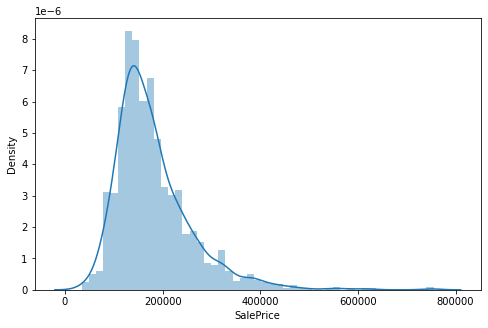

In [11]:
plt.figure(figsize=[8,5])
sns.distplot(housing['SalePrice']);

In [12]:
## Lets use log transform of target variable.
housing['SalePrice'] = np.log(housing['SalePrice'])

In [13]:
print("Skewness of target variable", housing['SalePrice'].skew())
print("kurtosis of target variable",housing['SalePrice'].kurt())

Skewness of target variable 0.12133506220520406
kurtosis of target variable 0.8095319958036296


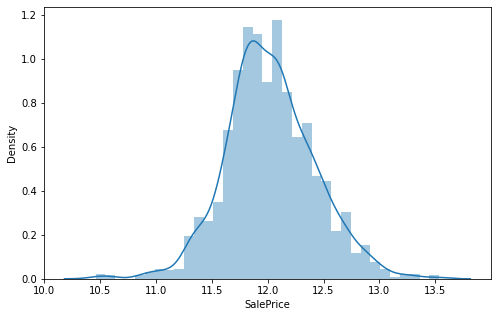

In [14]:
plt.figure(figsize=[8,5])
sns.distplot(housing['SalePrice']);

Target variable is good now

Separate categorial and Continuous values and perform data analysis

In [15]:
## Get age of the house using year built and yr sold
housing['Age'] = housing['YrSold'] - housing['YearBuilt']

In [16]:
housing.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)
housing.drop(['Id'], axis=1, inplace=True)

In [17]:
housing_continuous = housing.select_dtypes(include=['int64', 'float64'])
housing_categorial = housing.select_dtypes(include='object')

In [18]:
##sns.pairplot(housing_continuous)
##plt.show()

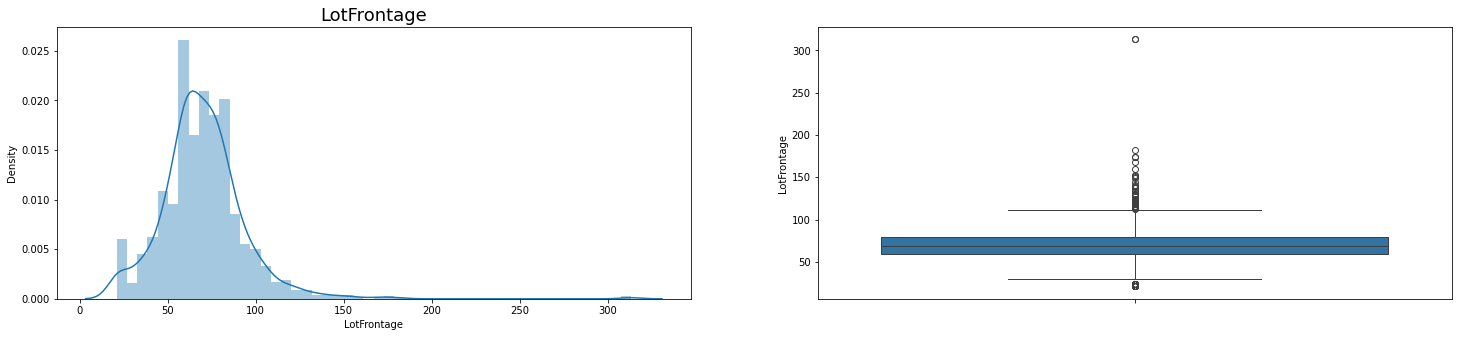

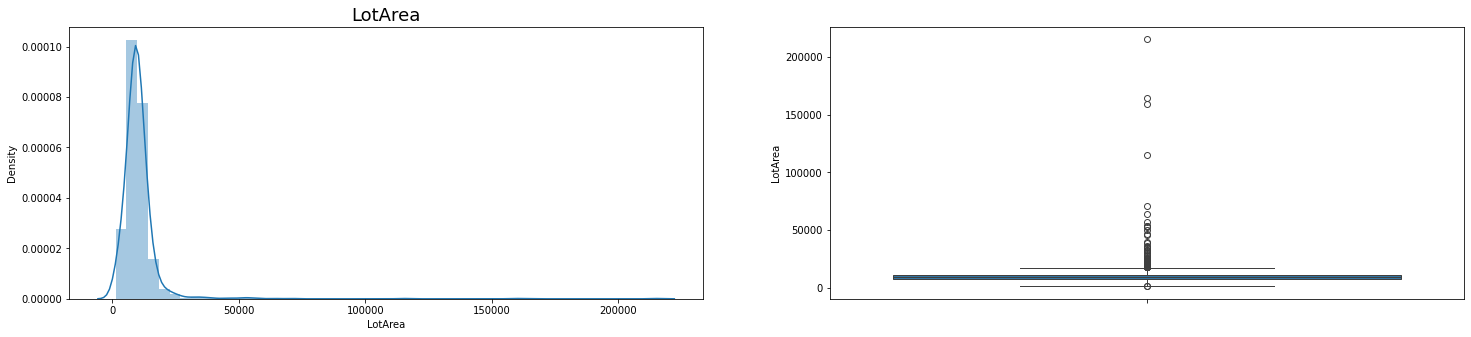

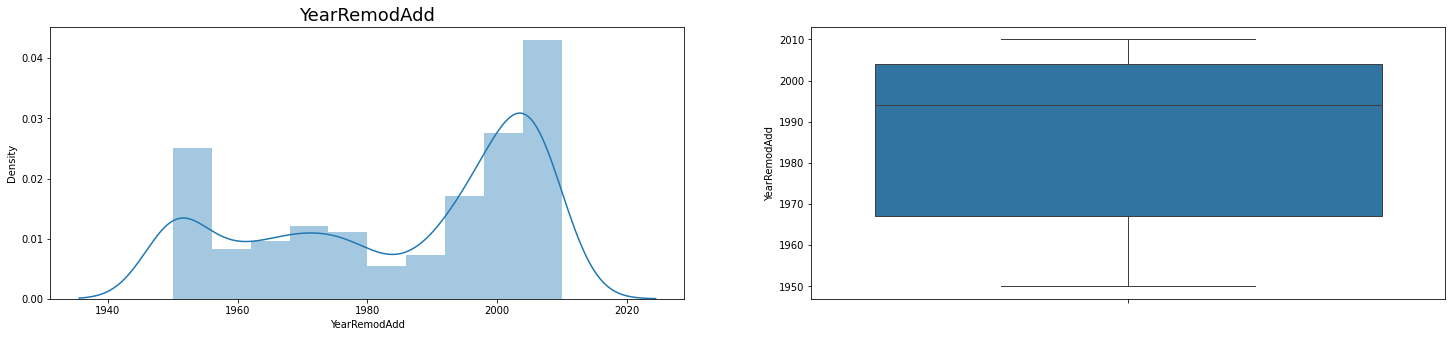

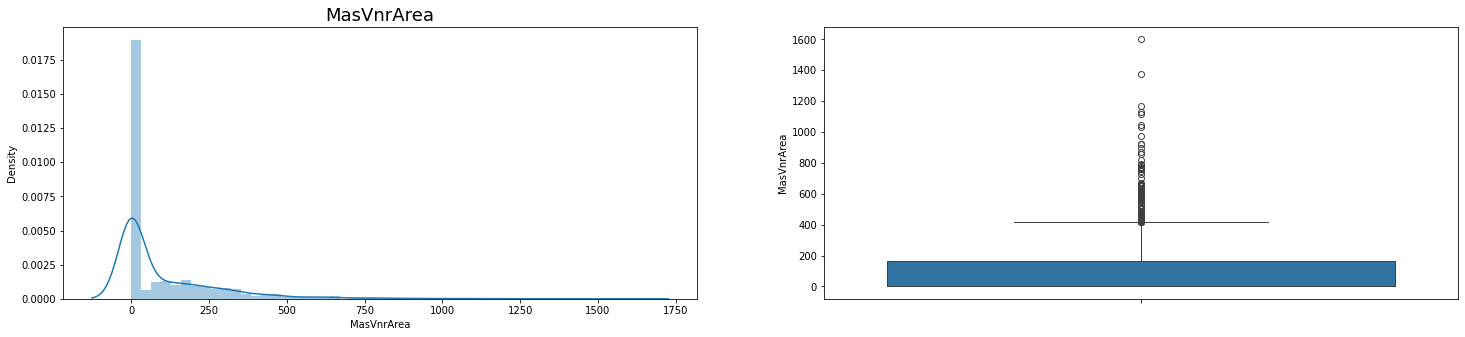

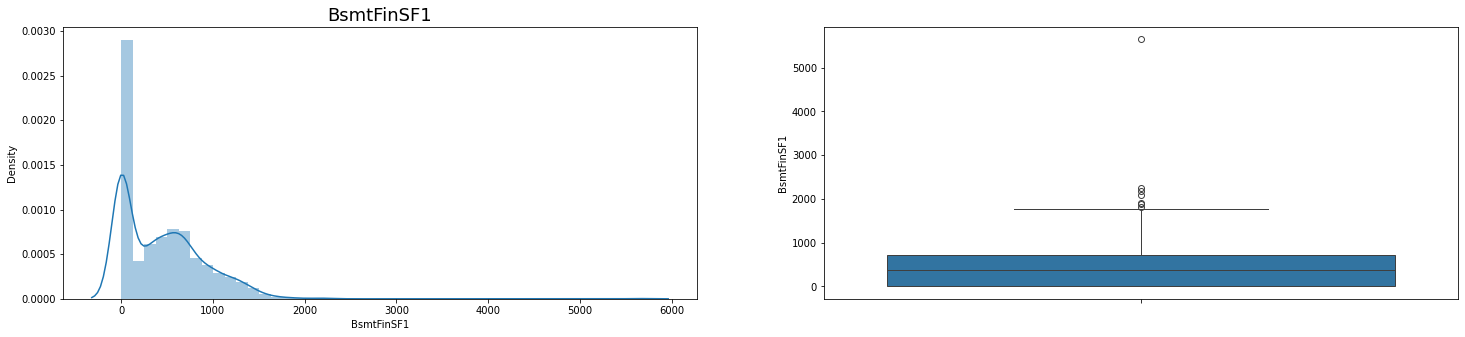

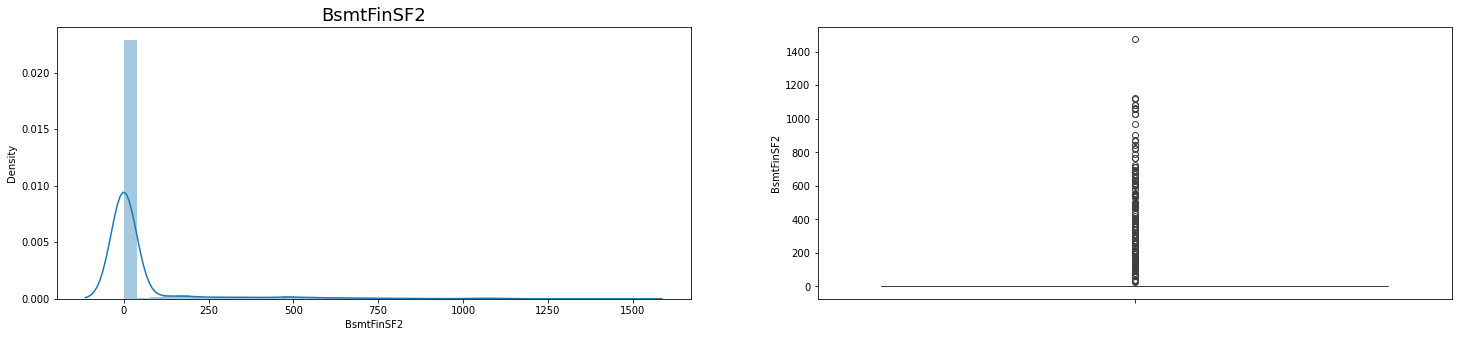

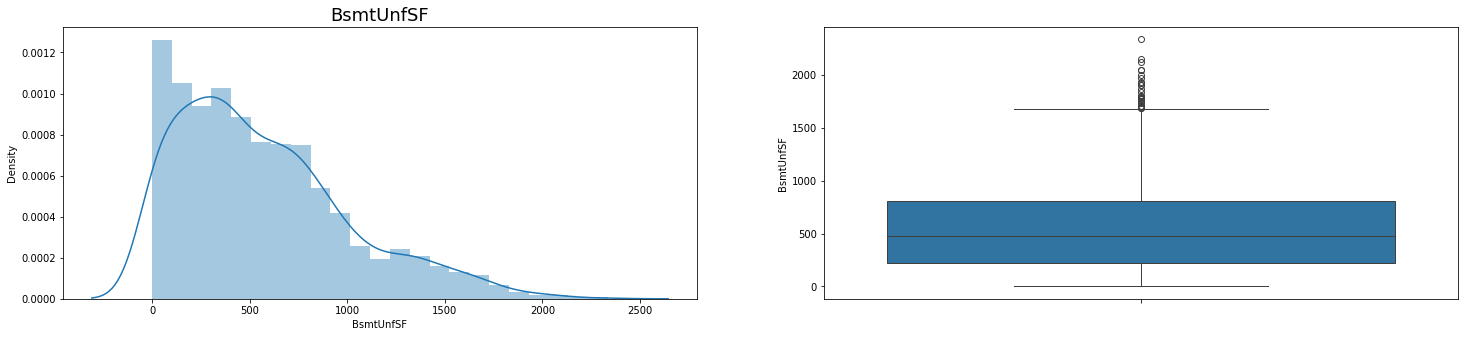

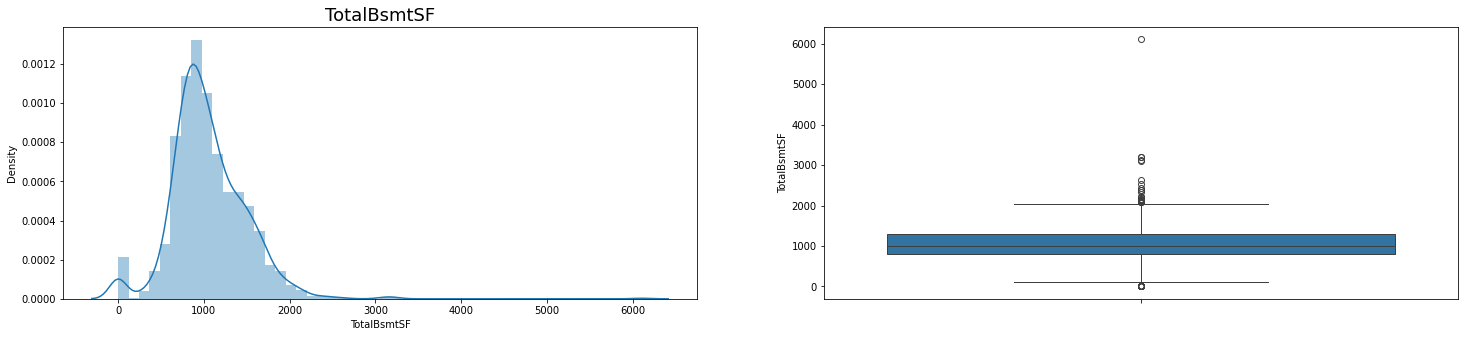

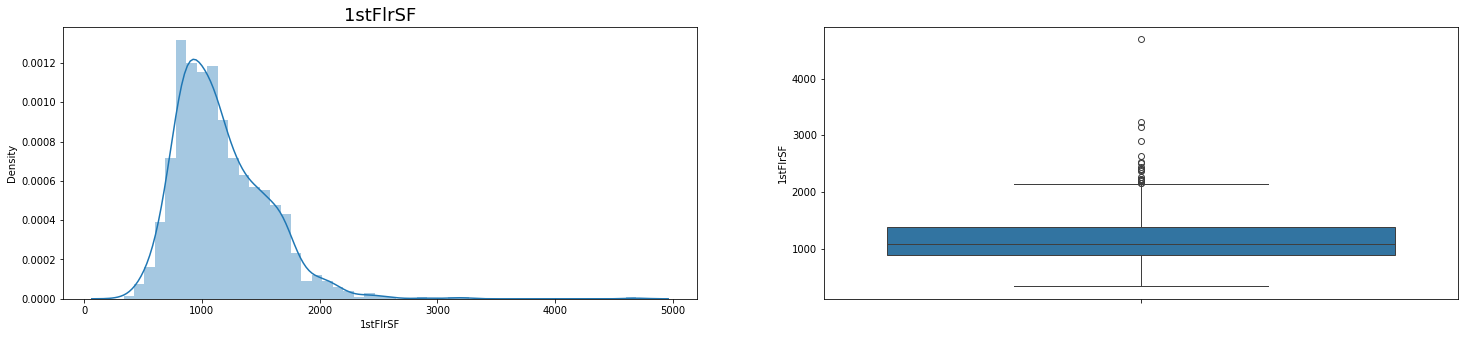

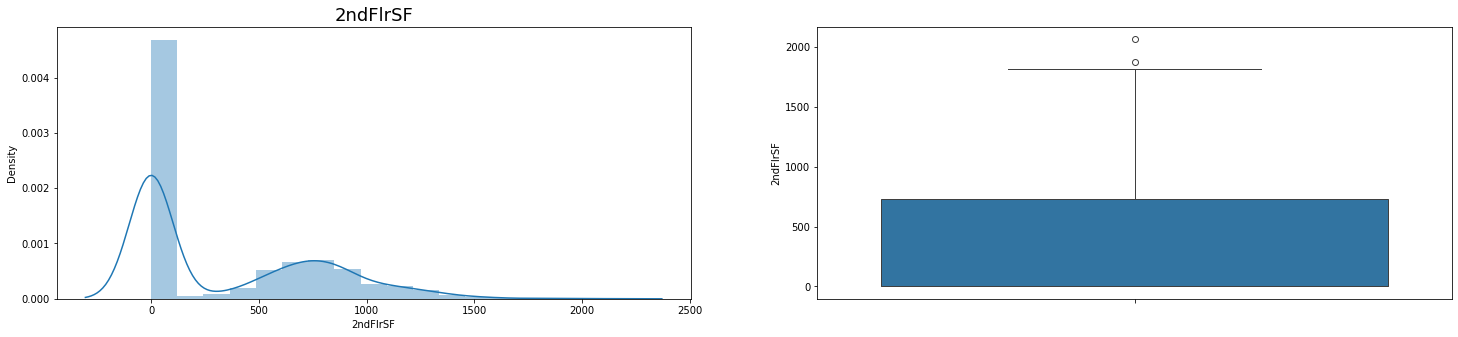

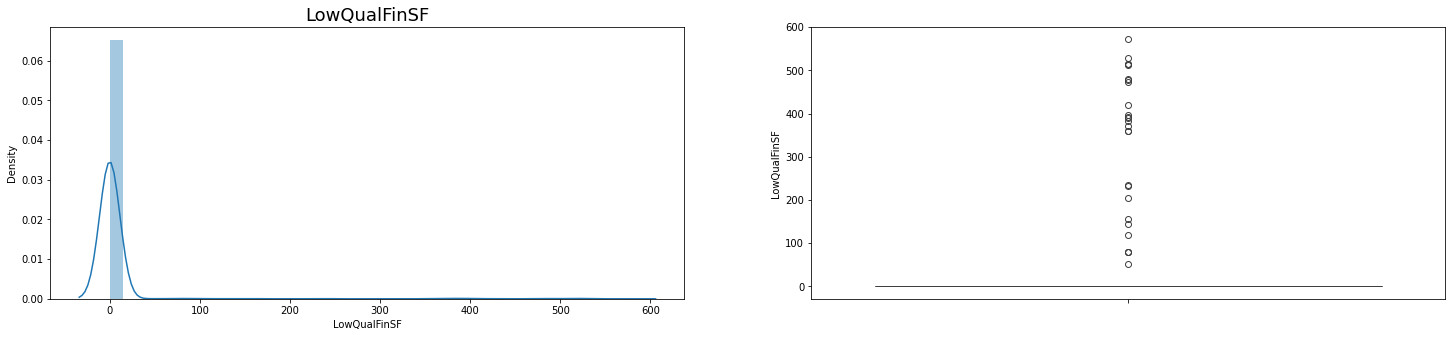

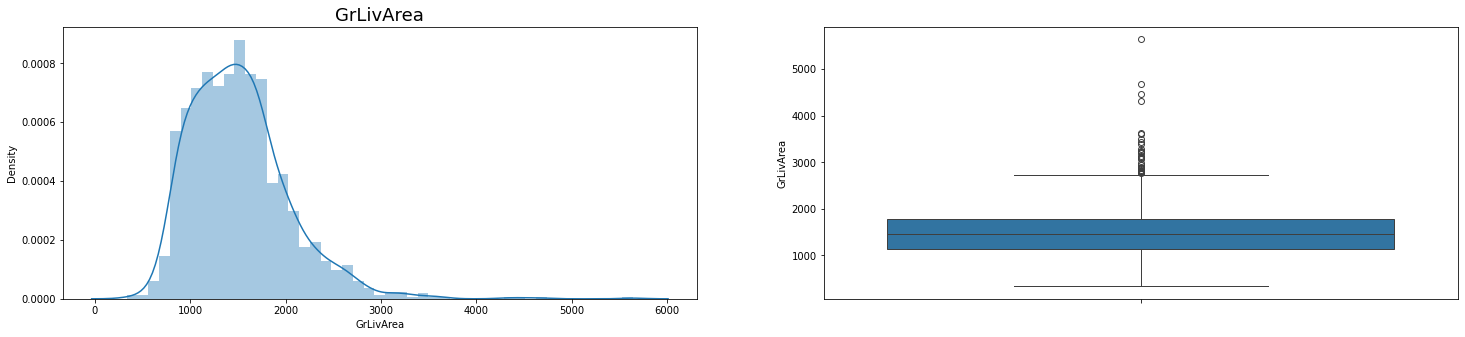

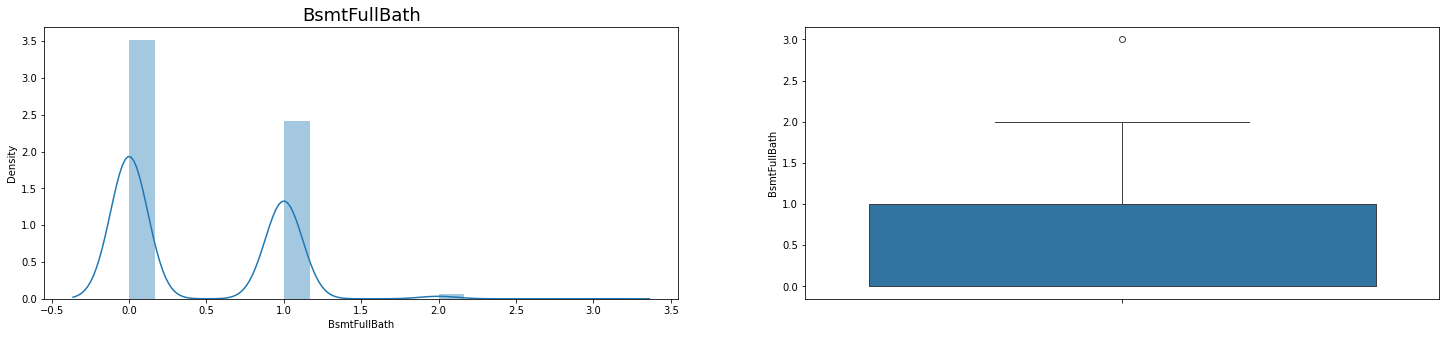

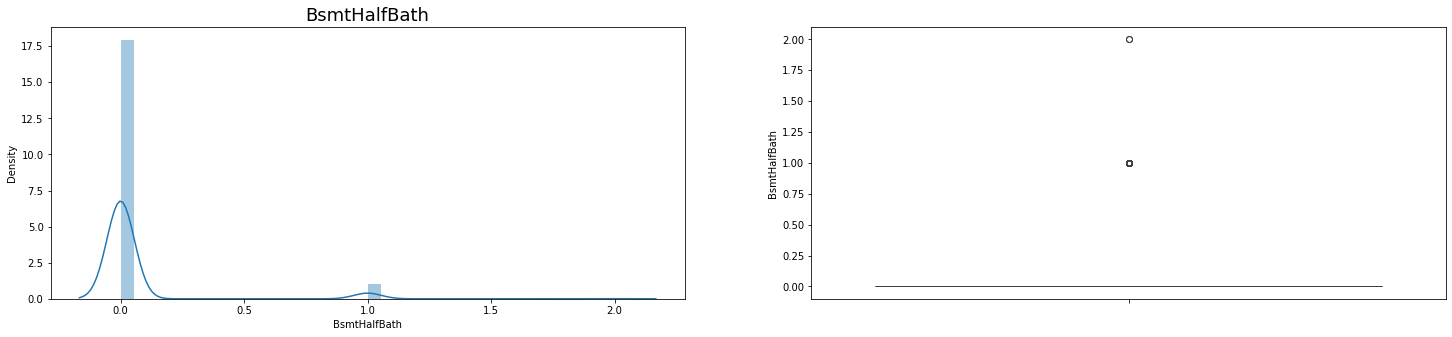

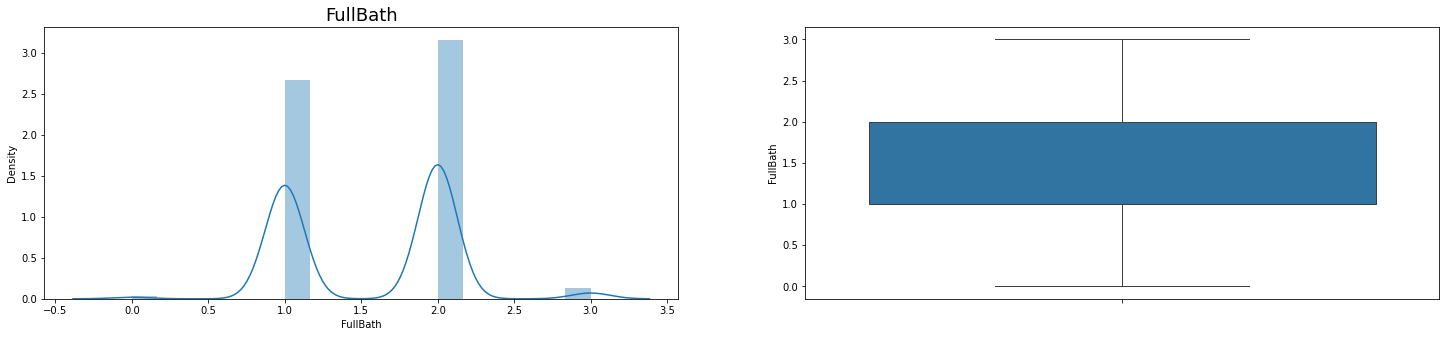

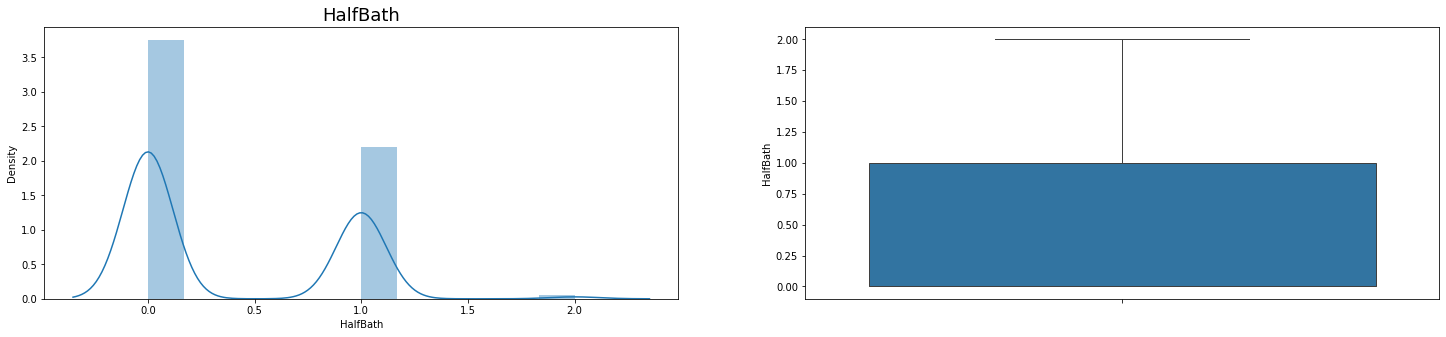

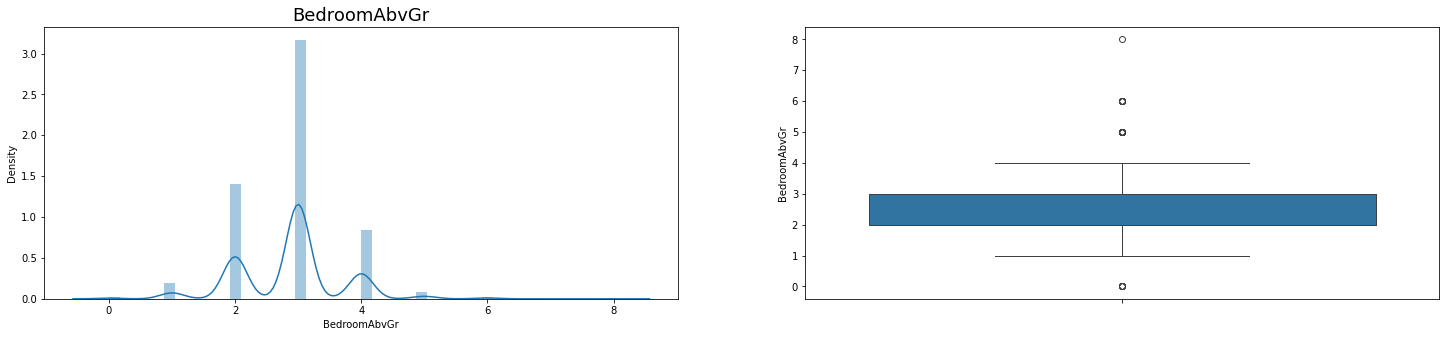

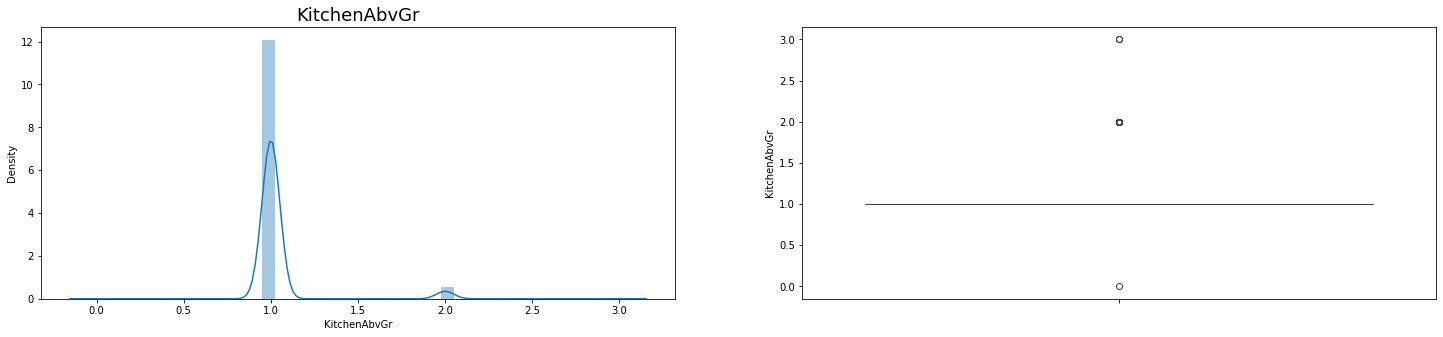

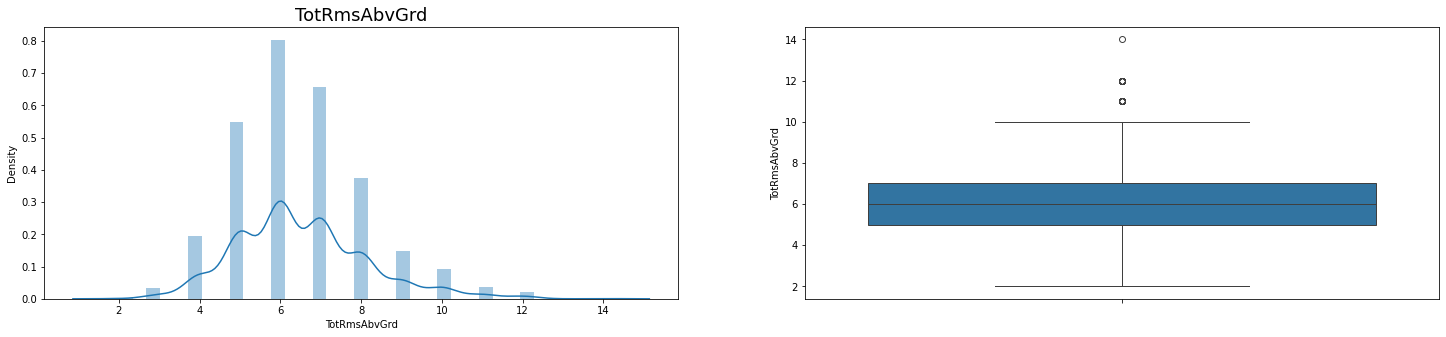

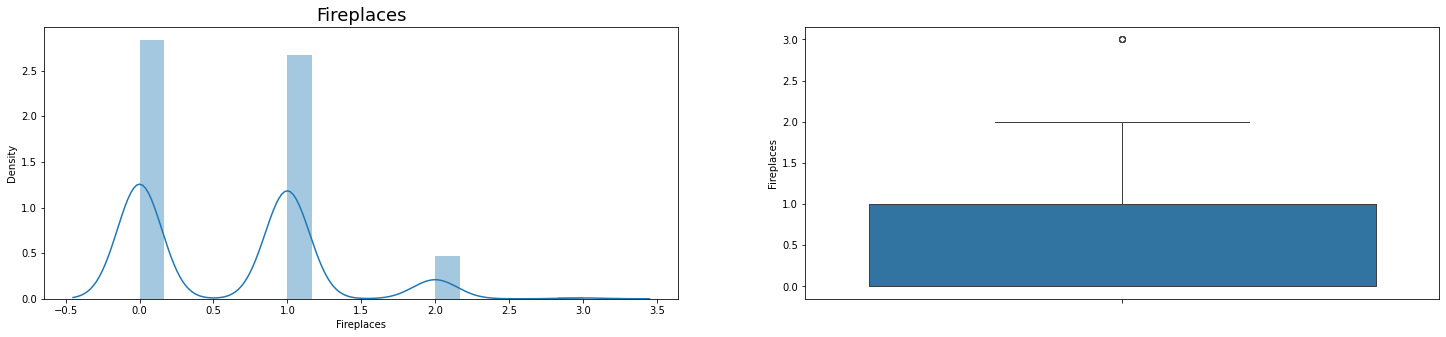

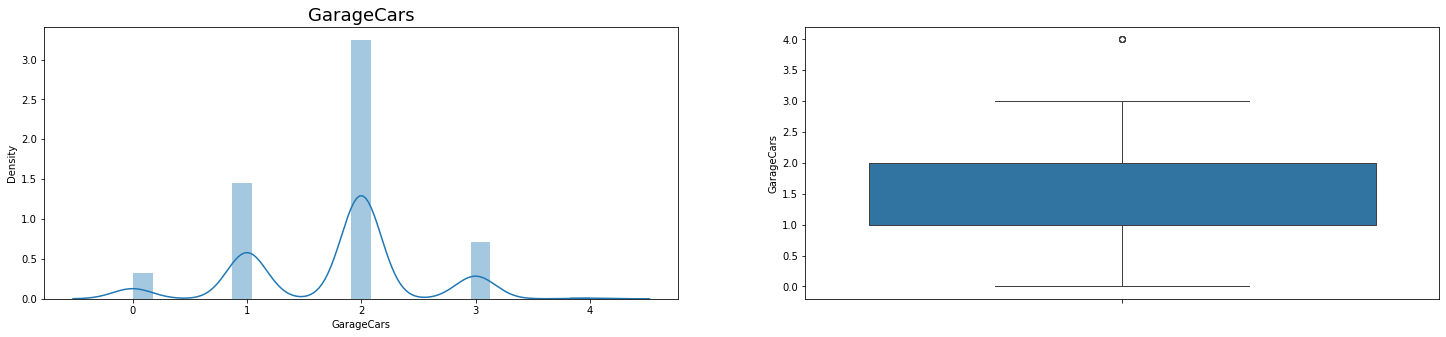

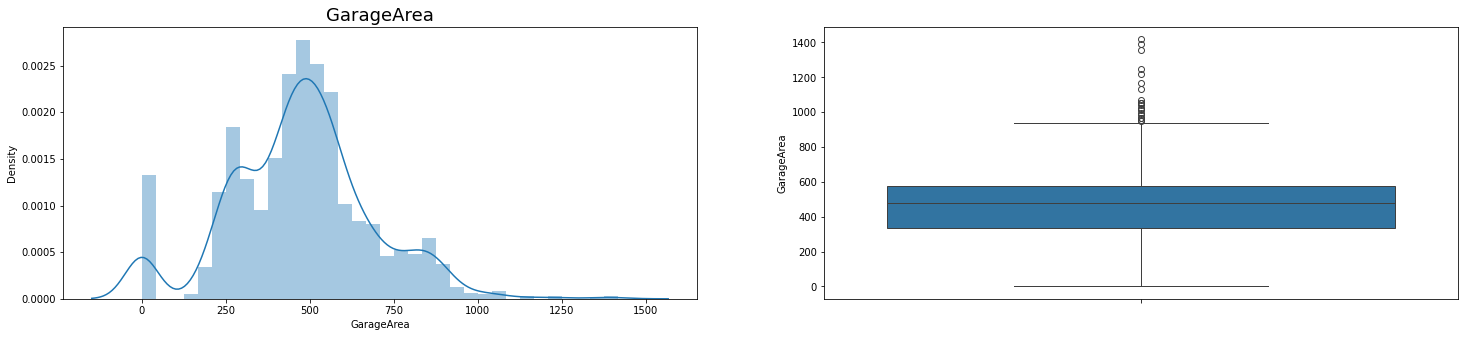

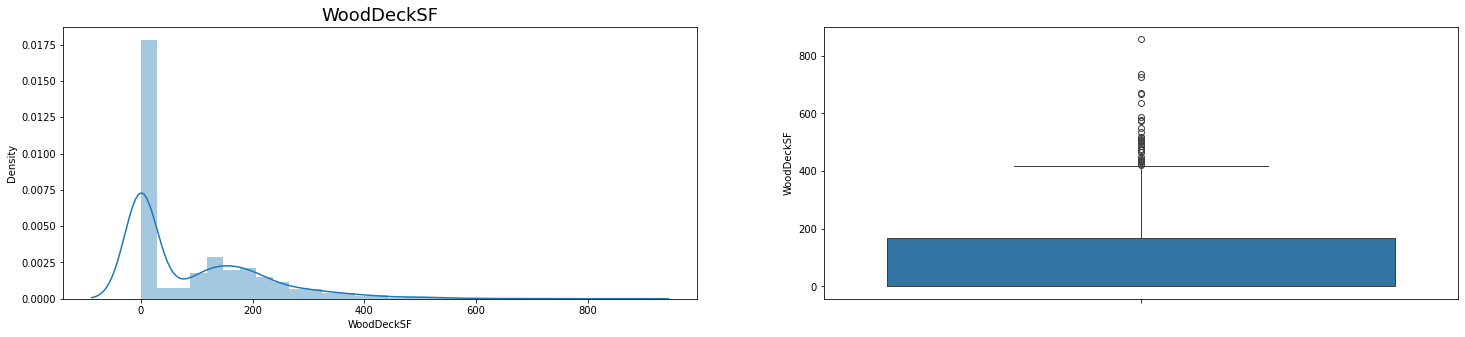

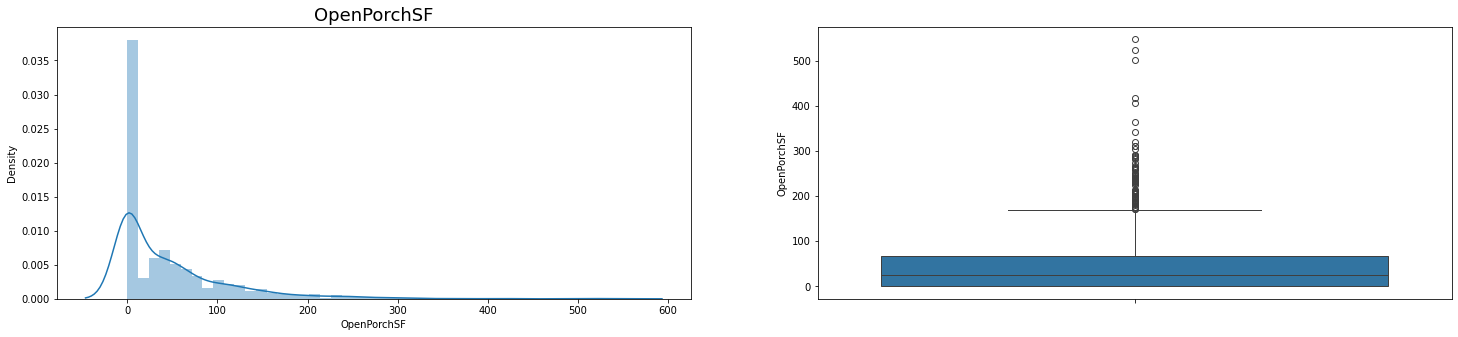

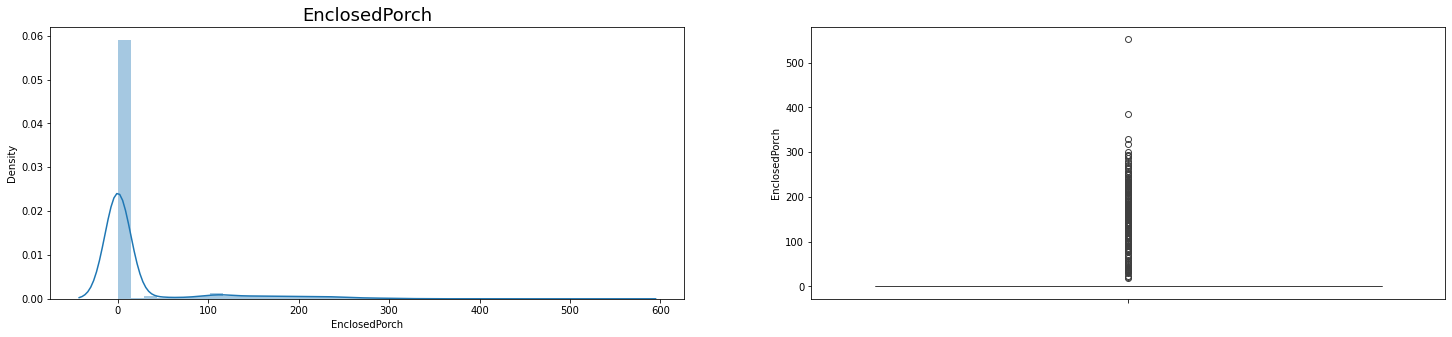

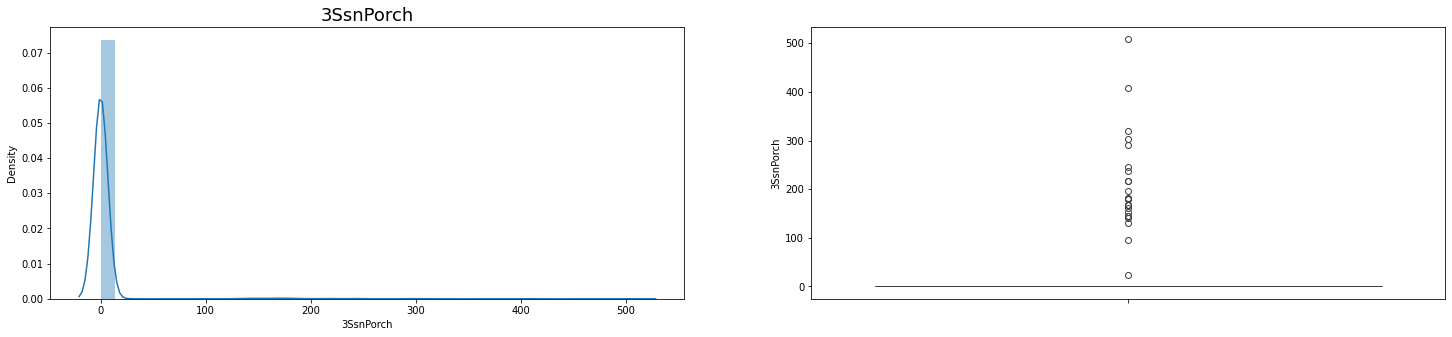

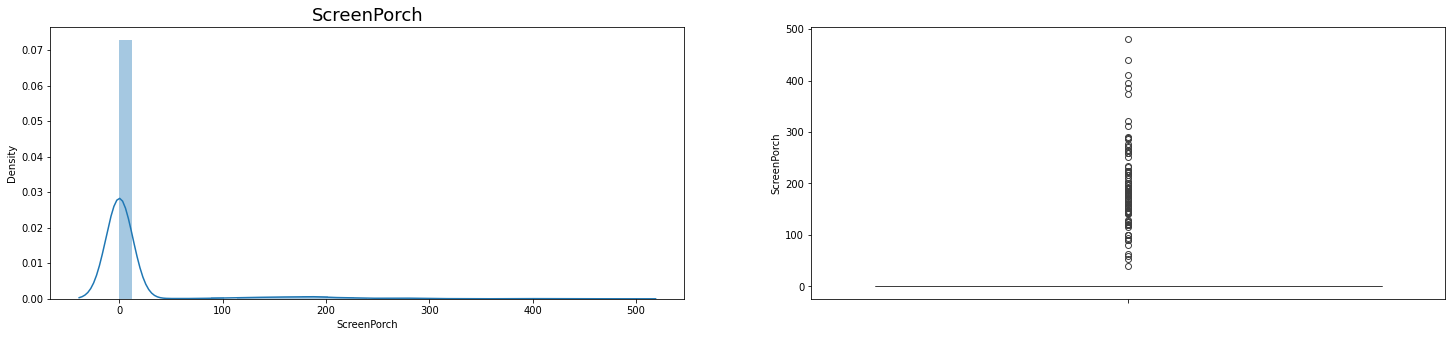

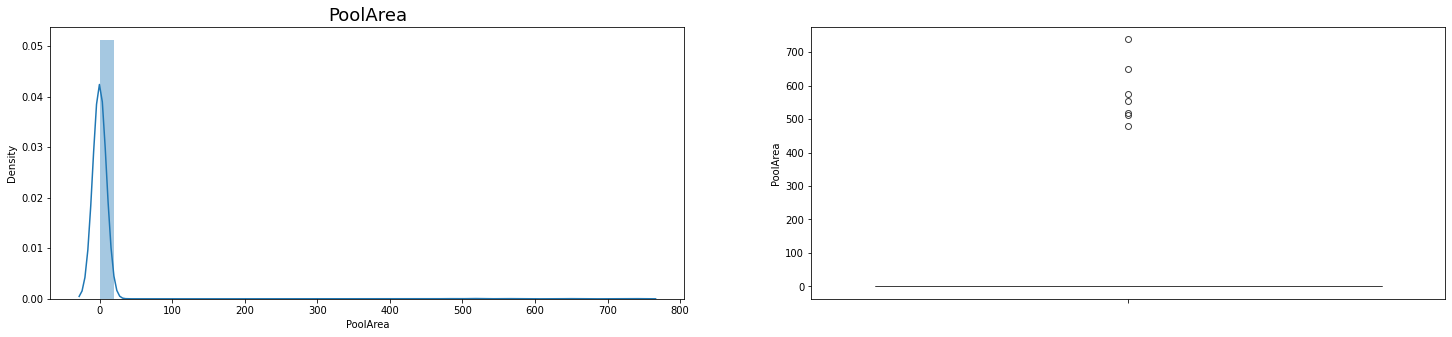

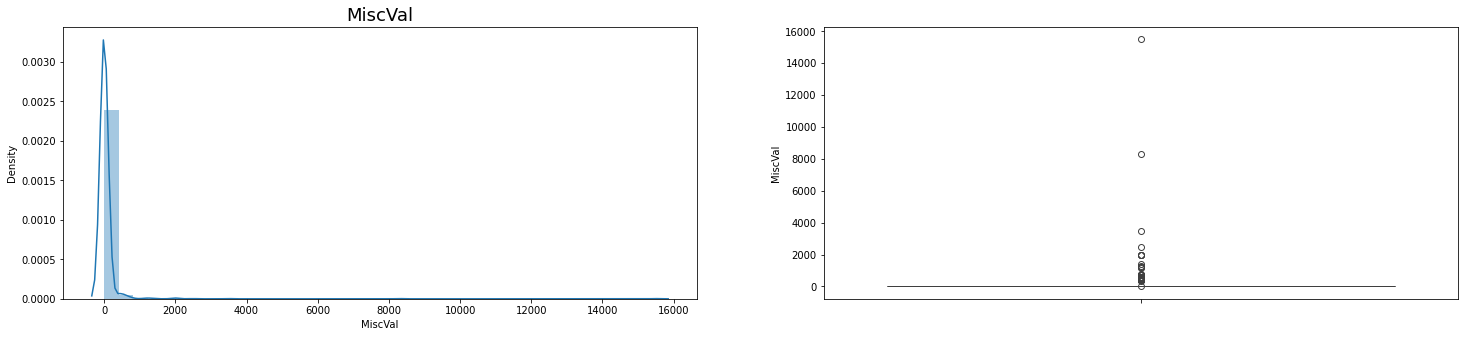

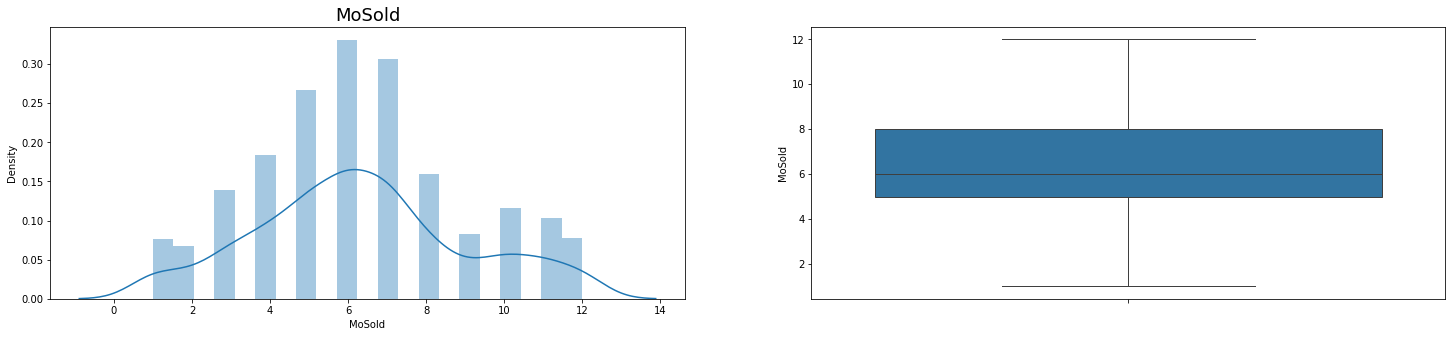

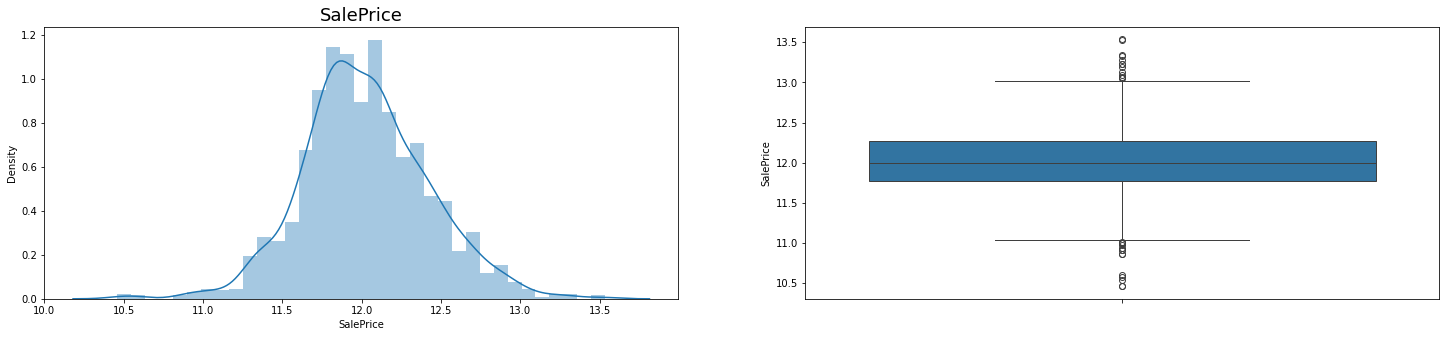

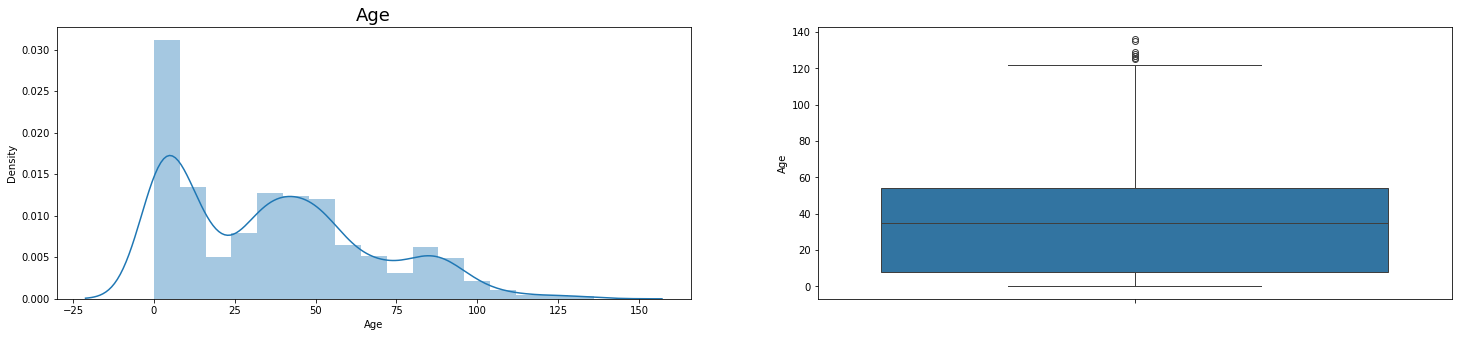

In [19]:
for col in housing_continuous.columns:
    plt.figure(figsize=(25,5))
    
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 18})
    sns.distplot(housing_continuous[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(housing_continuous[col])
    plt.show()  

 Most of the numerical columns have outliers. So, we will require Outlier treatment.

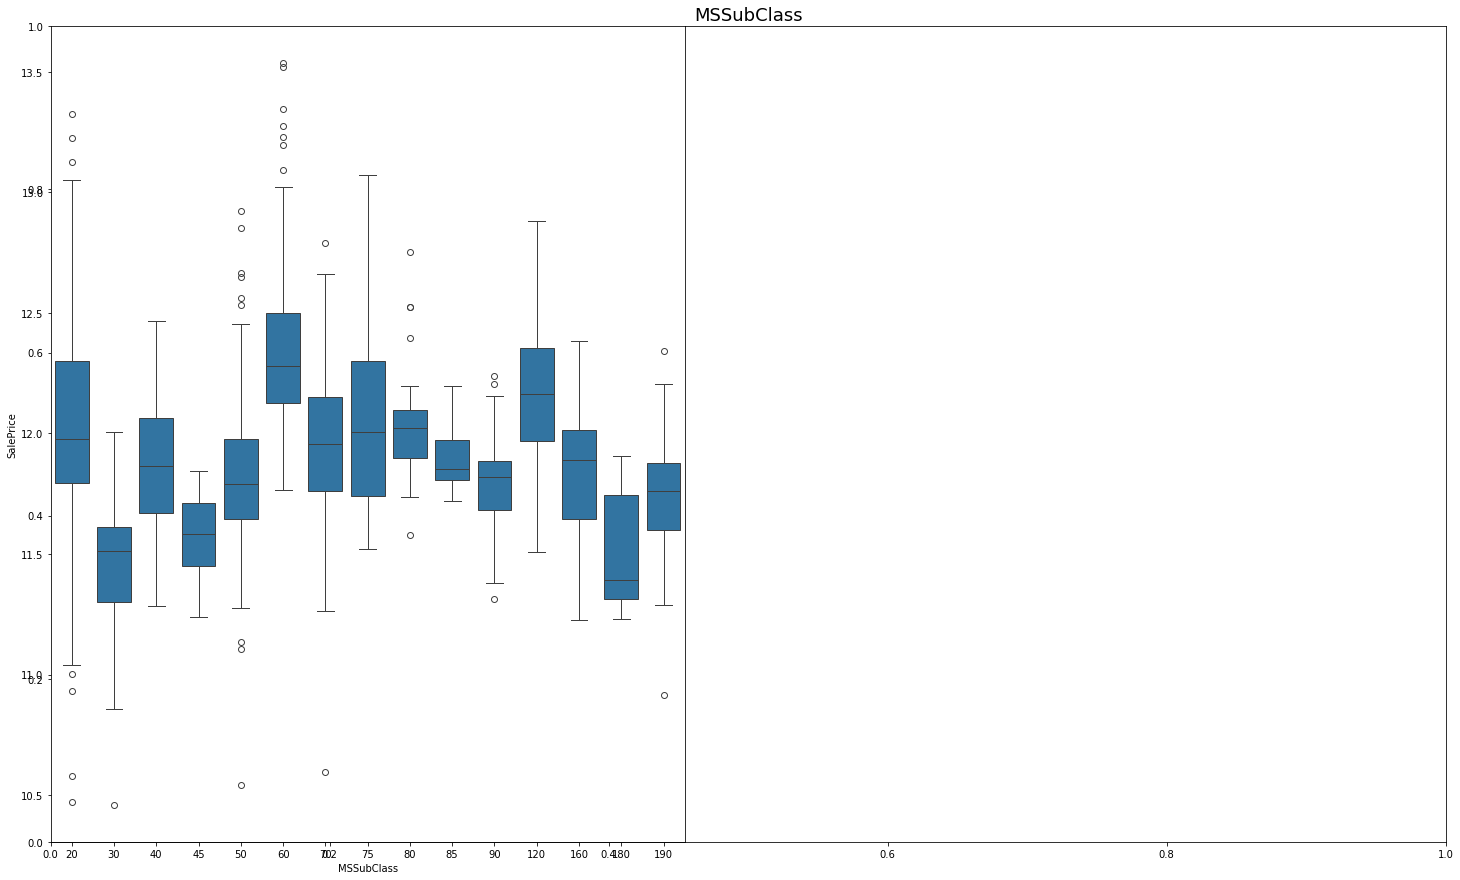

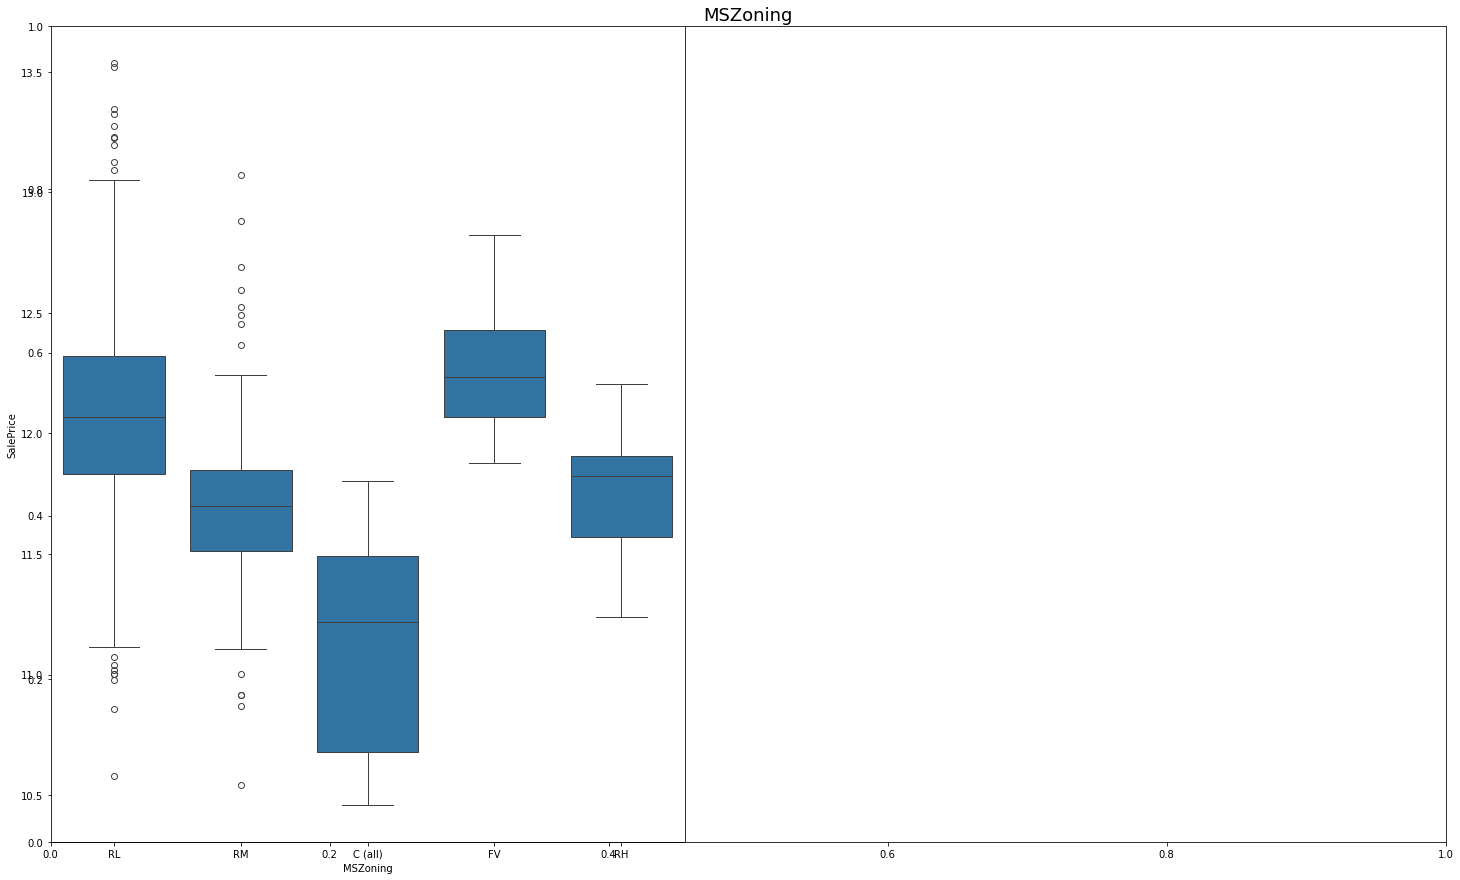

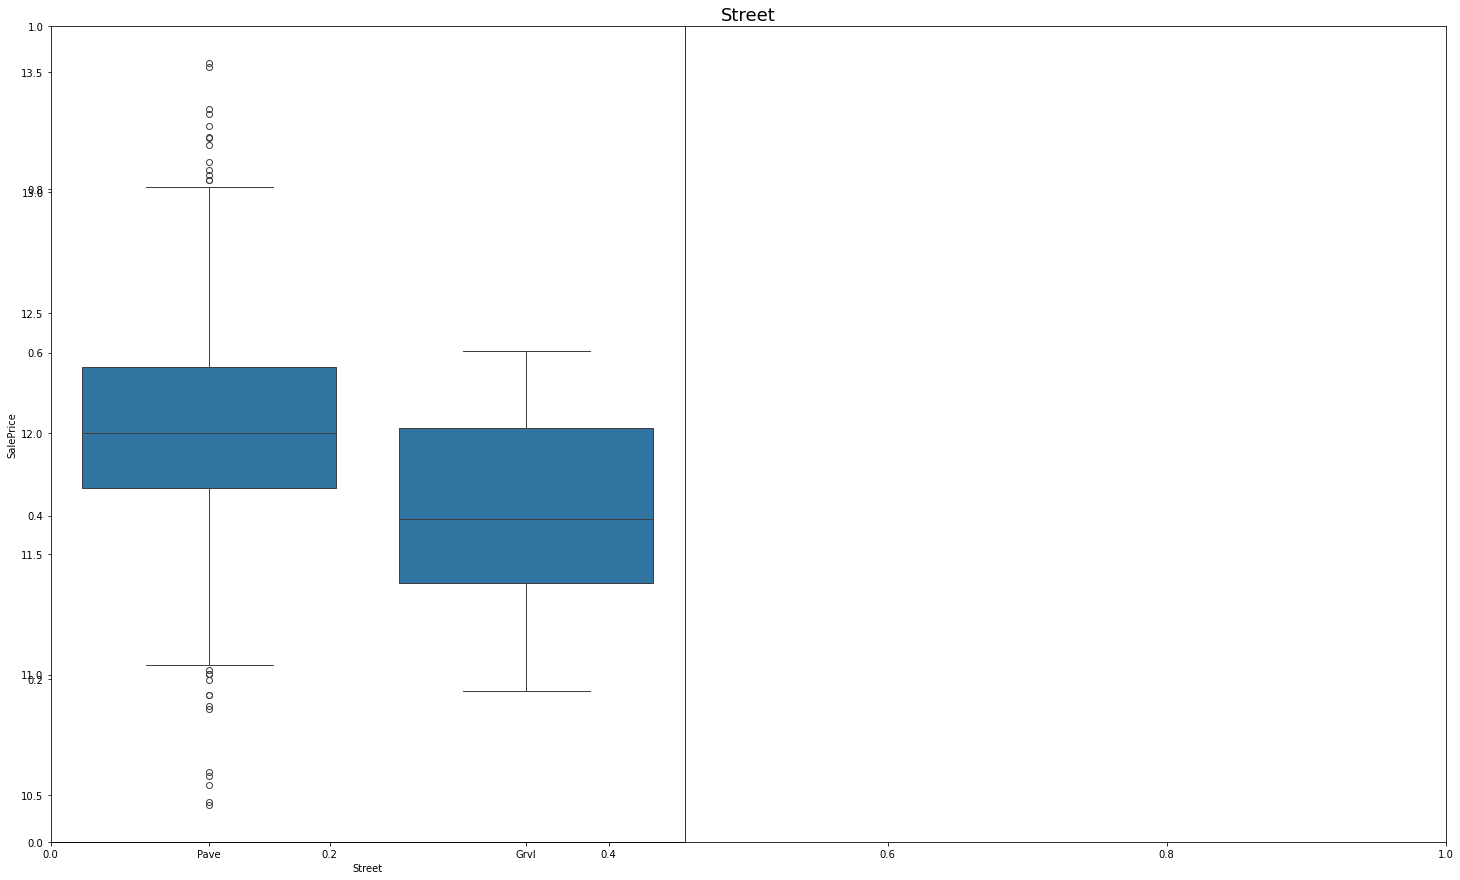

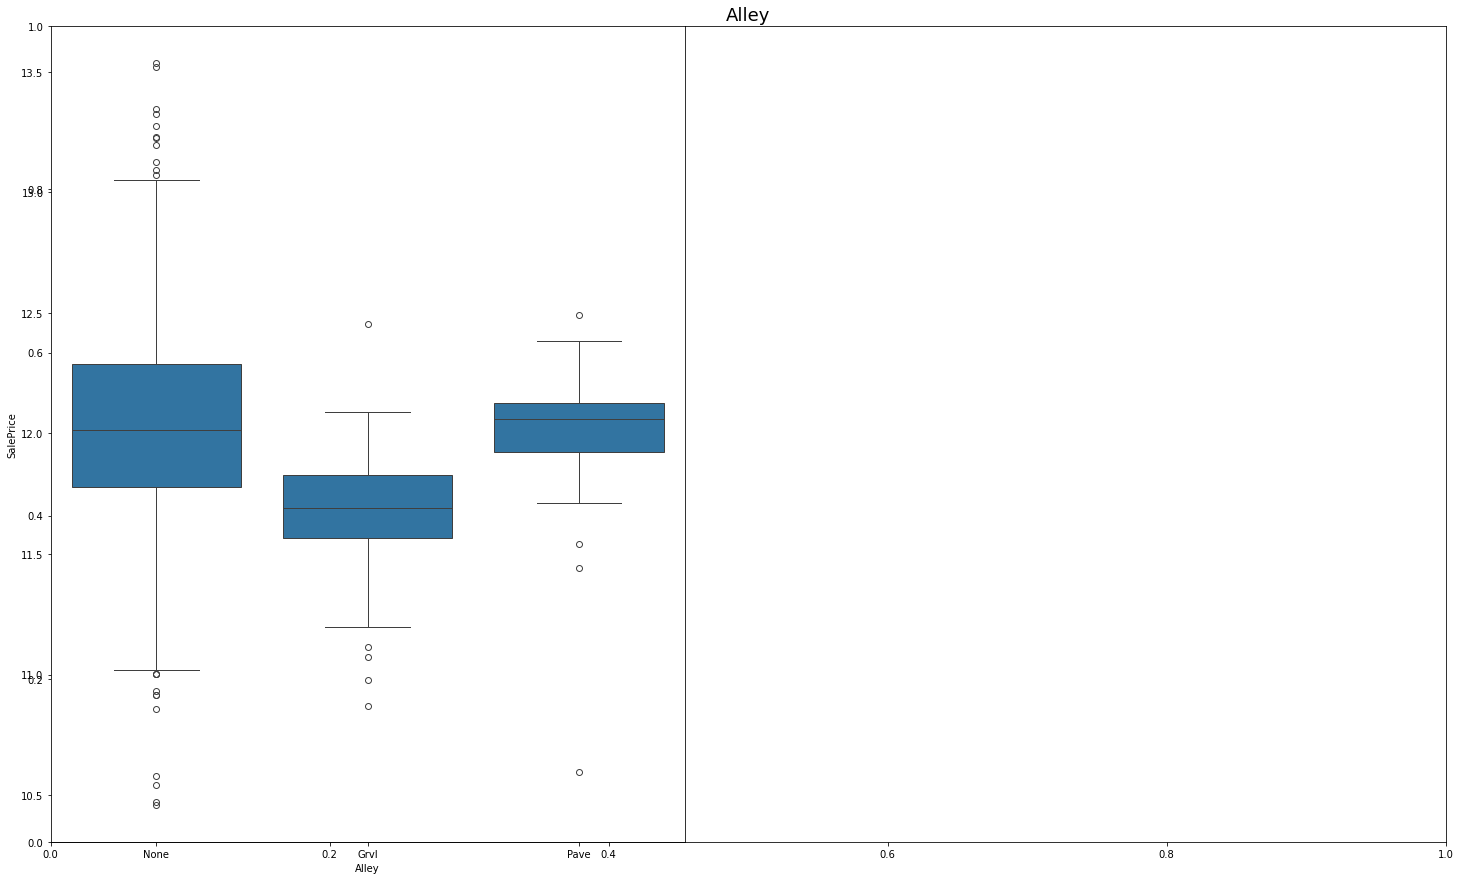

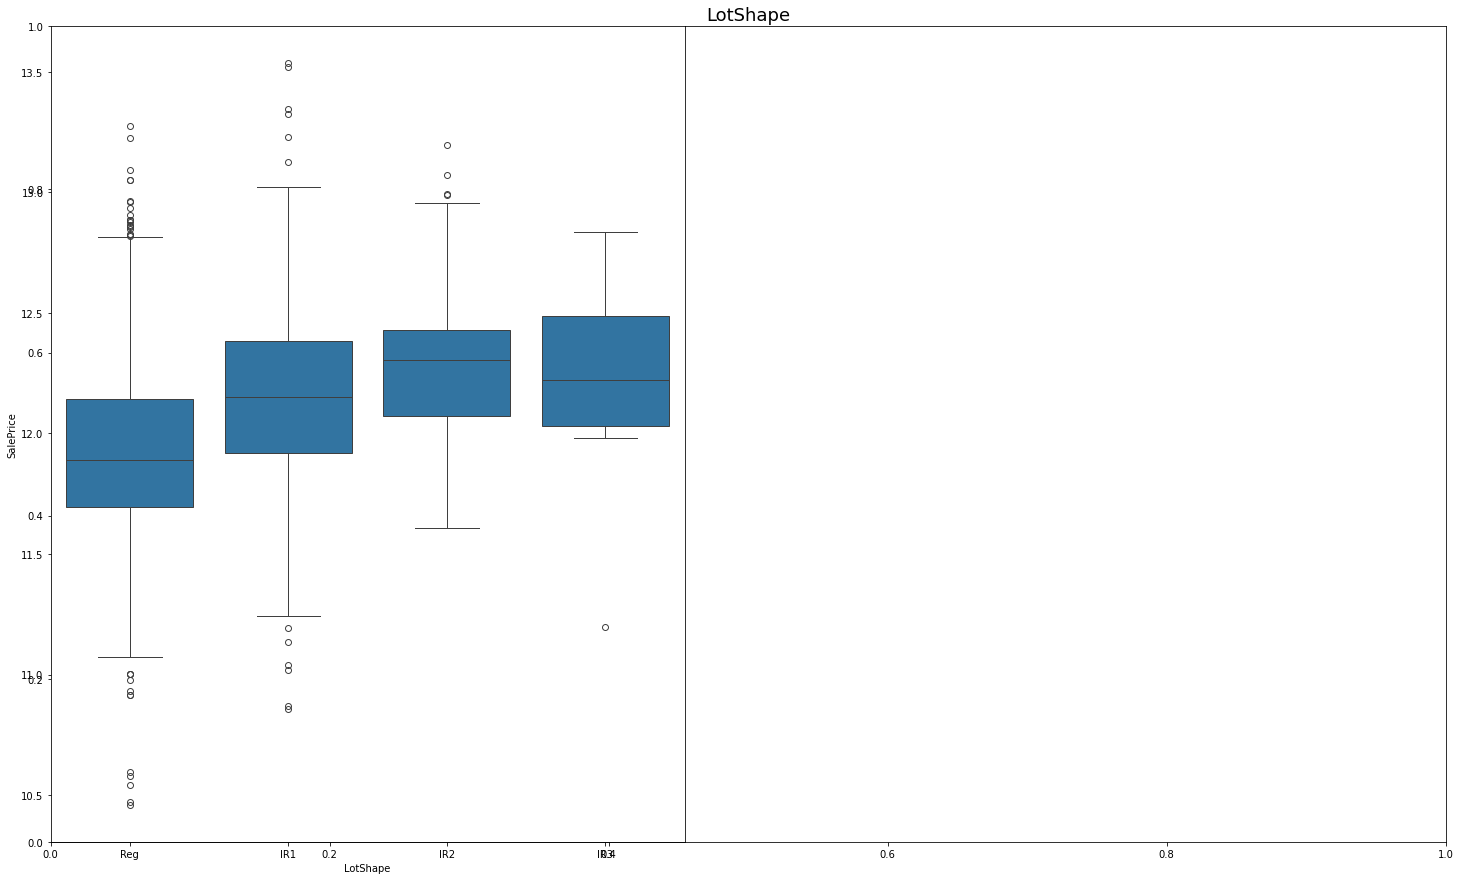

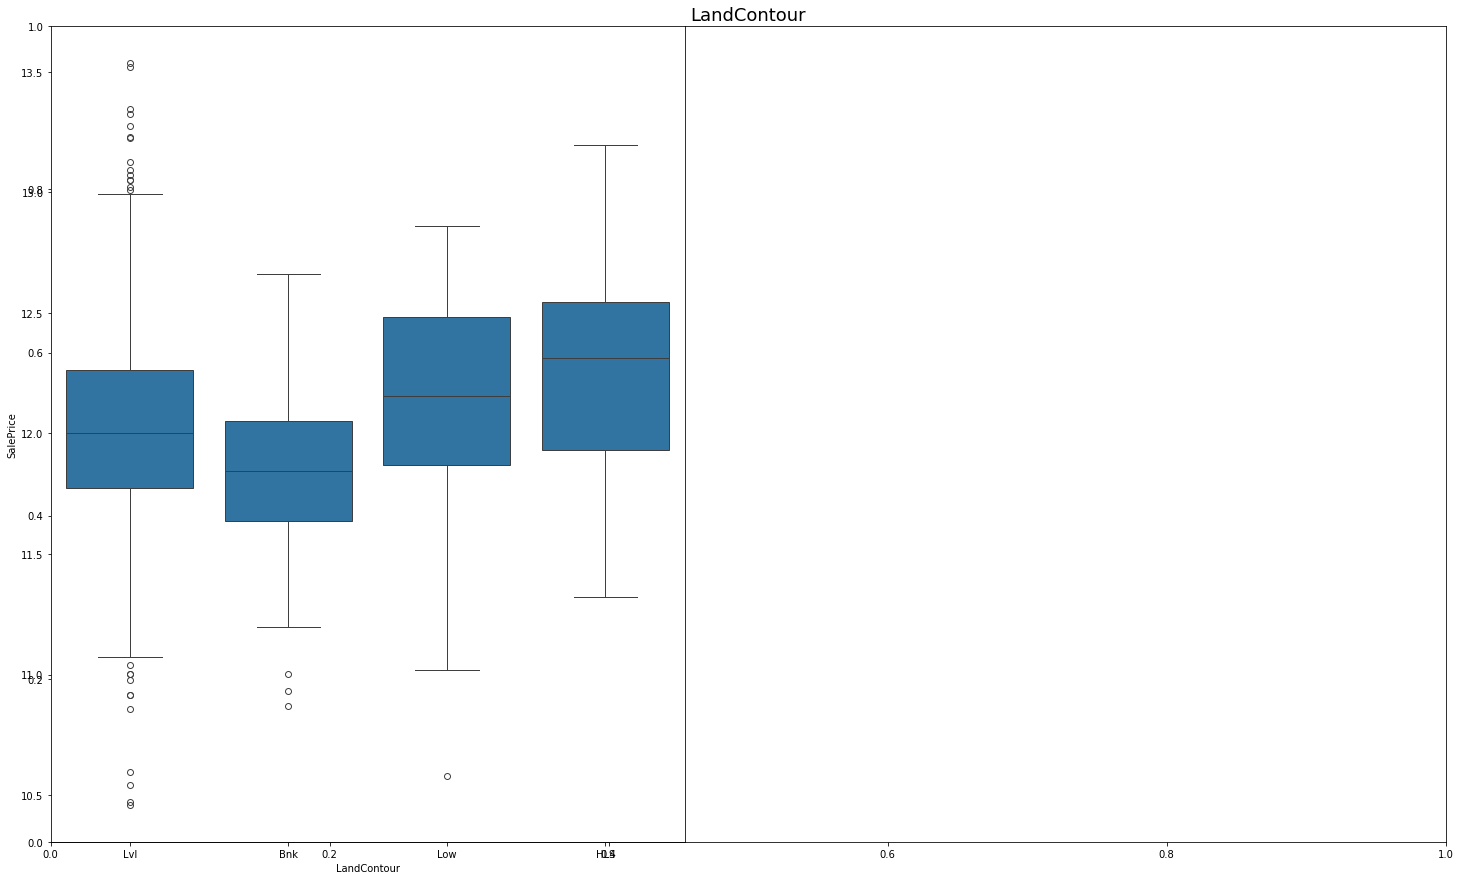

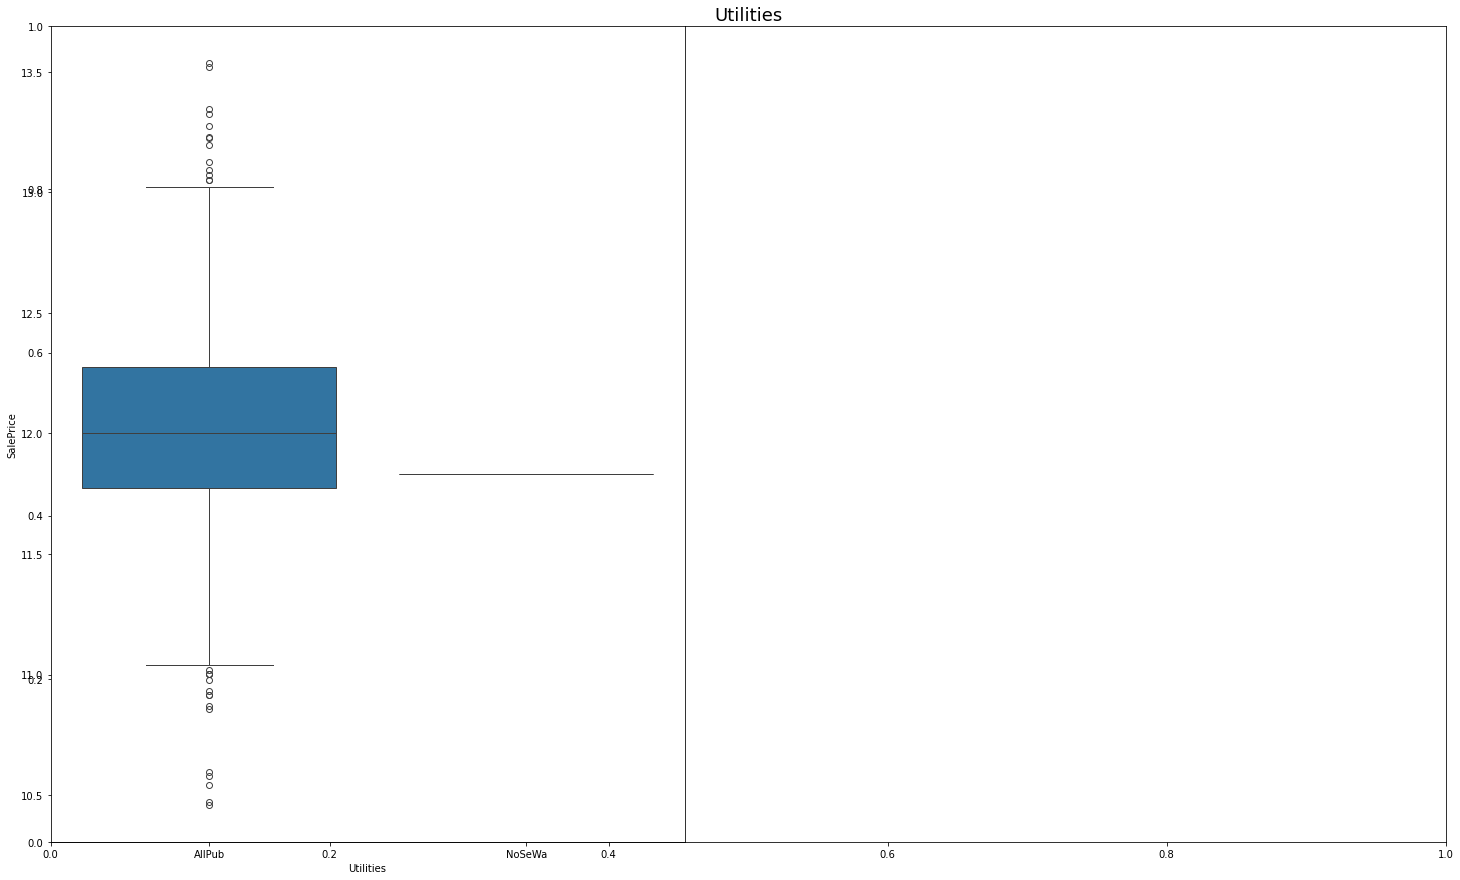

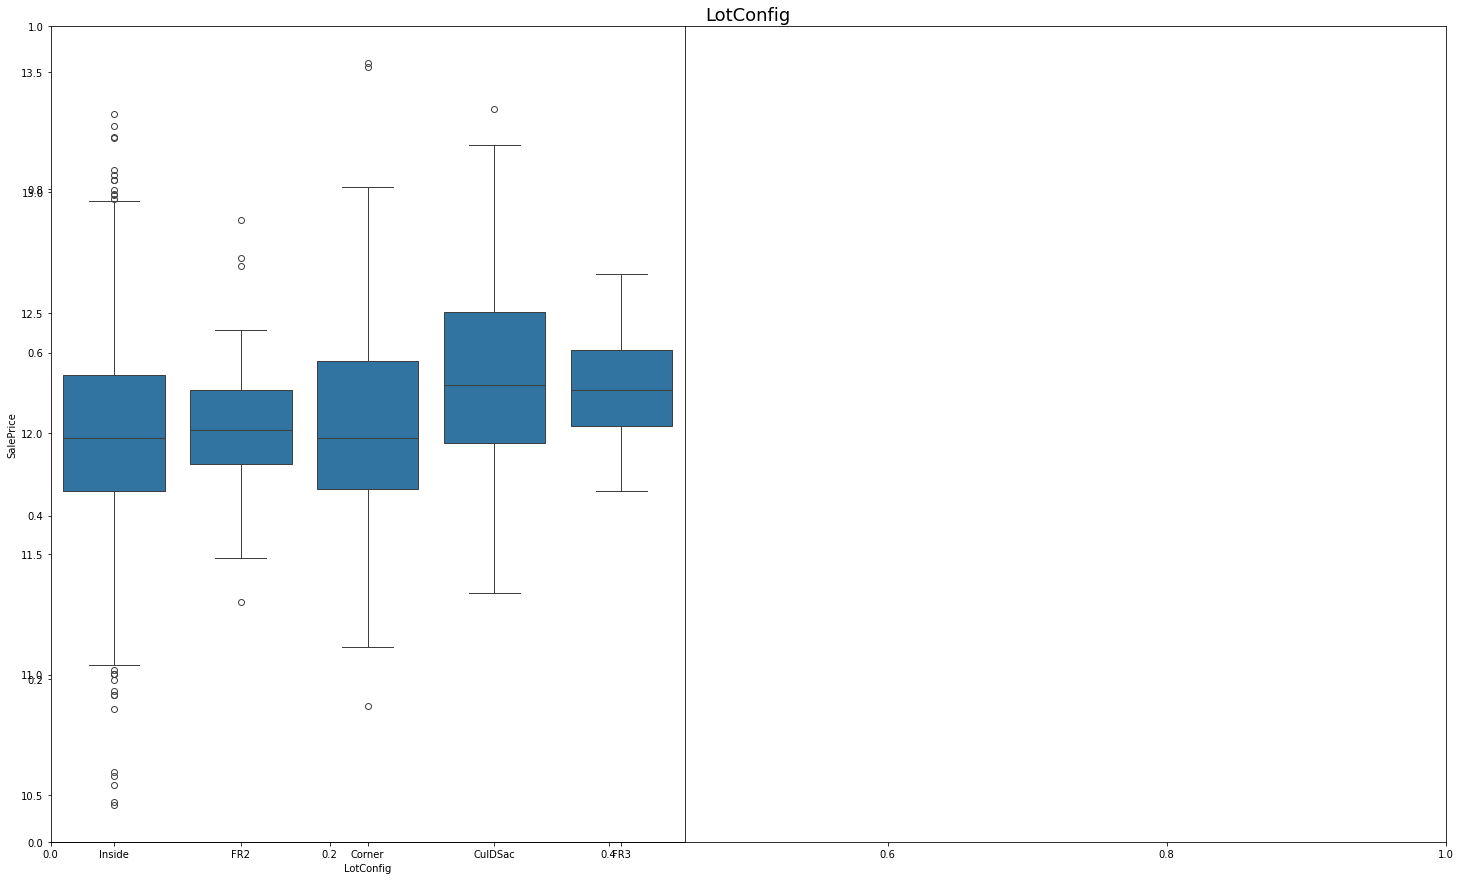

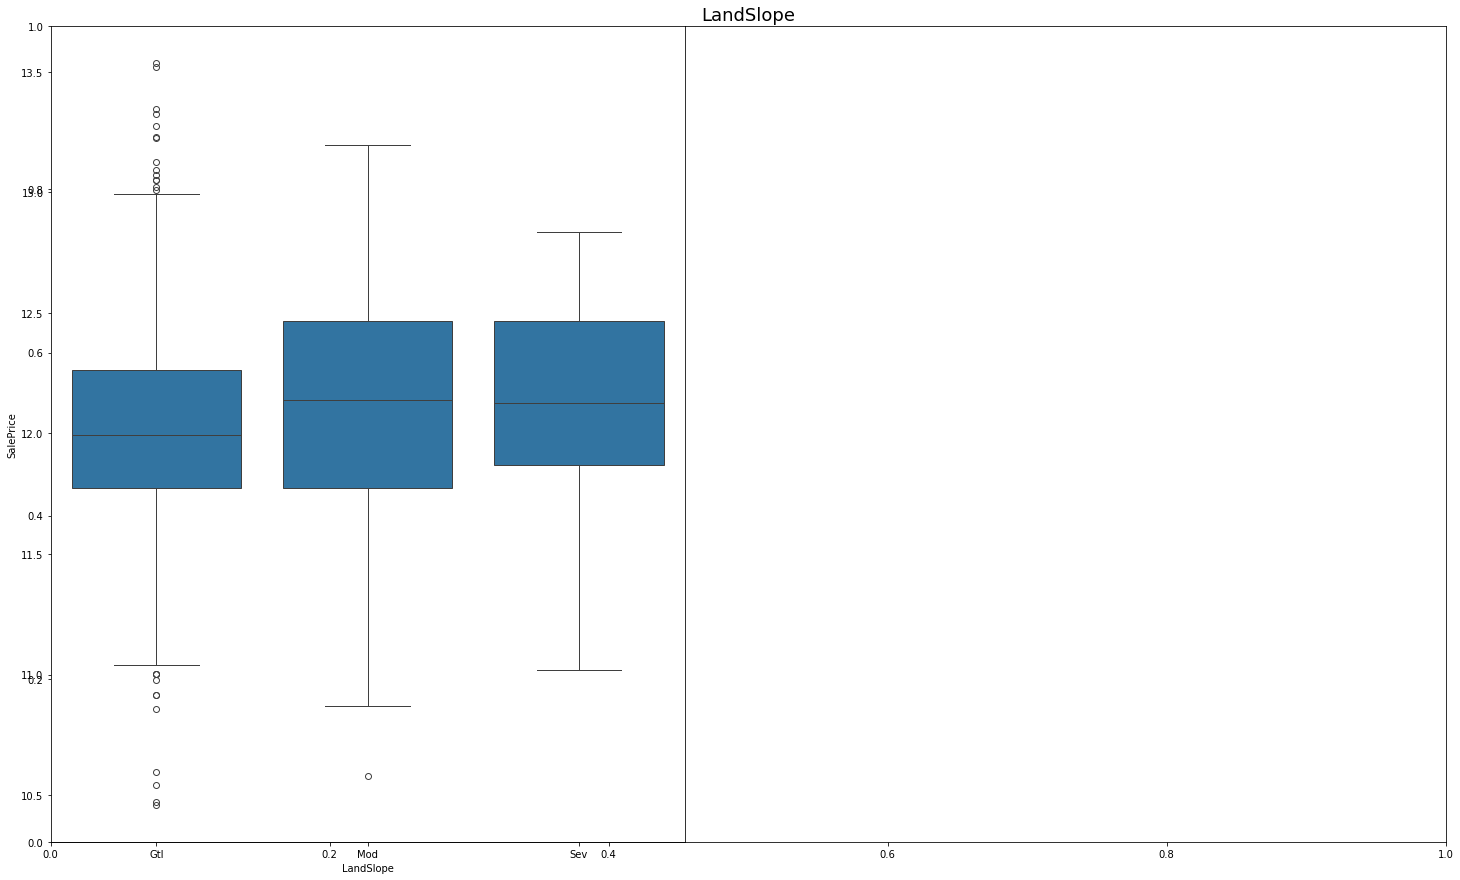

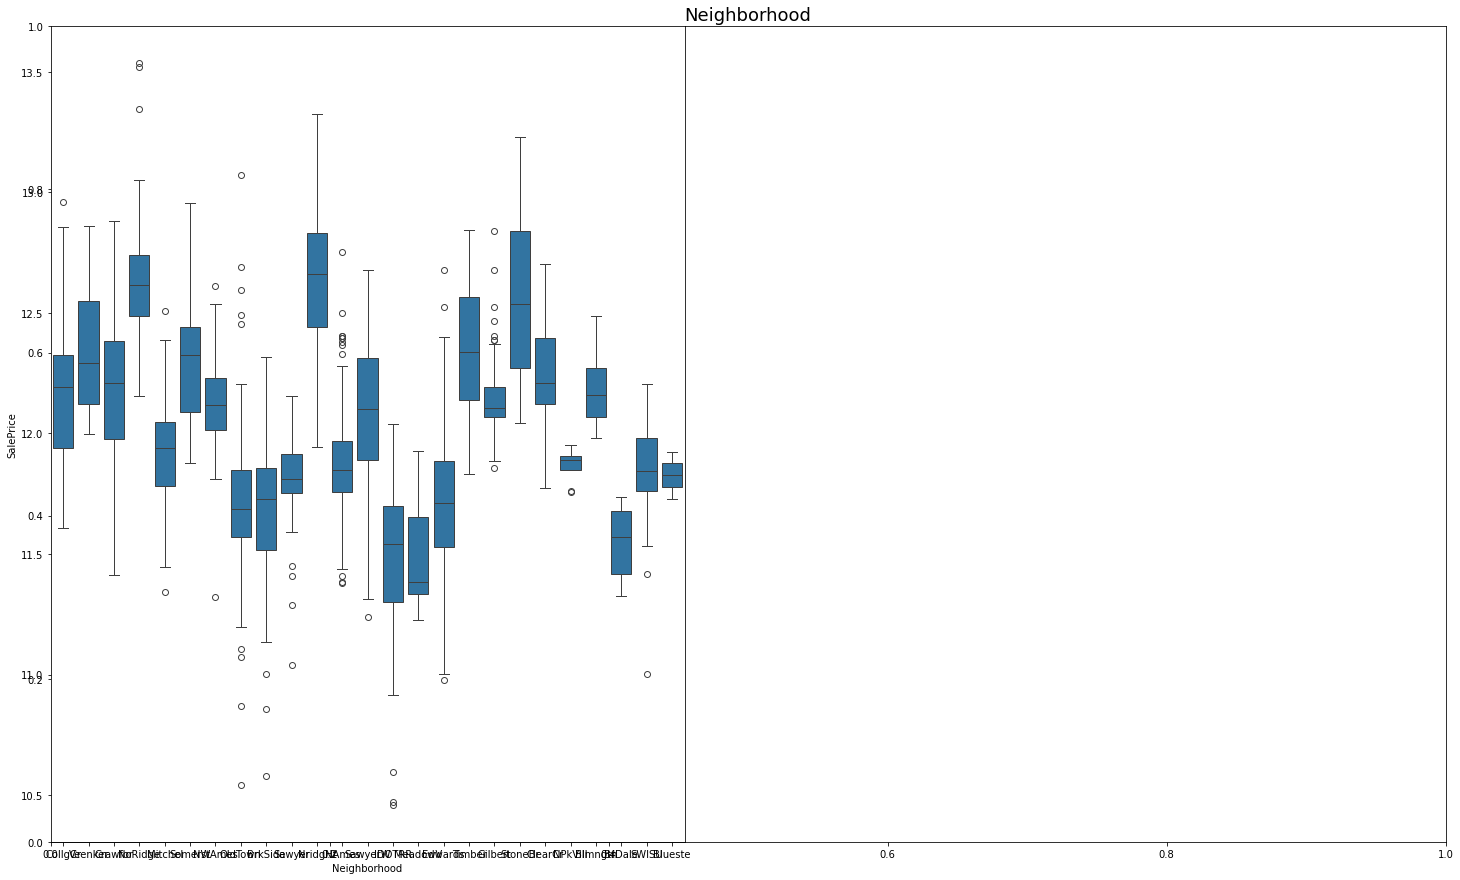

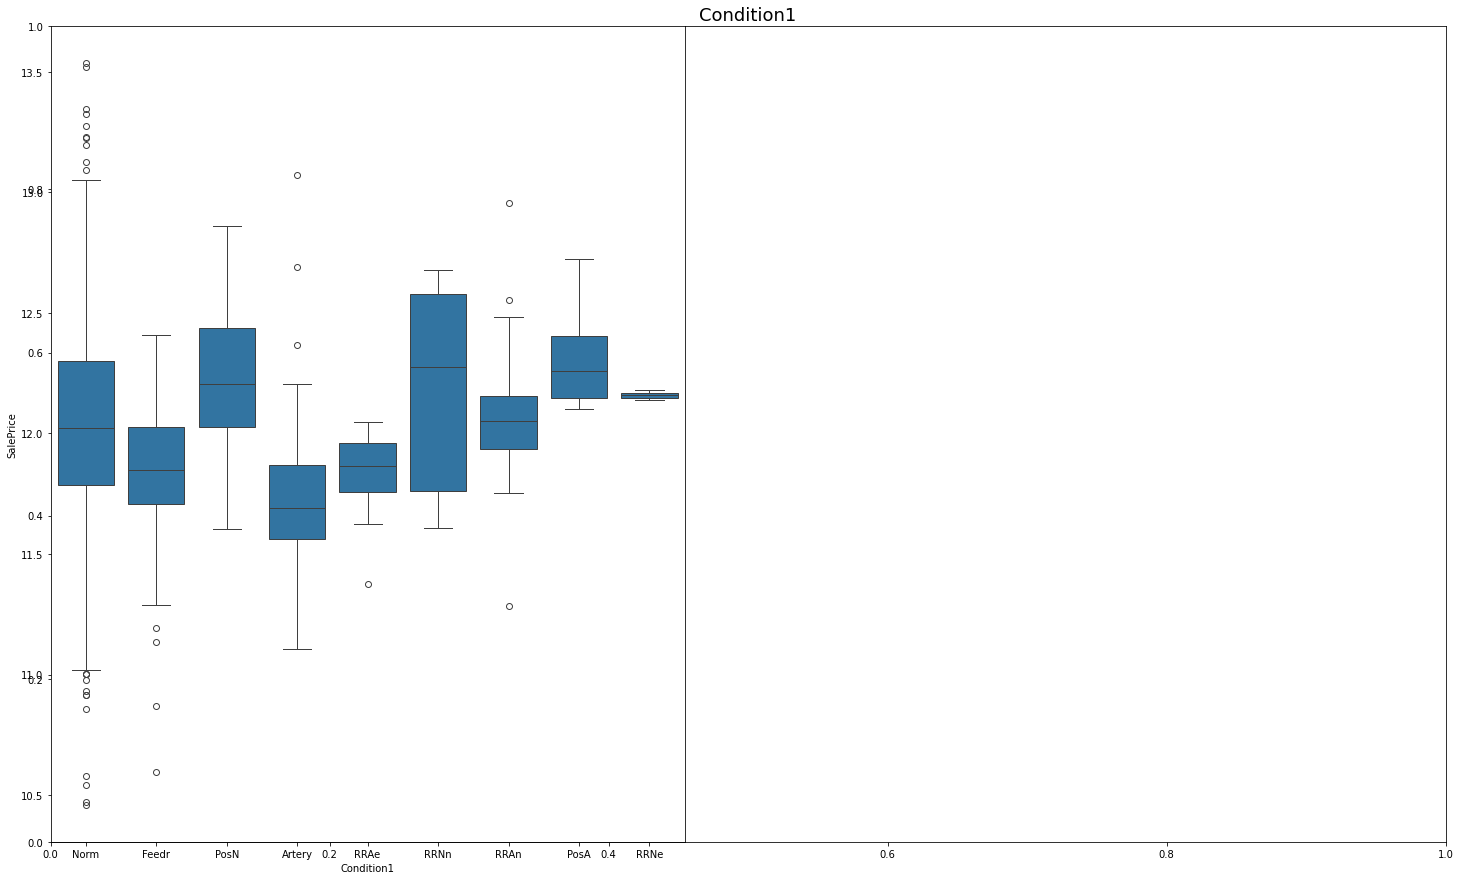

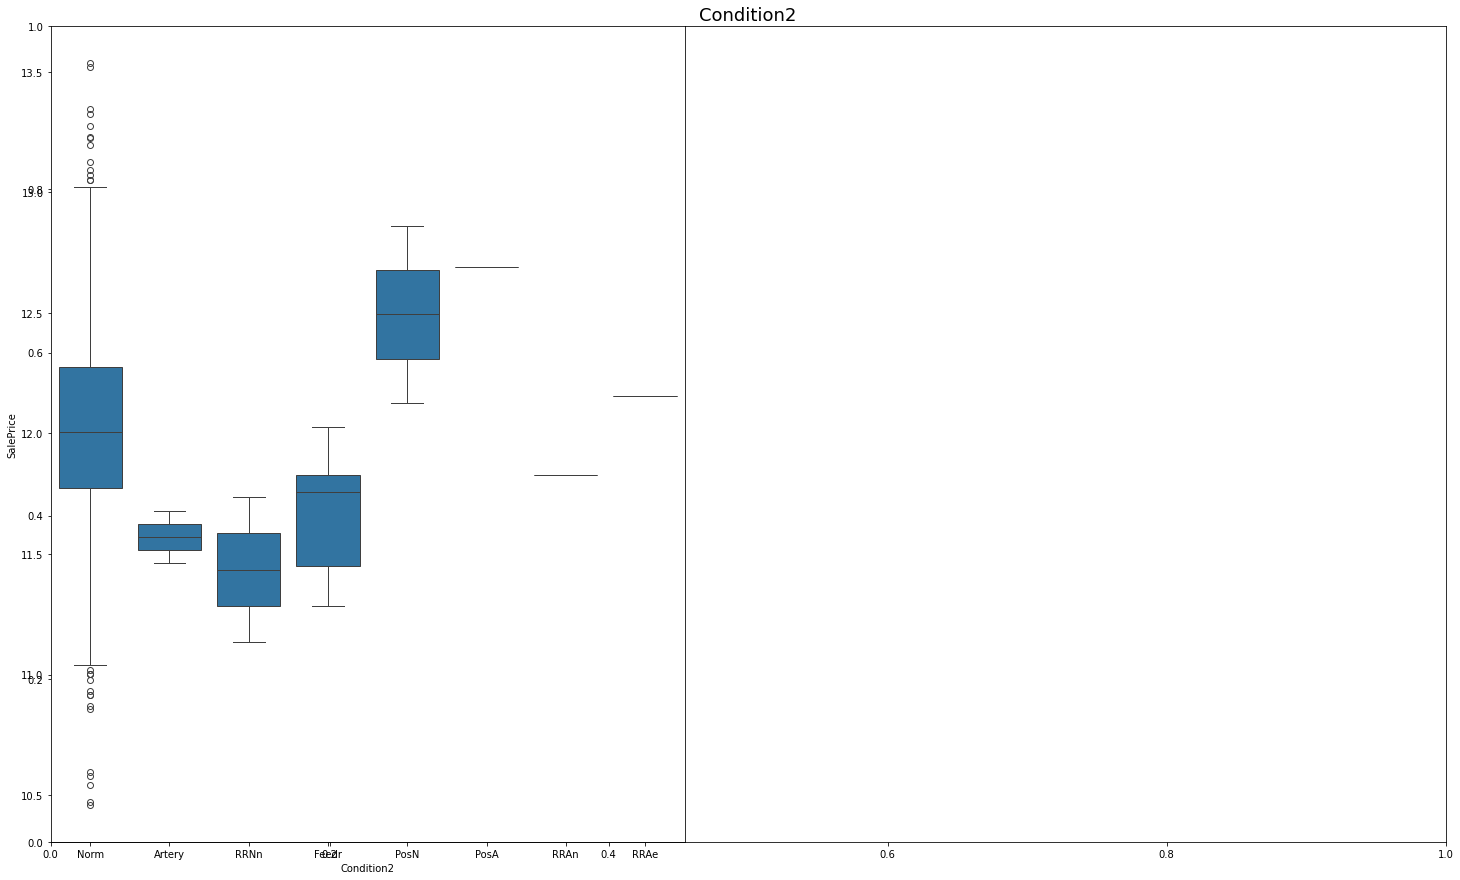

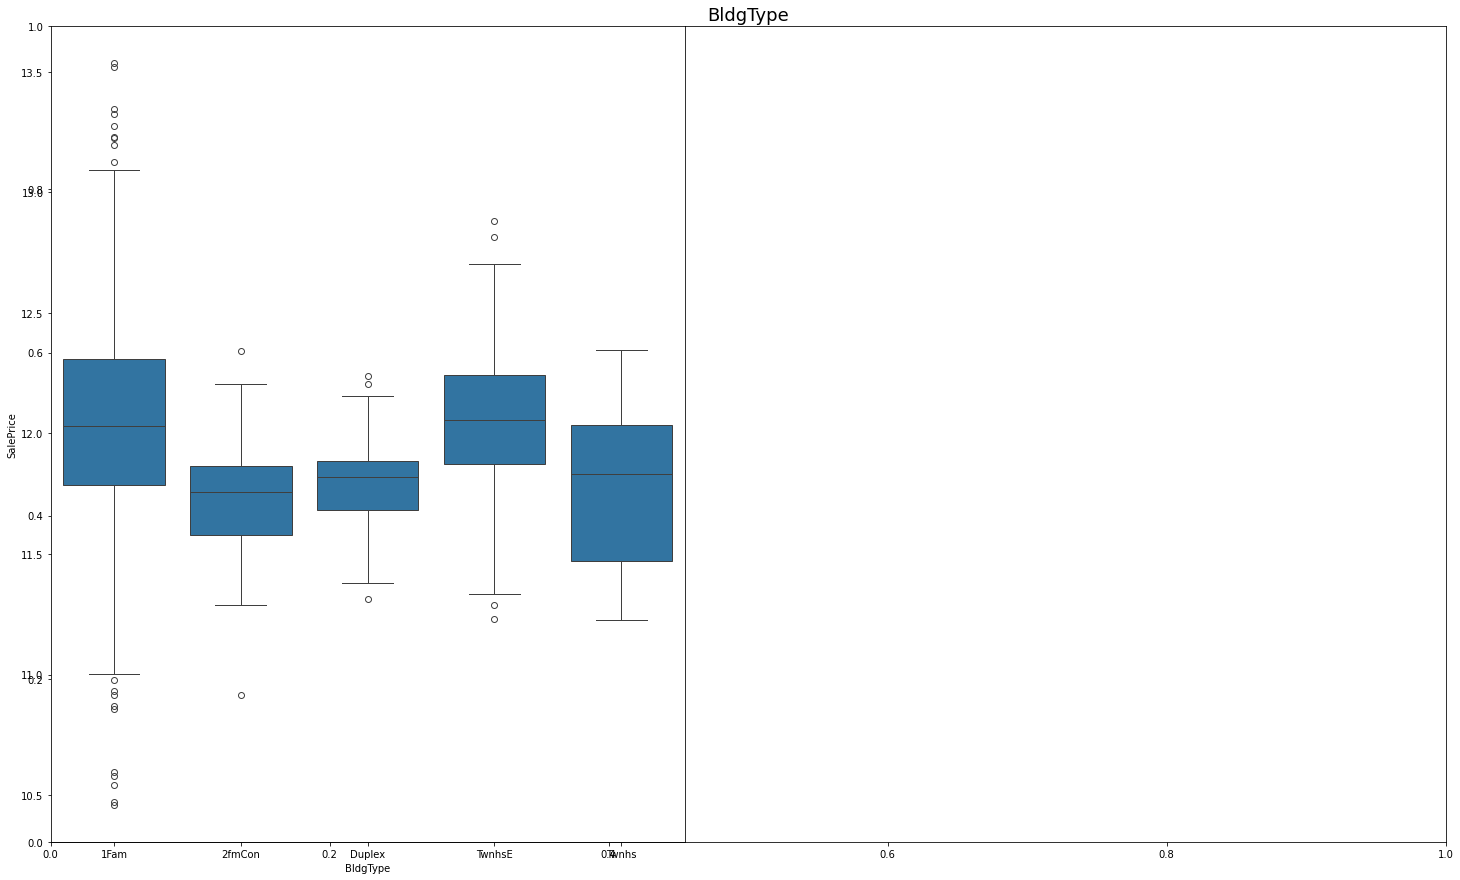

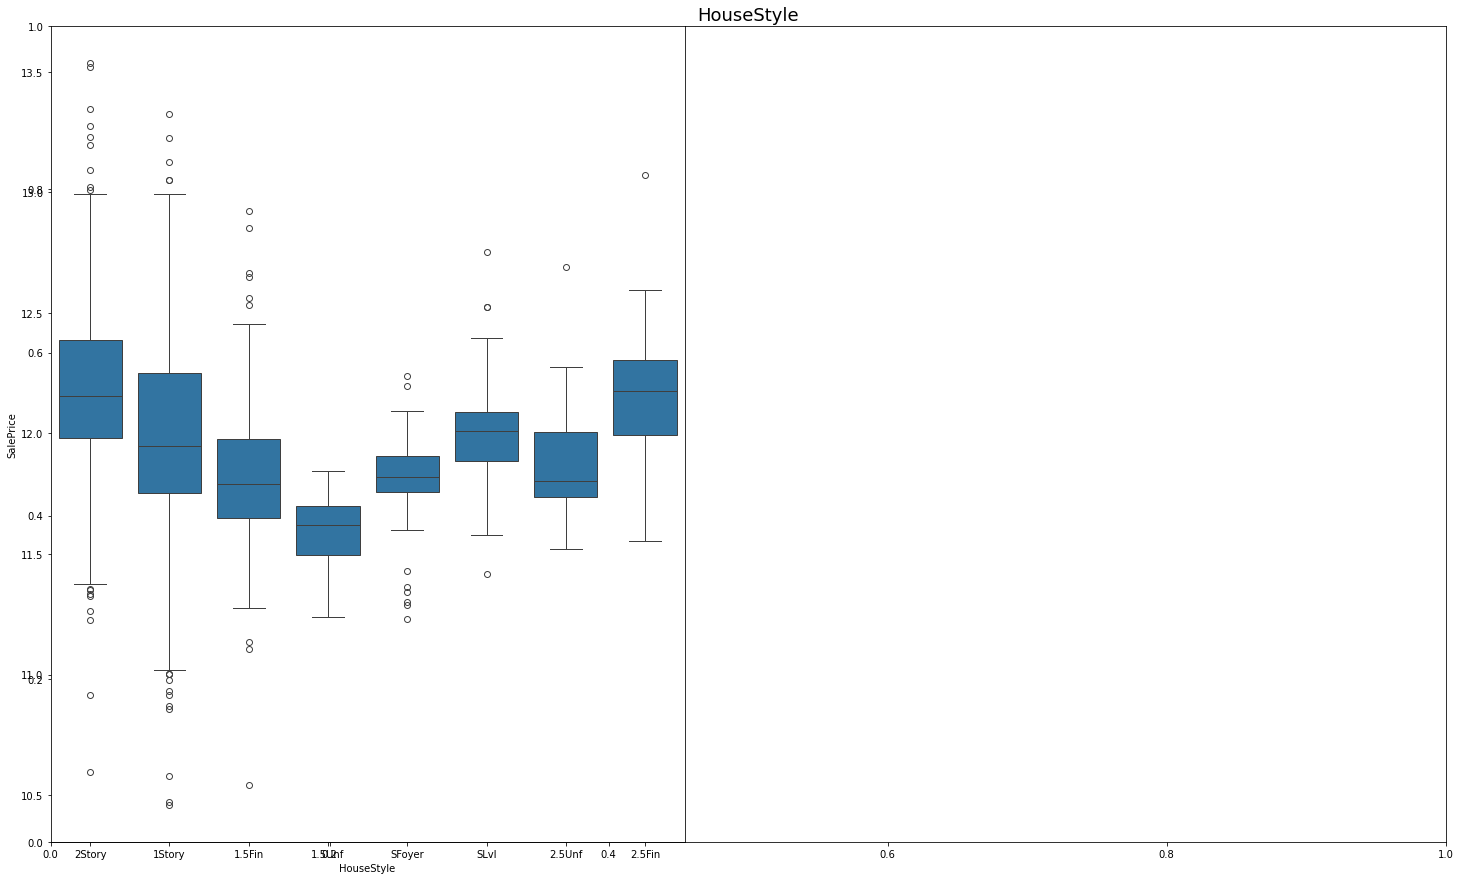

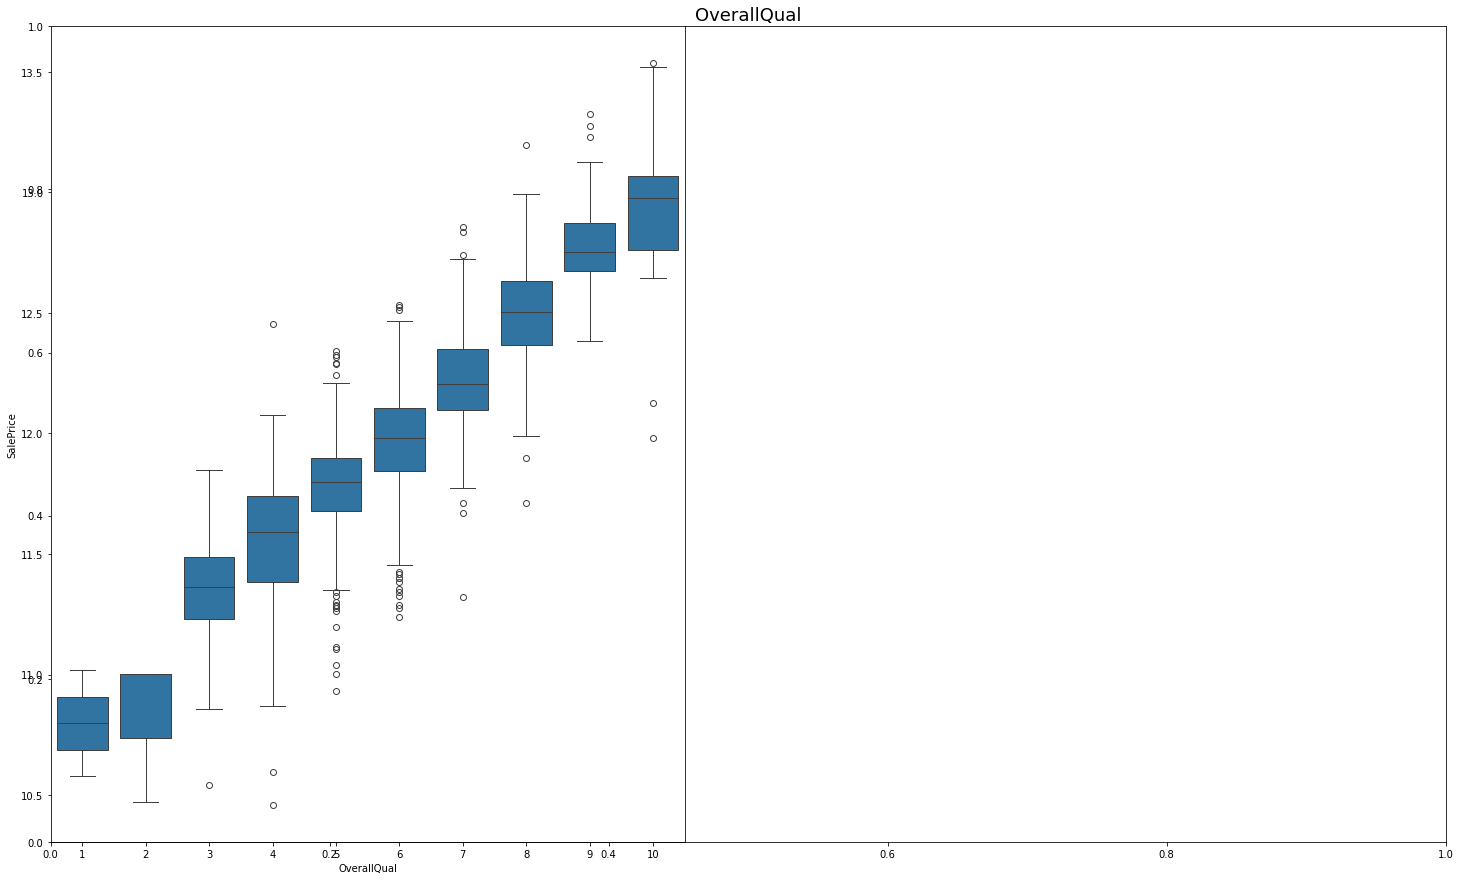

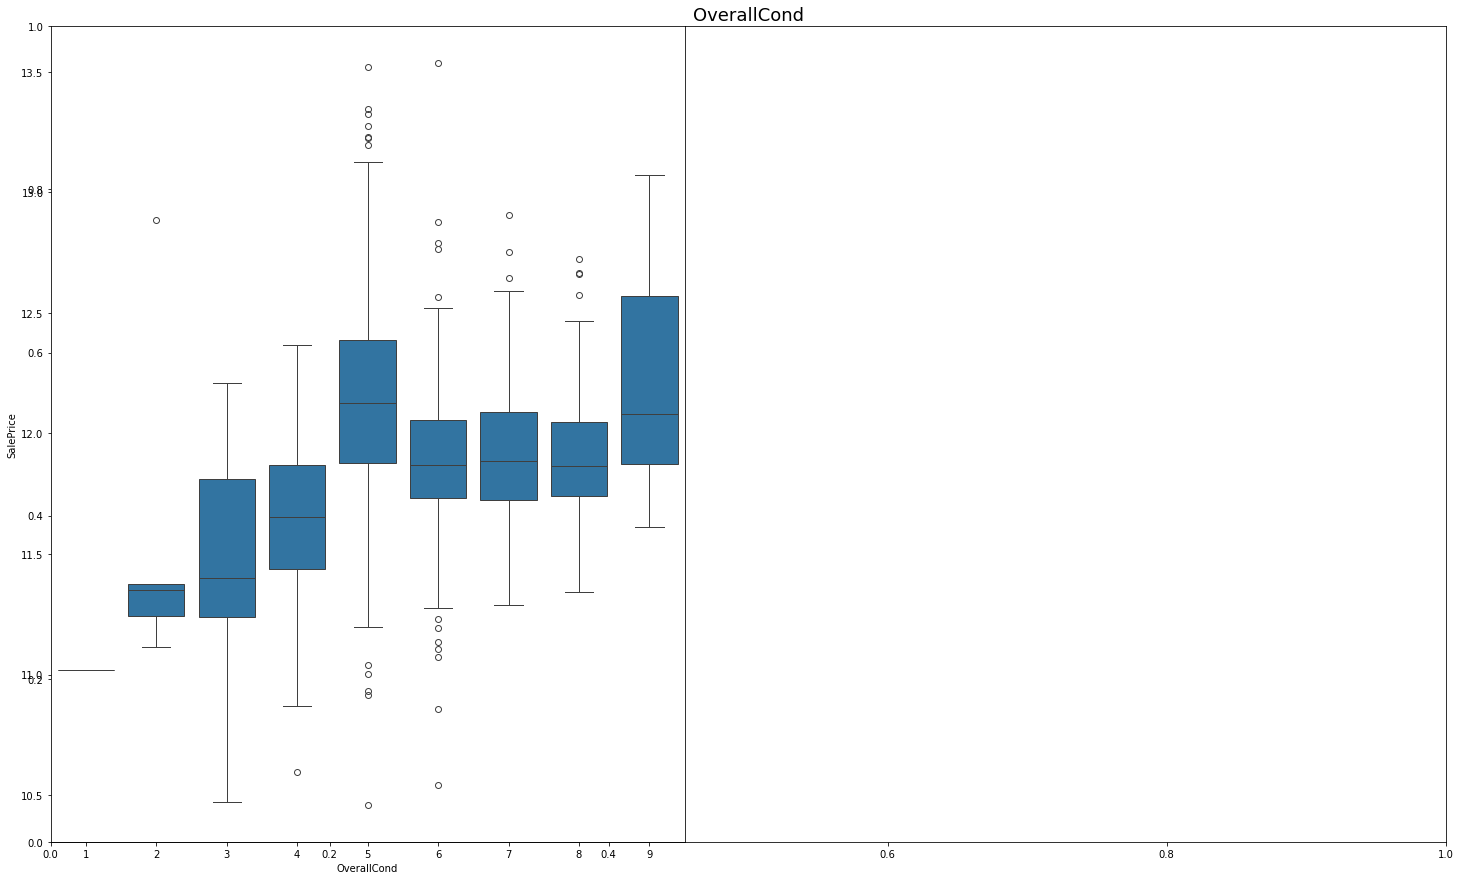

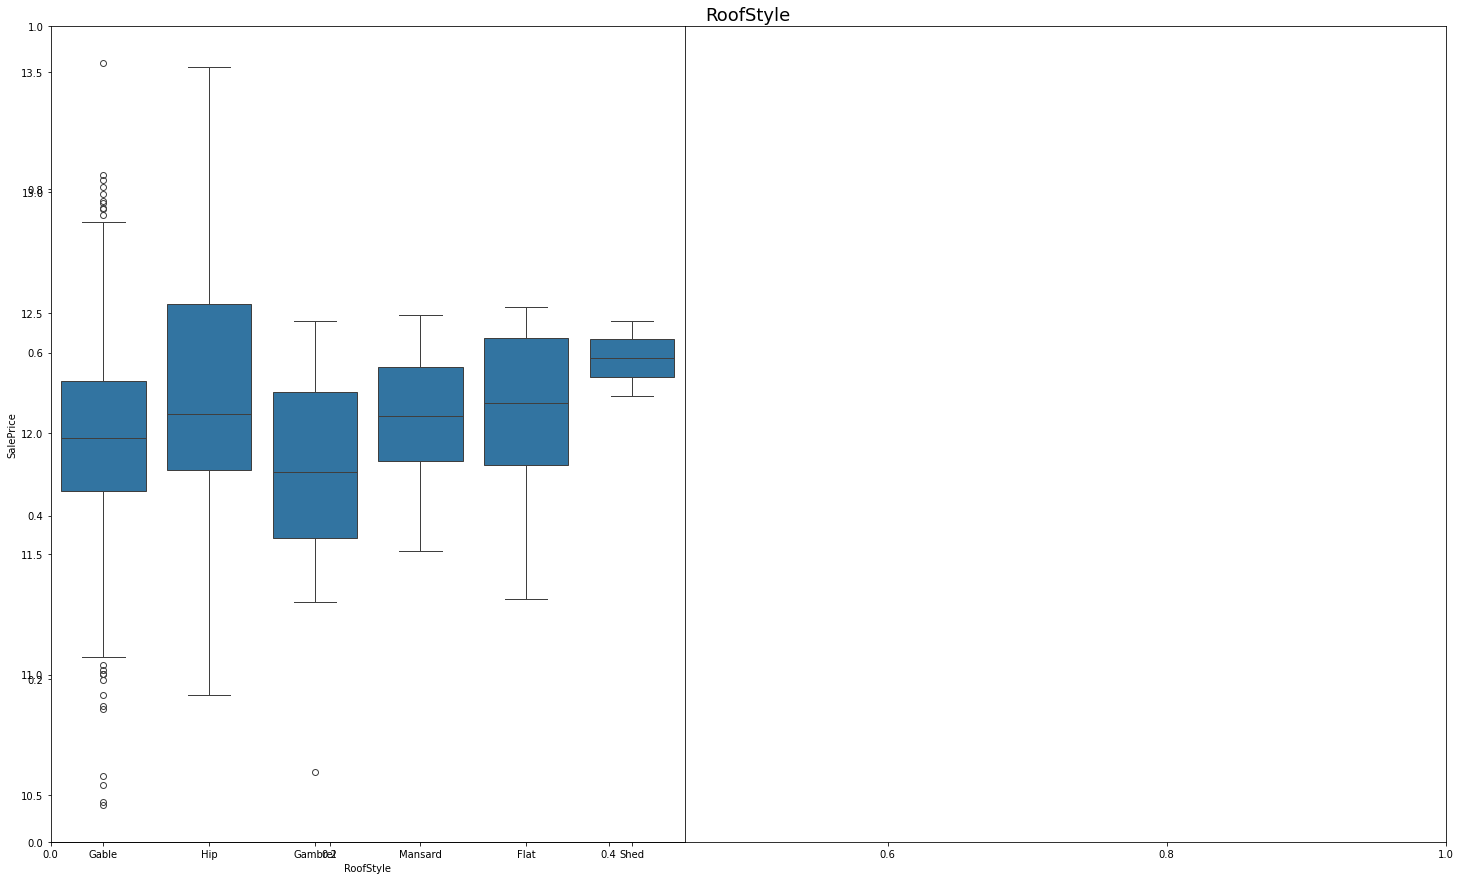

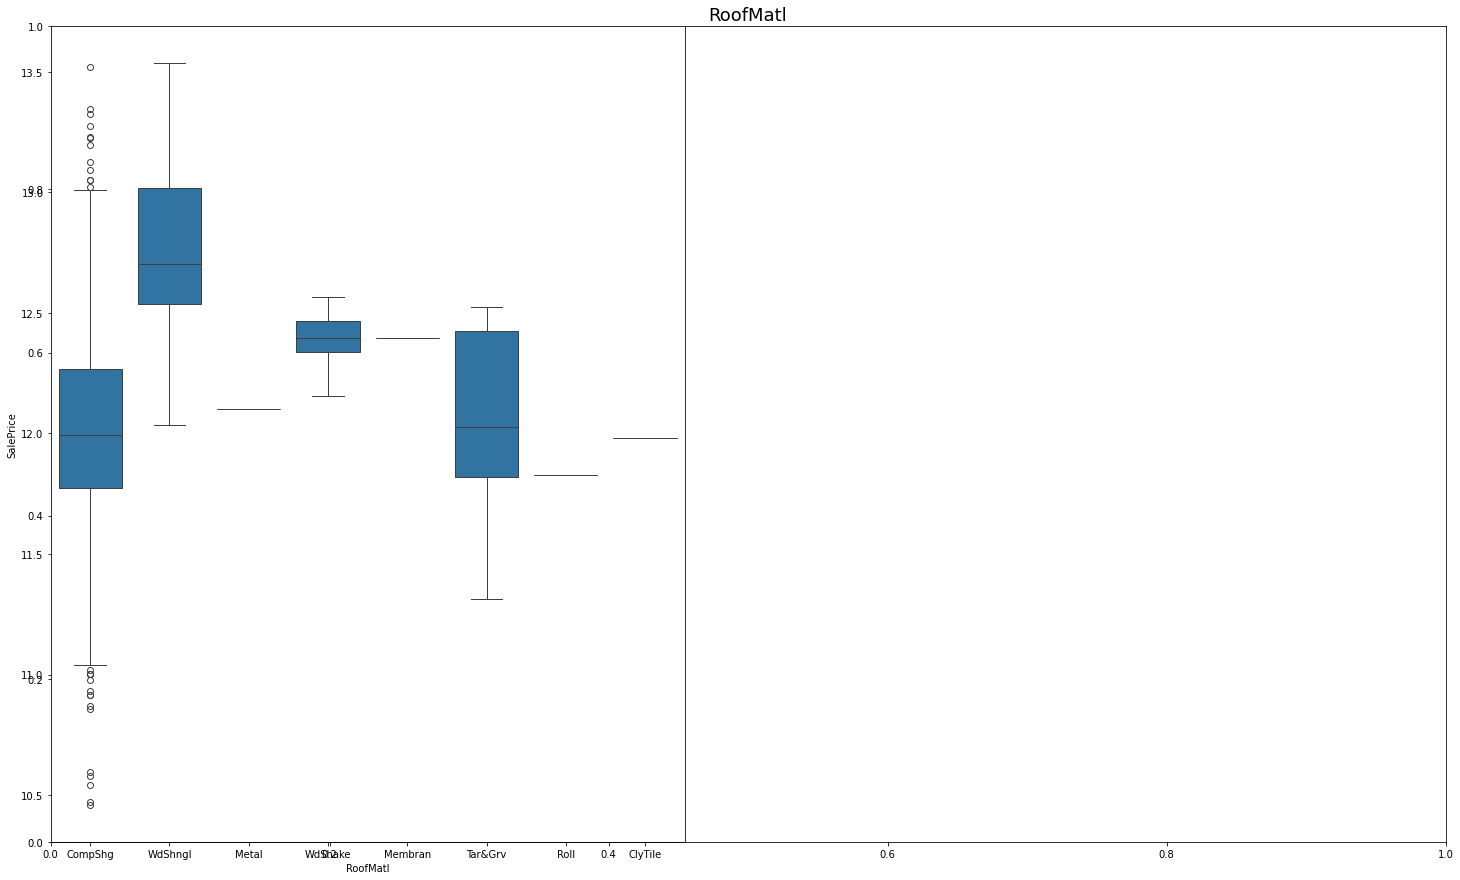

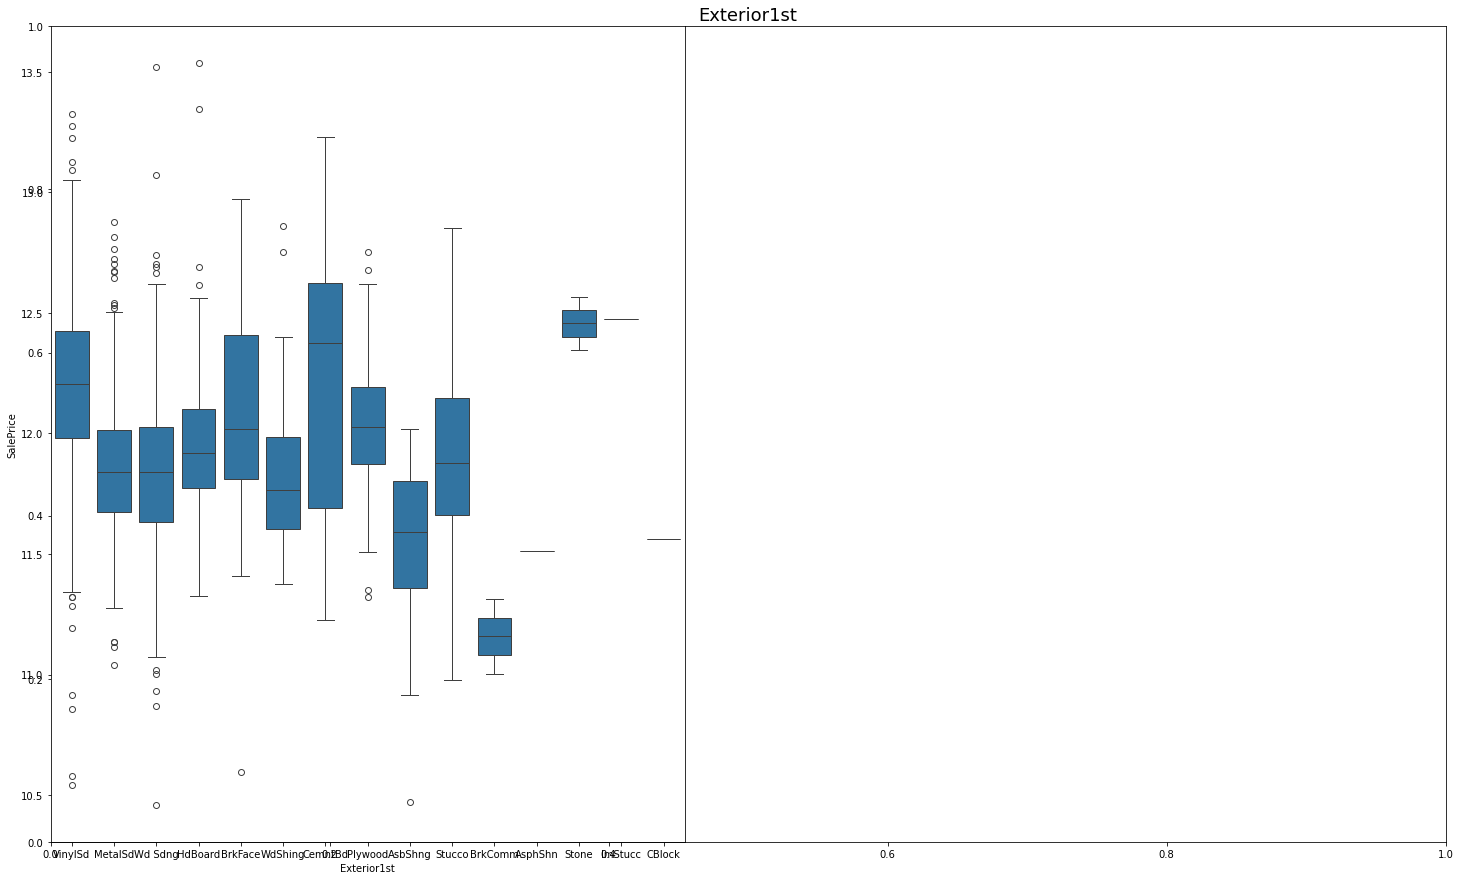

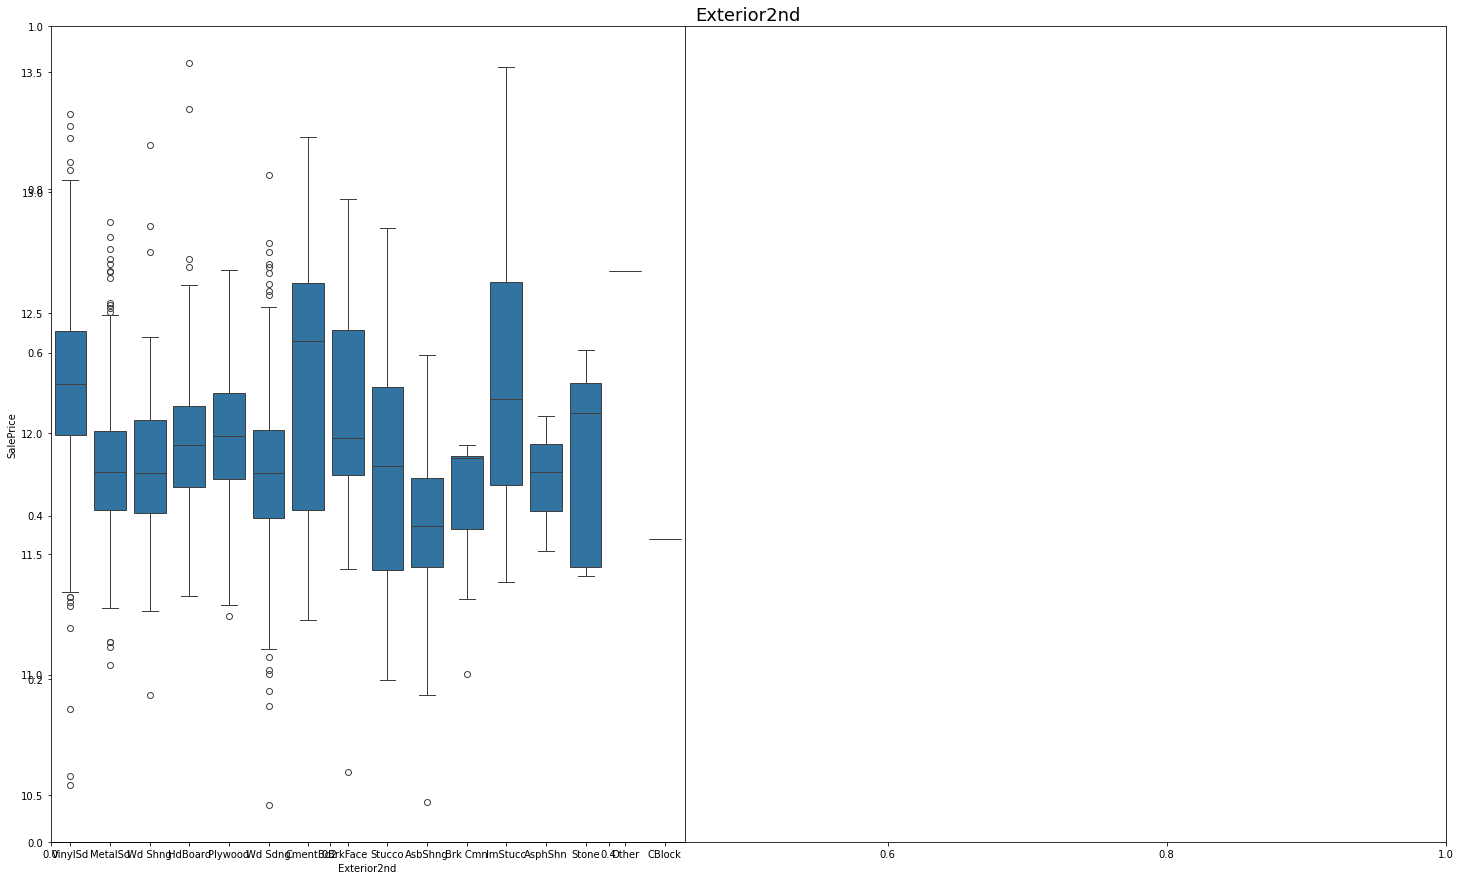

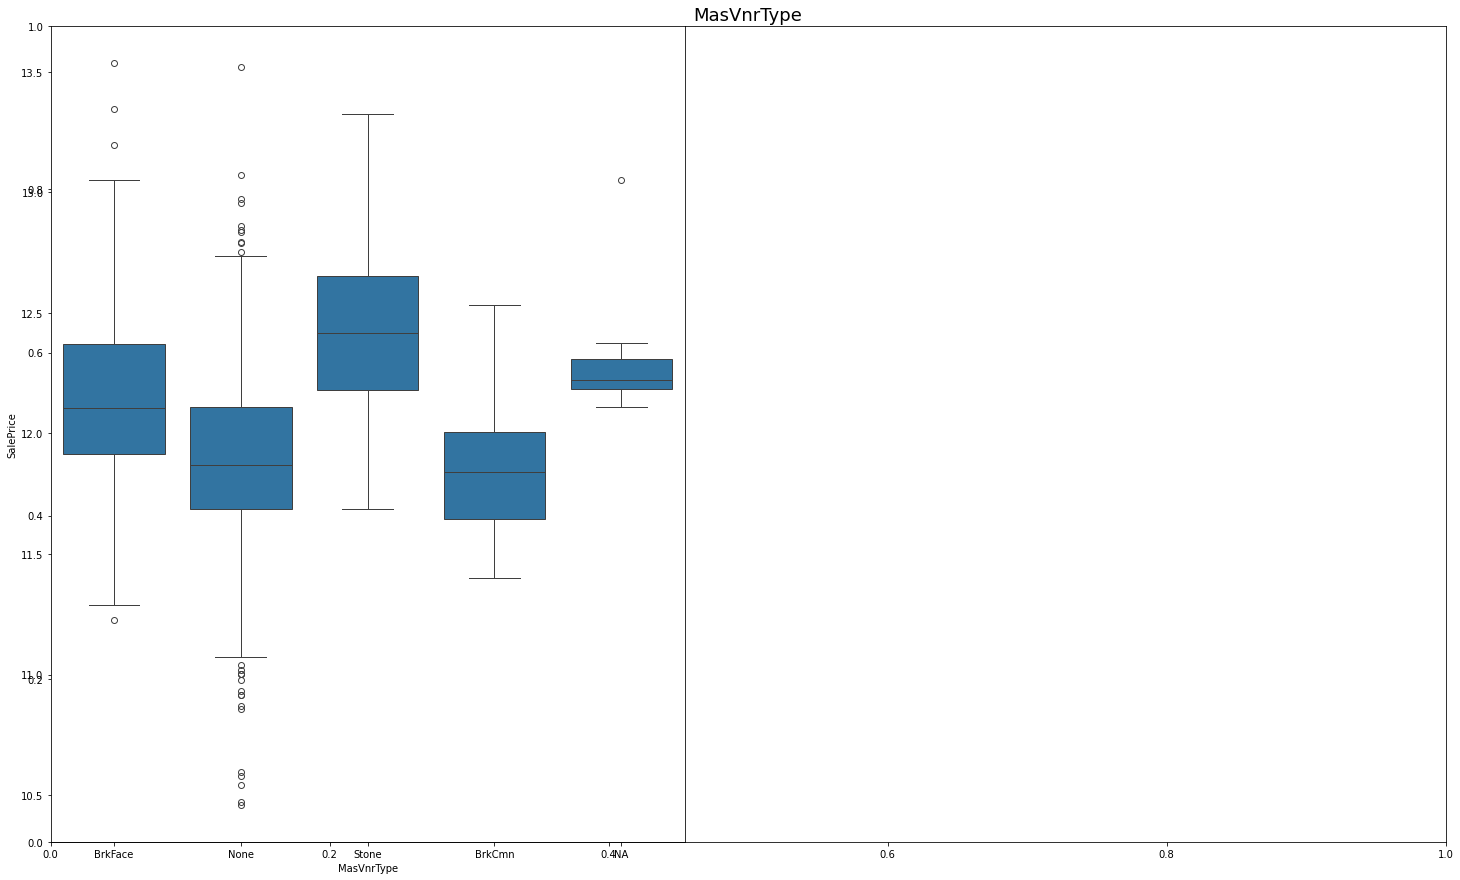

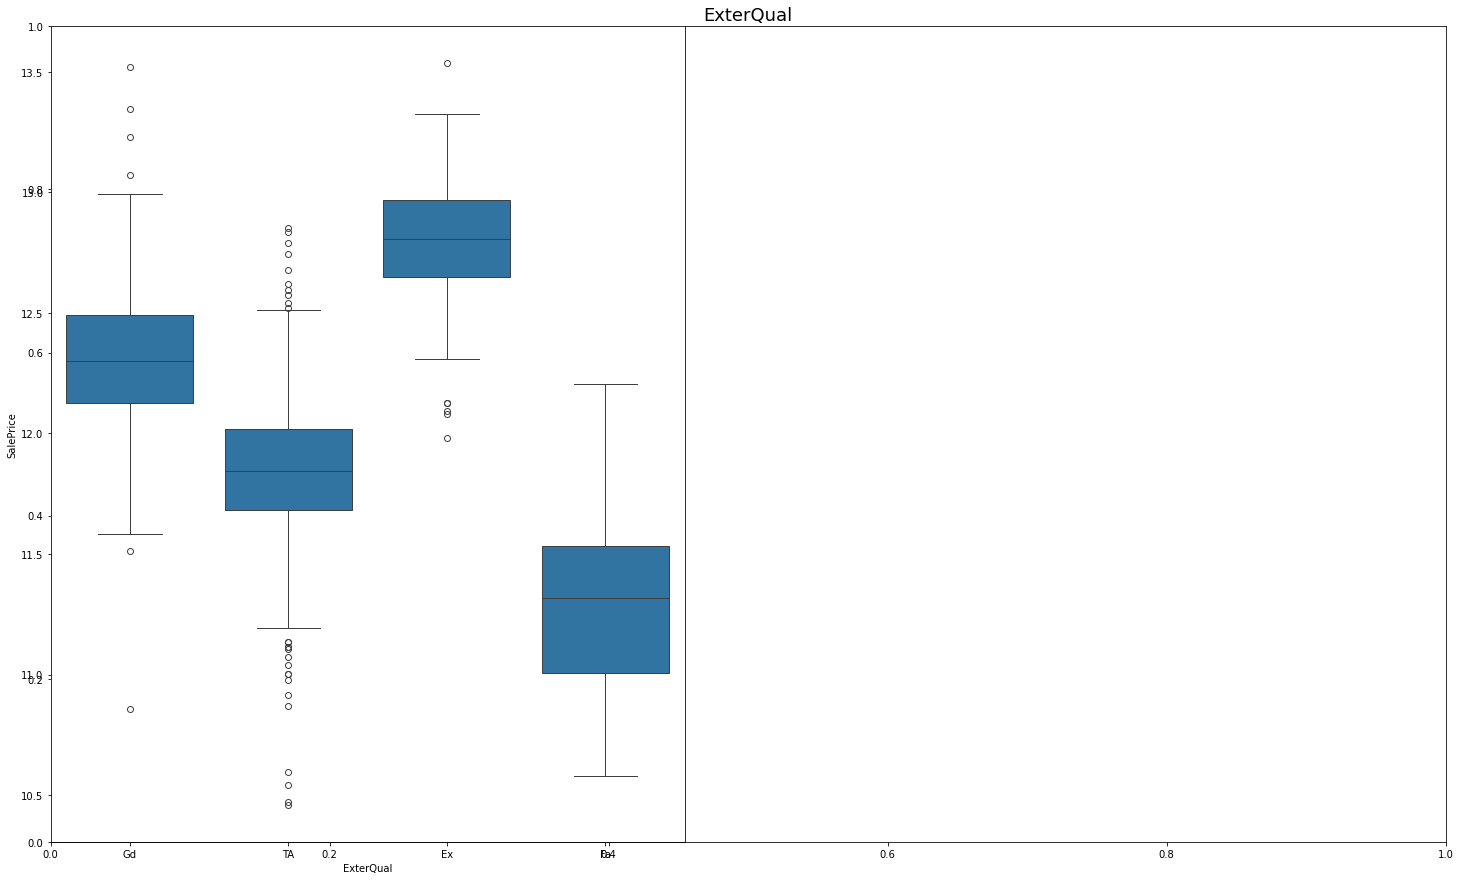

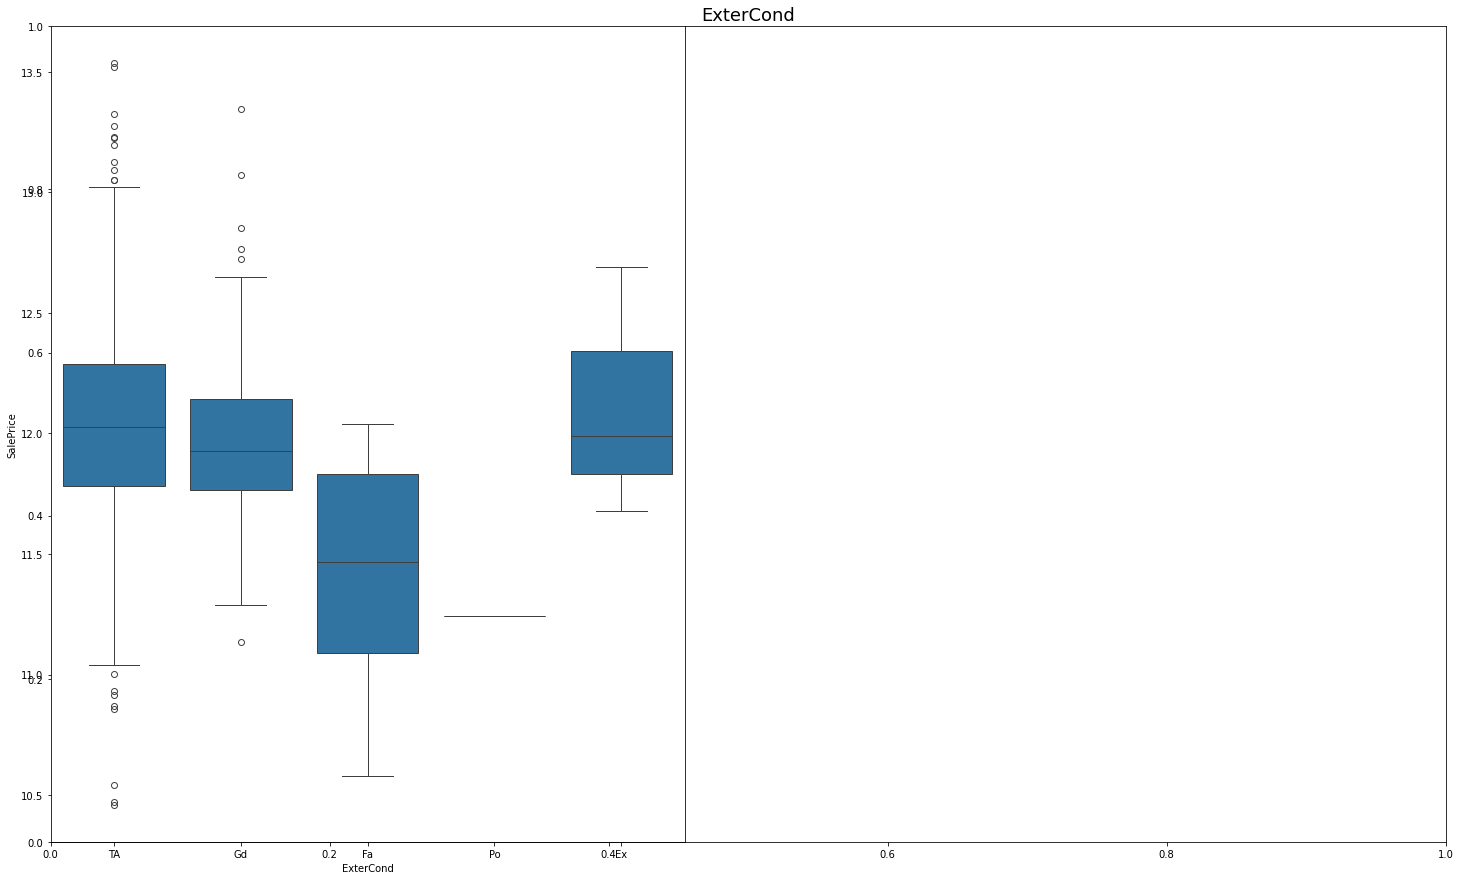

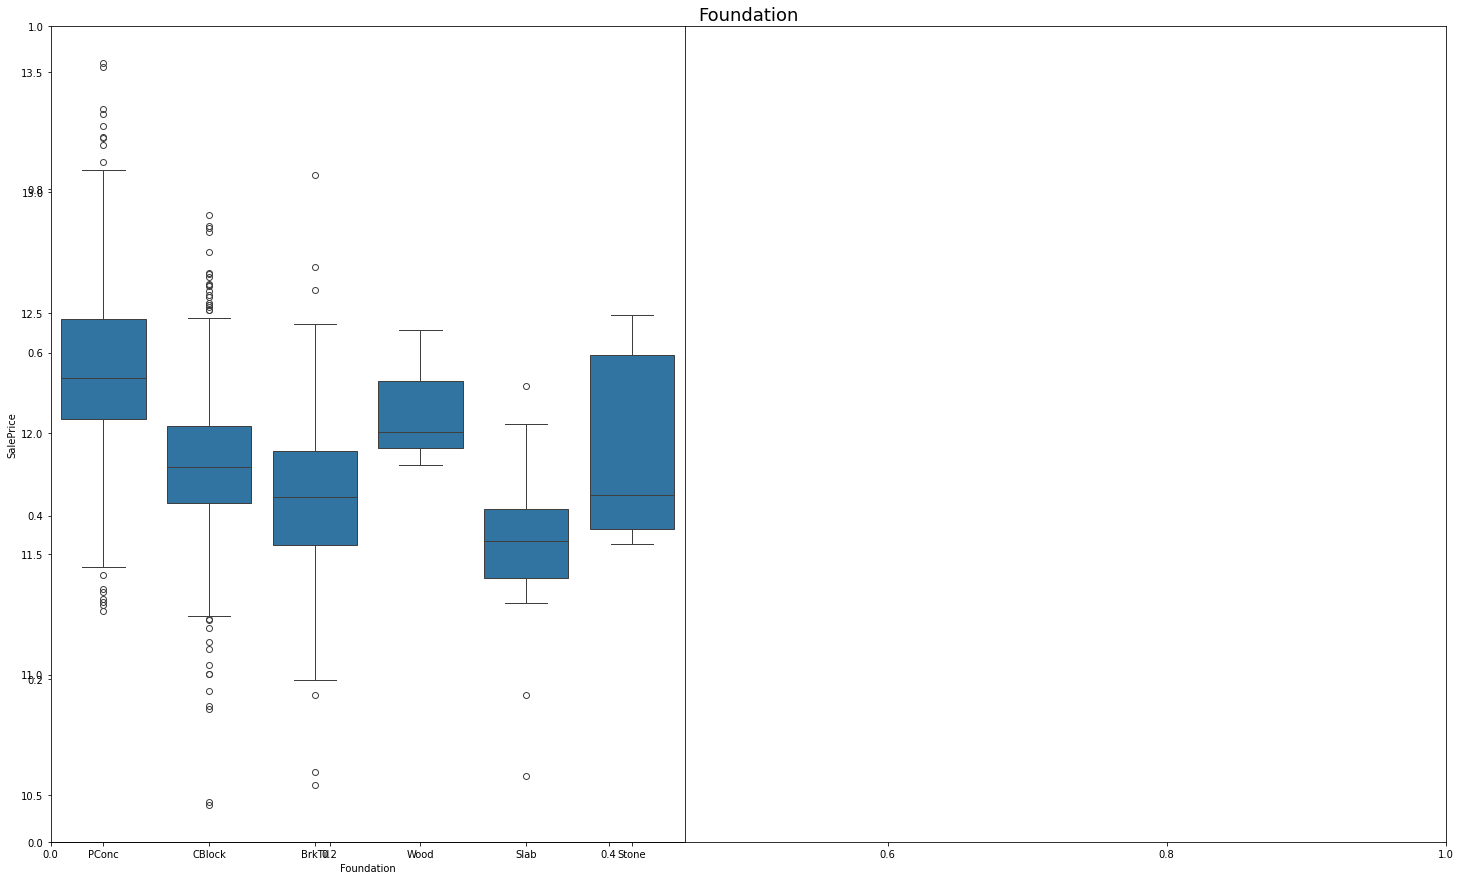

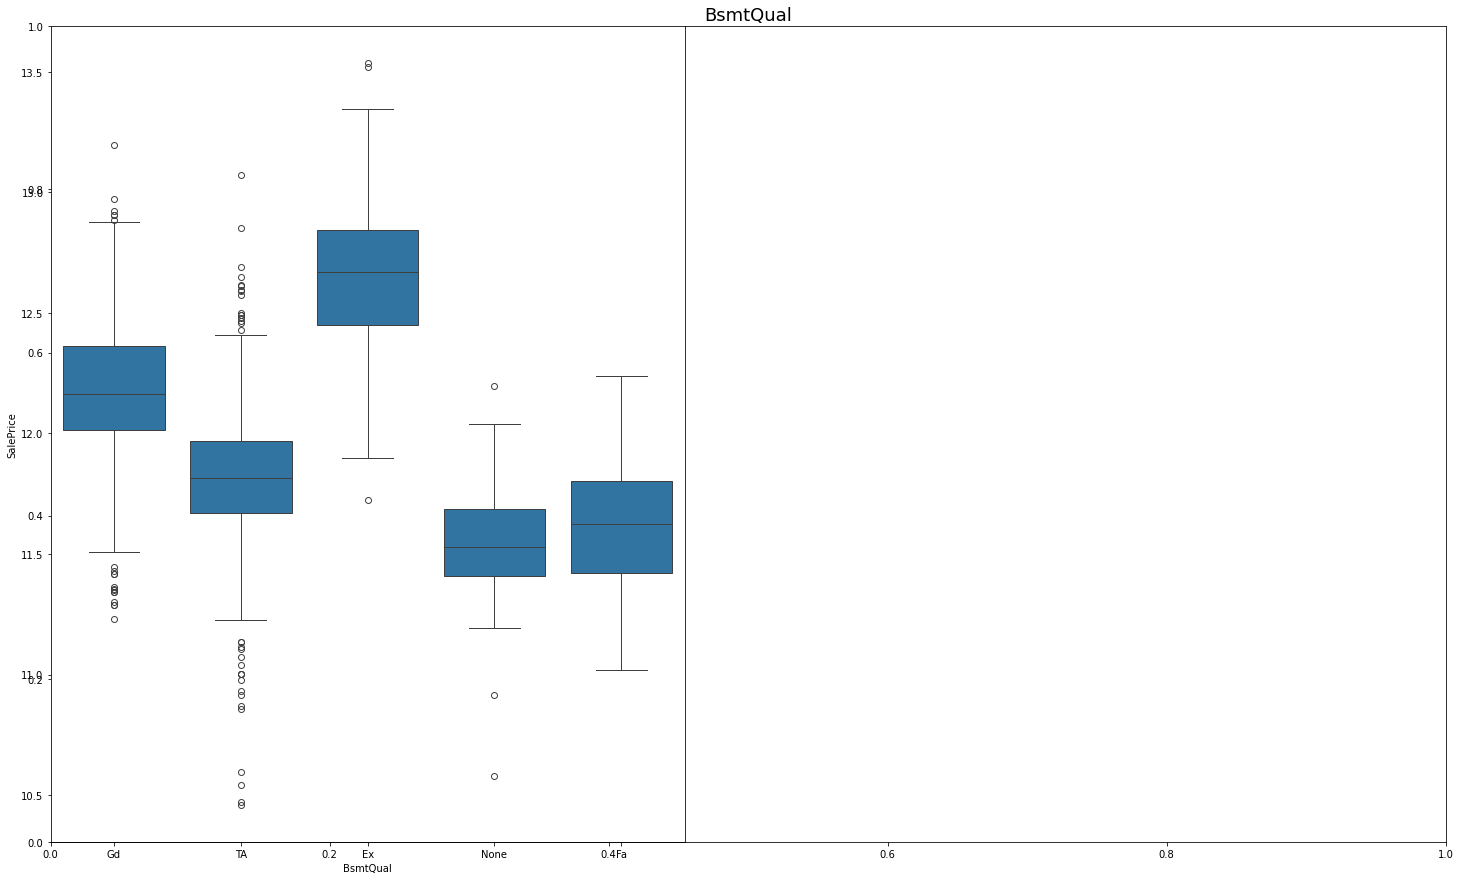

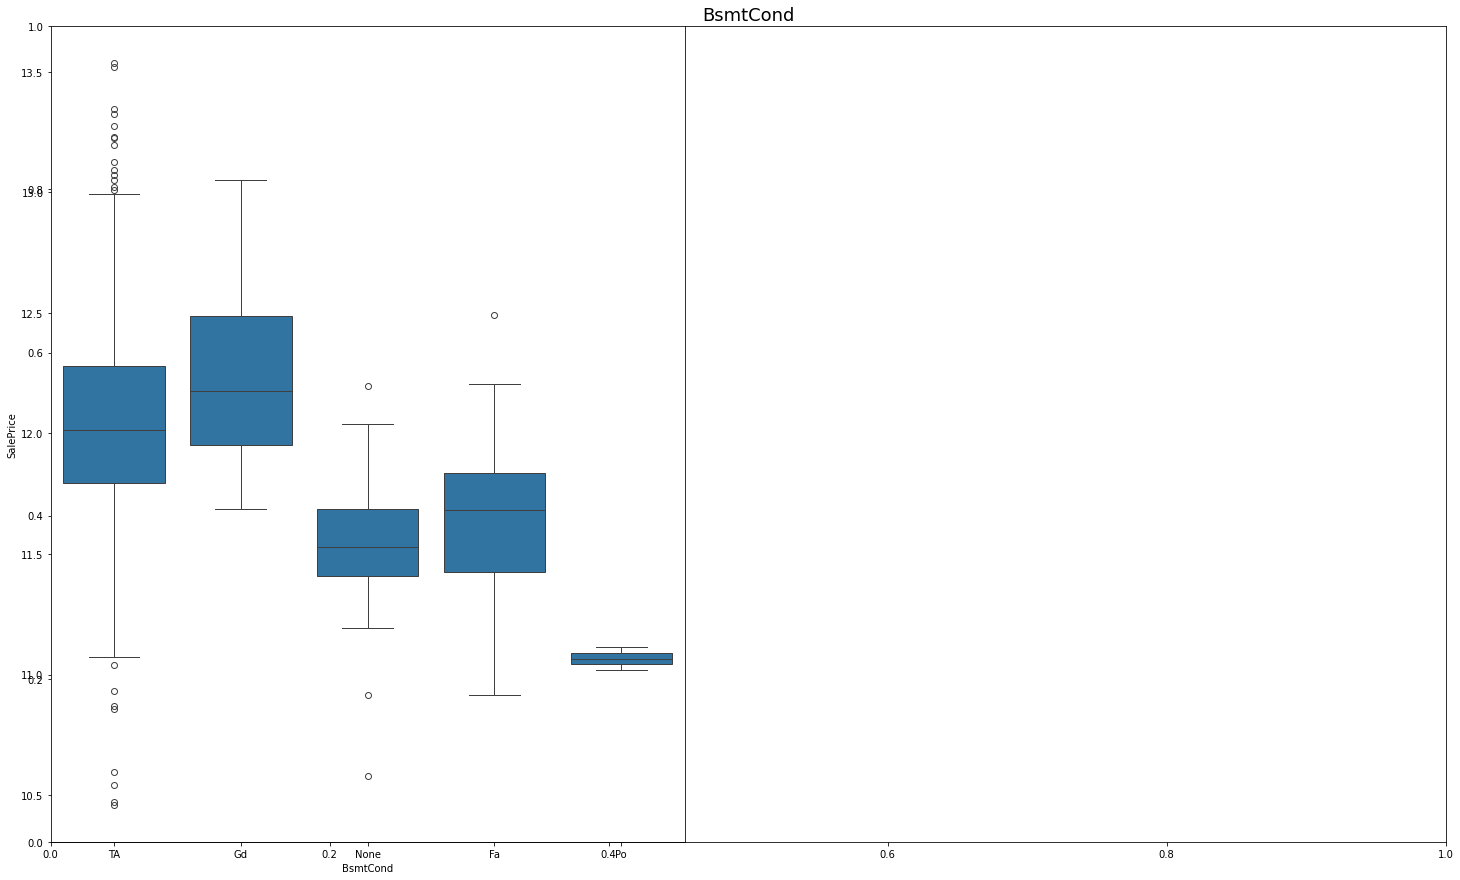

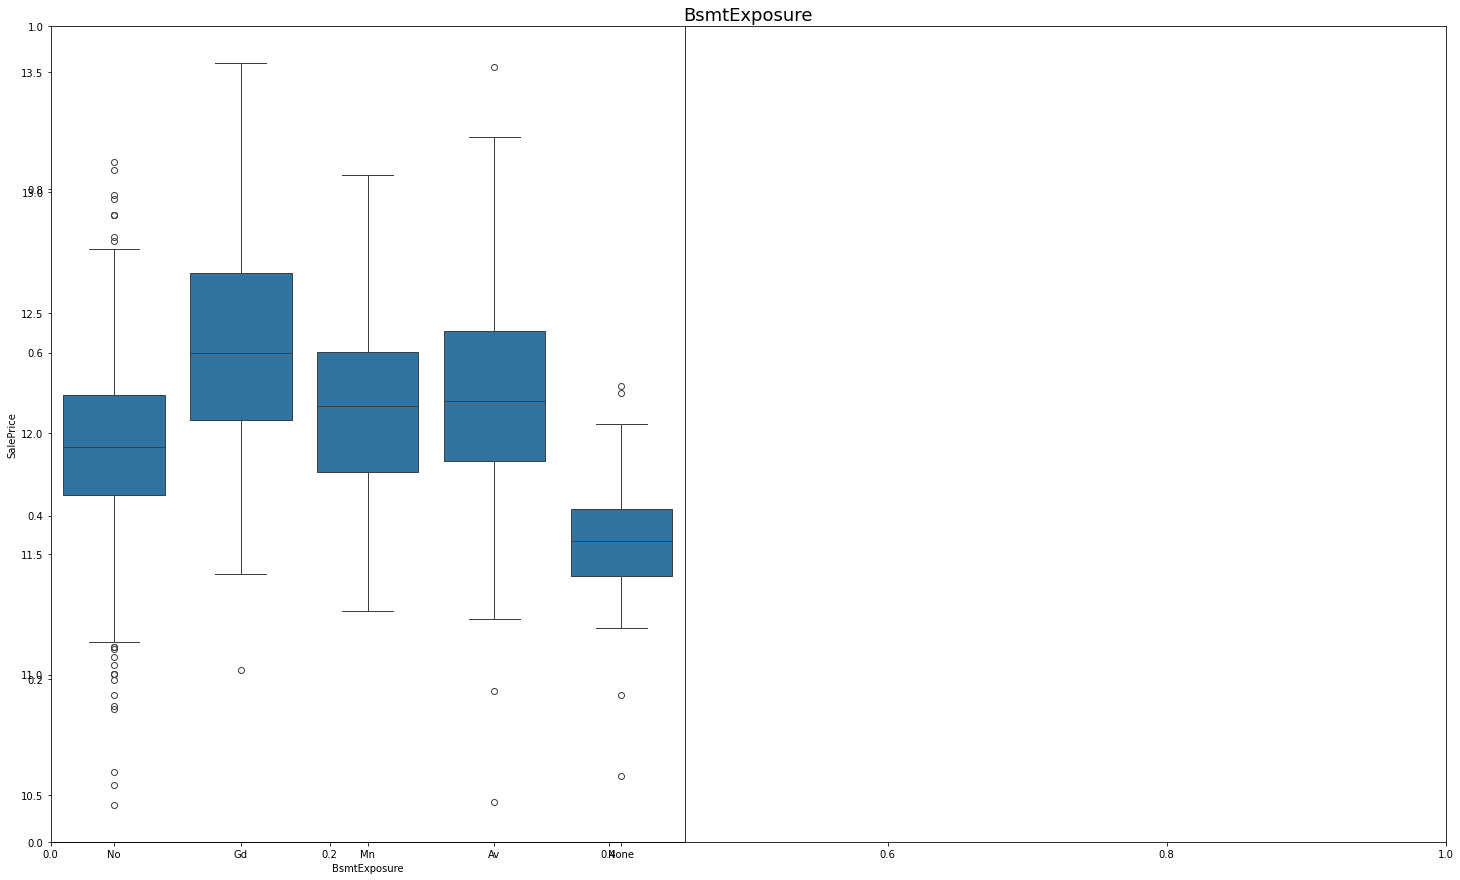

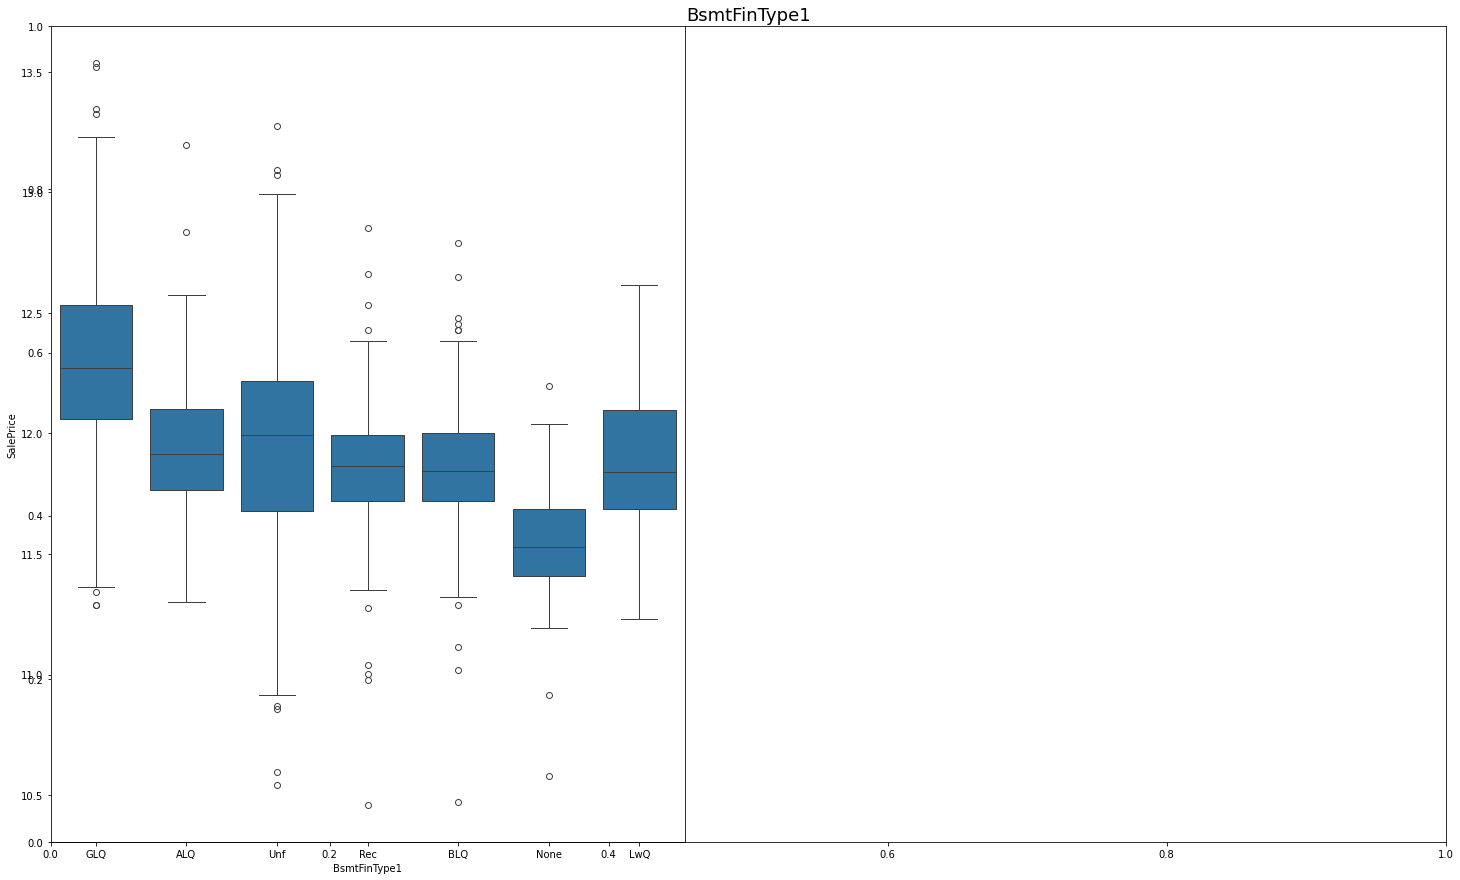

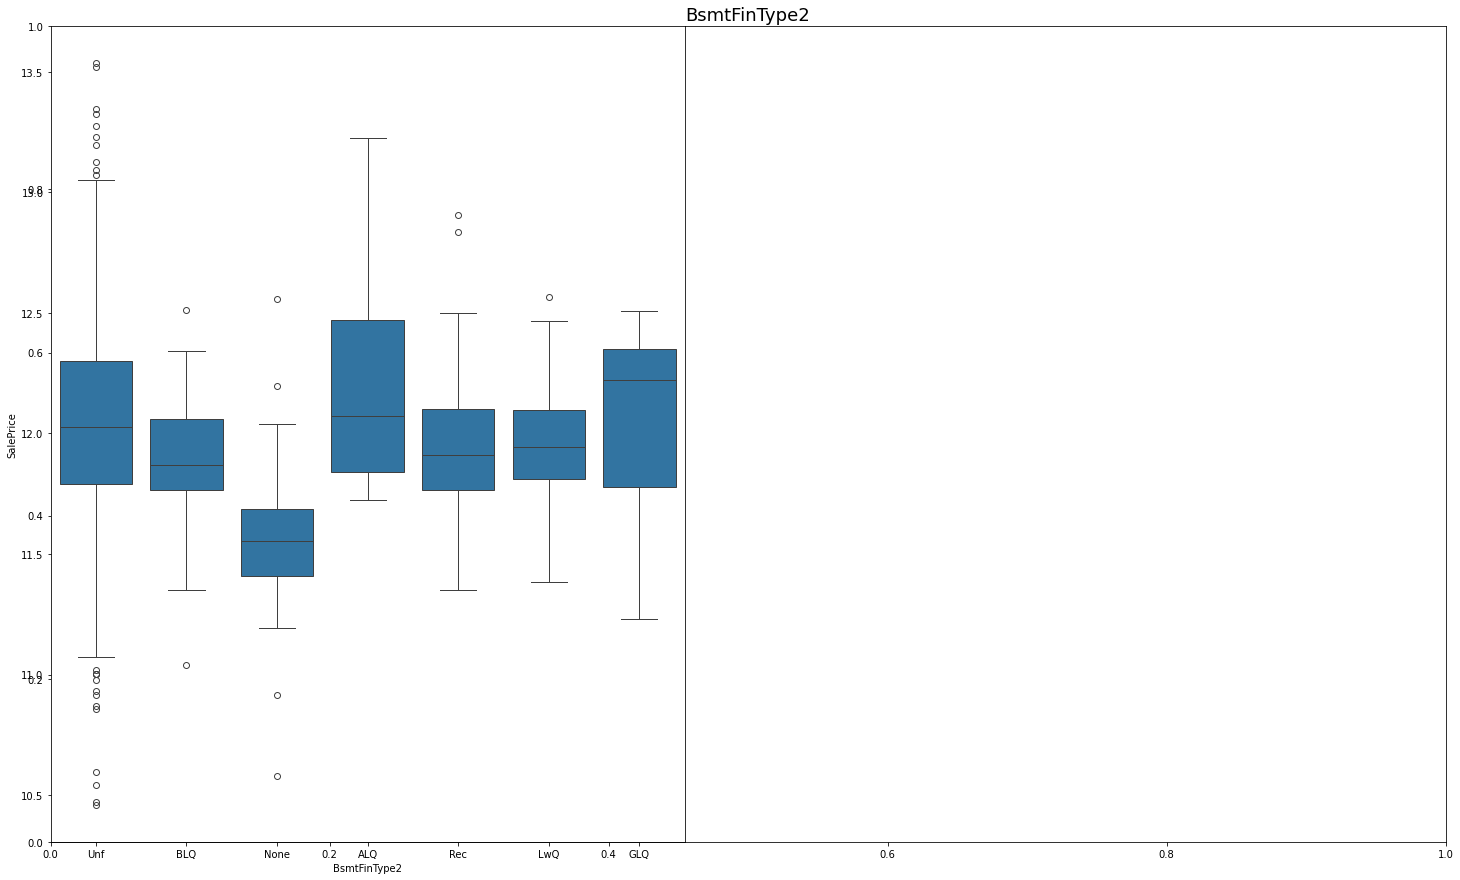

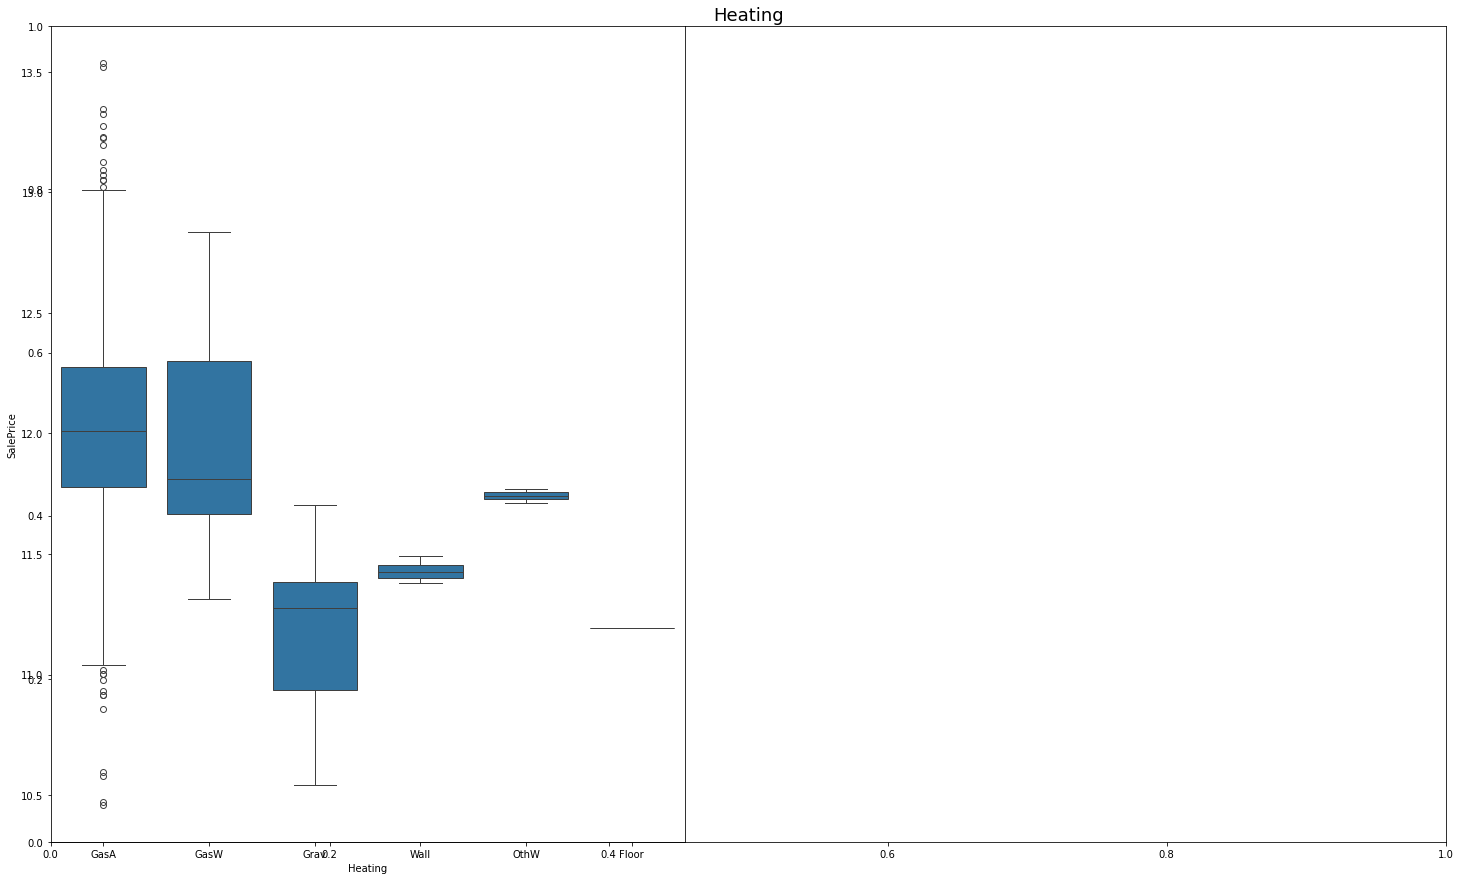

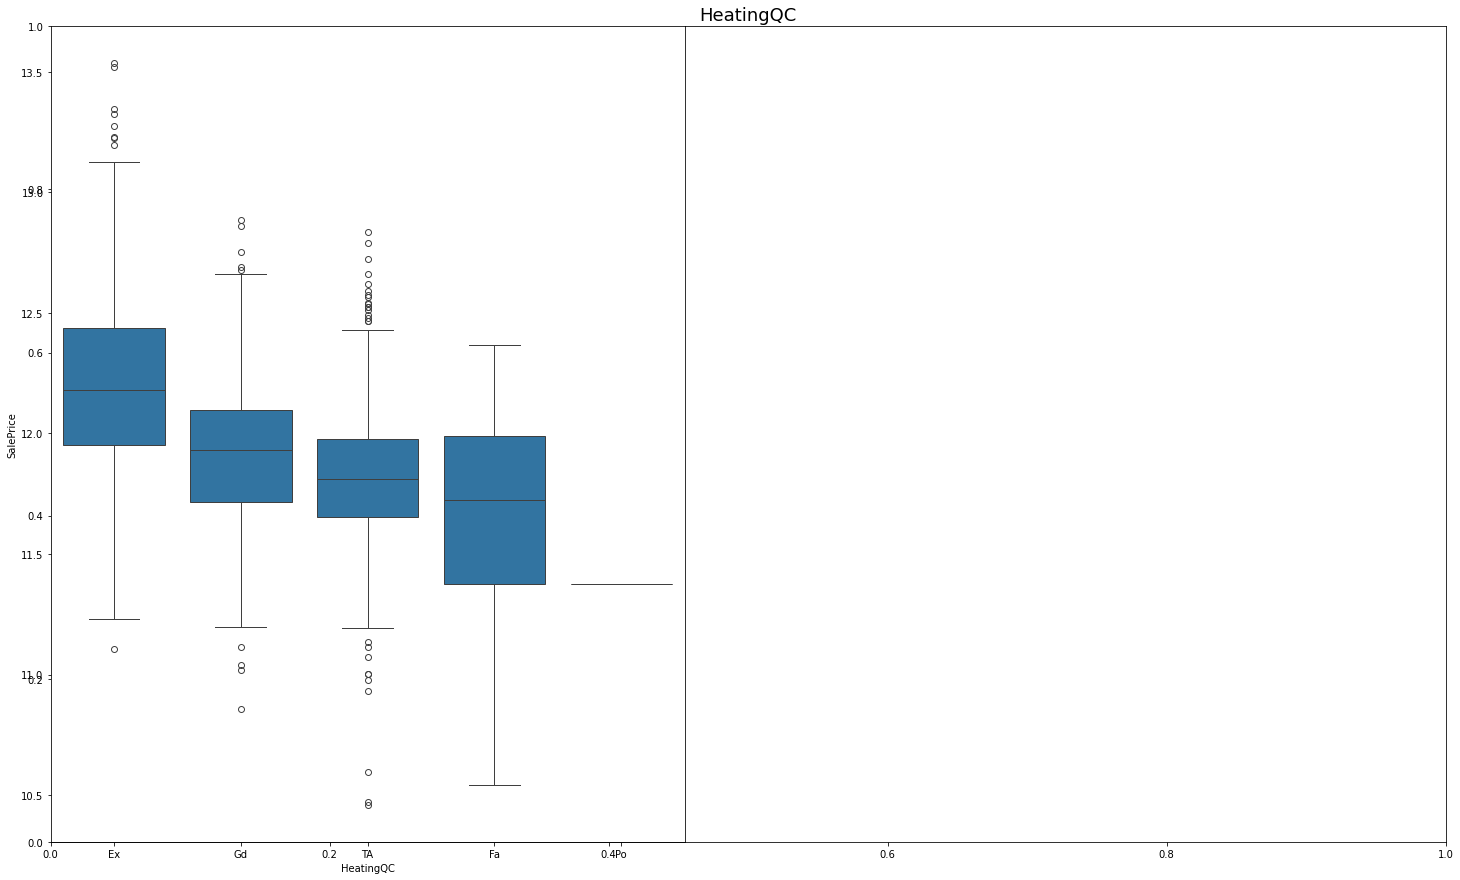

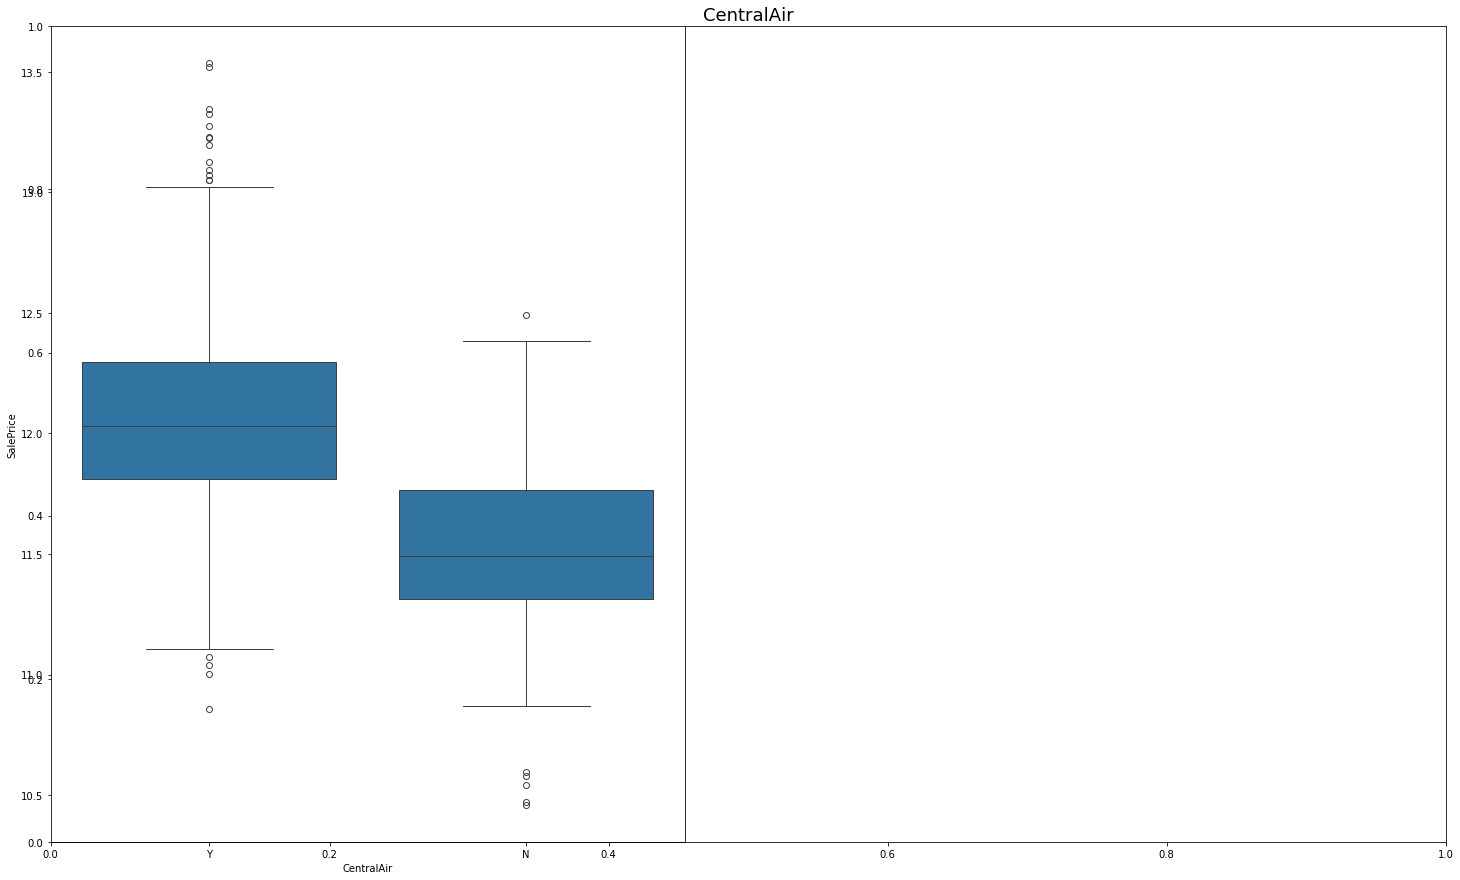

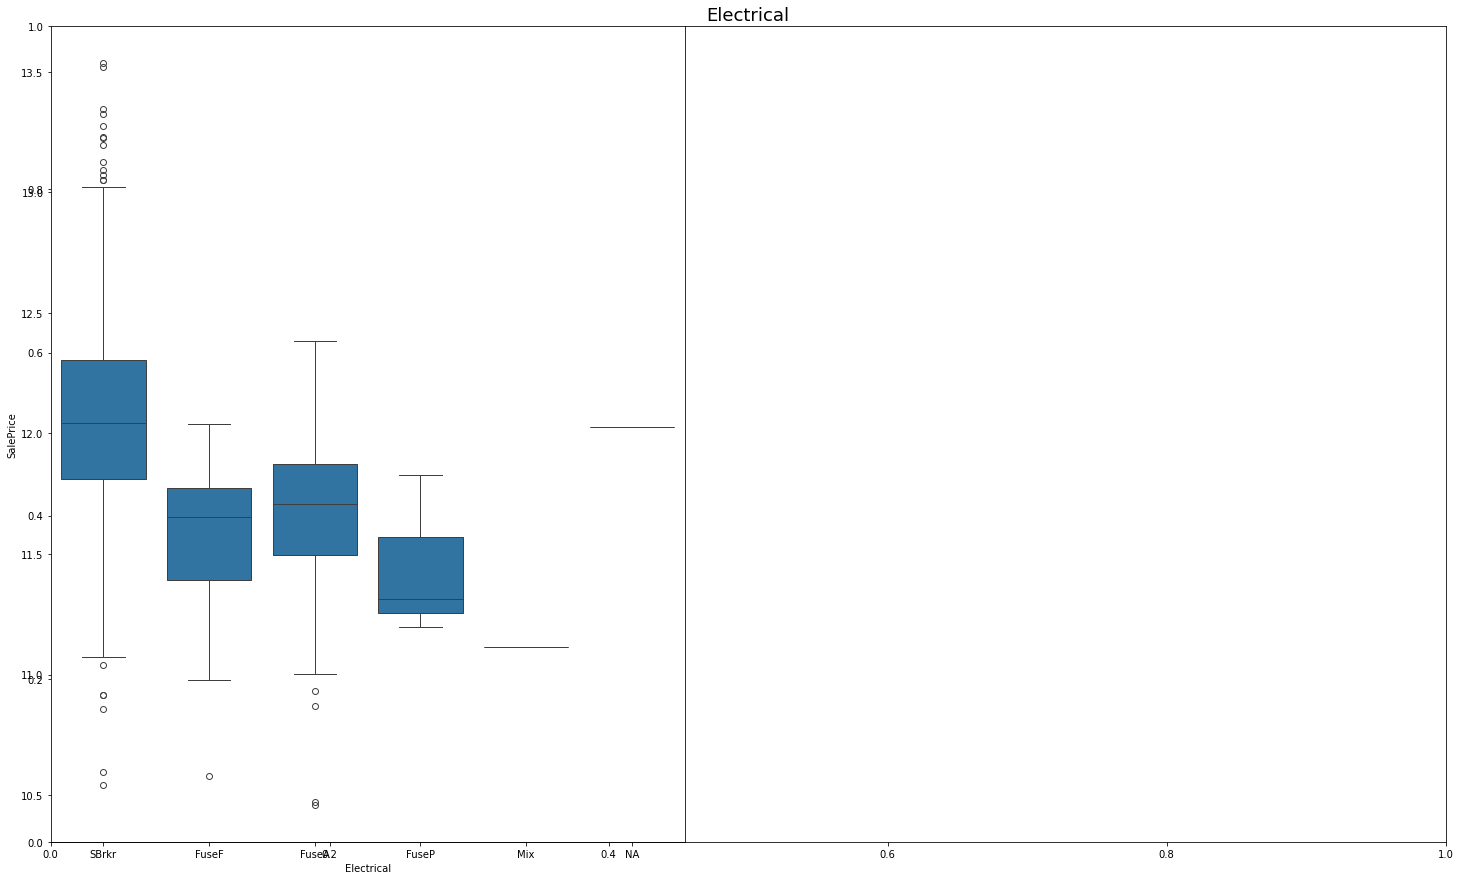

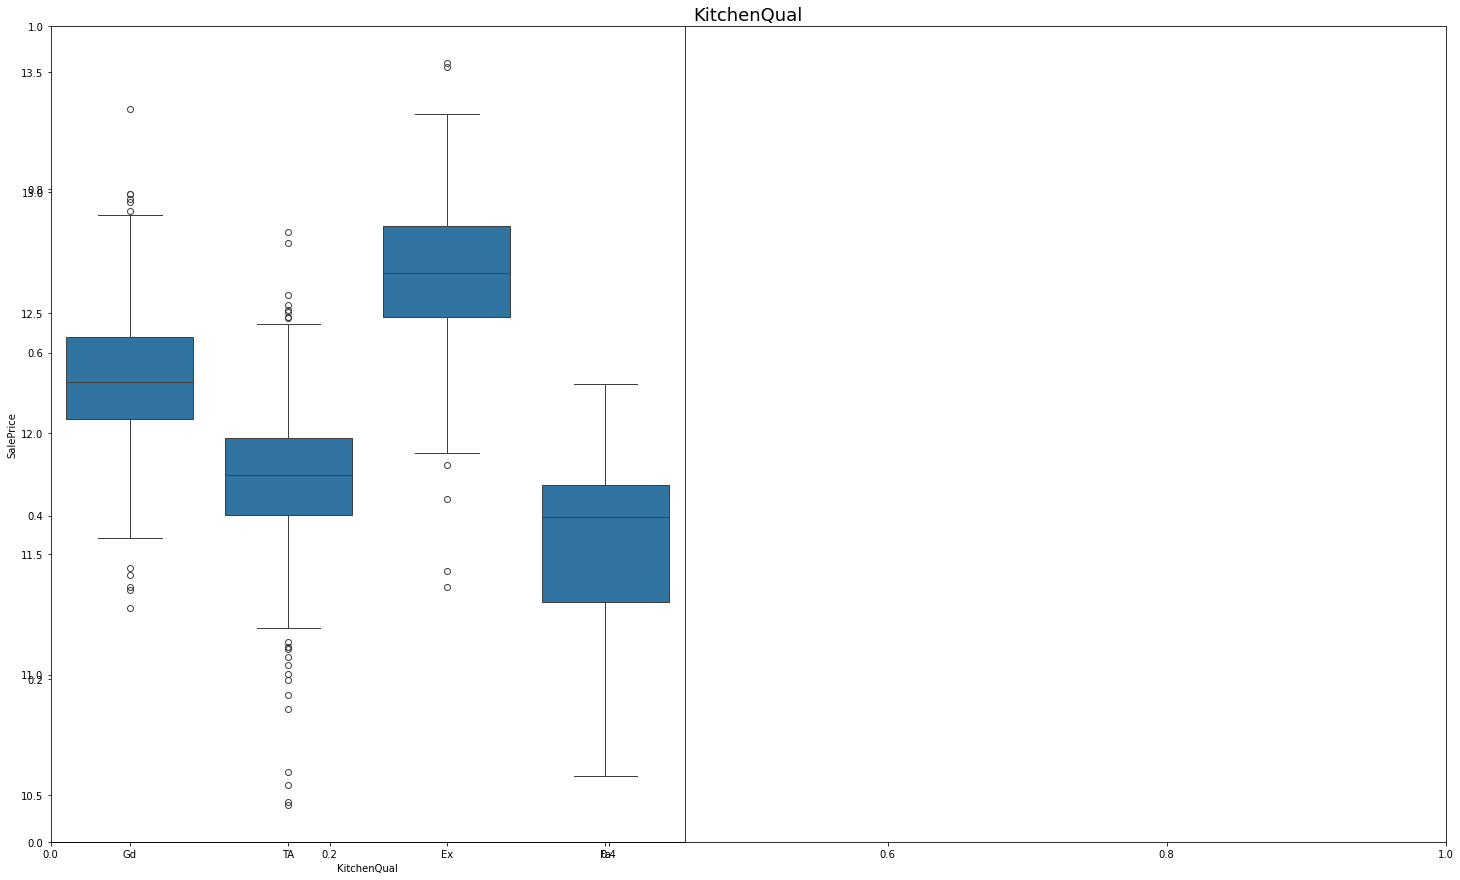

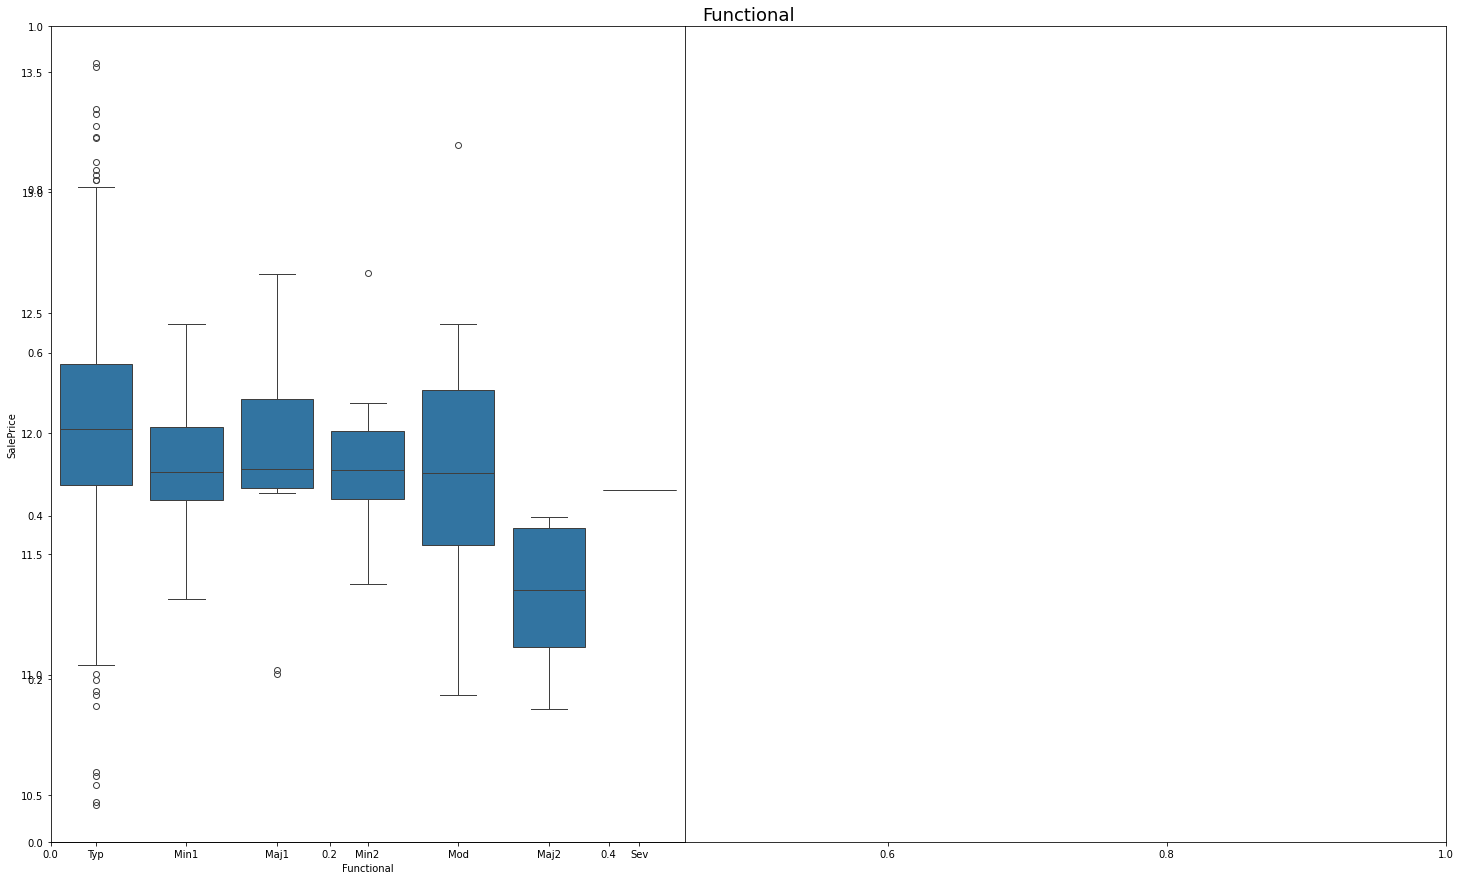

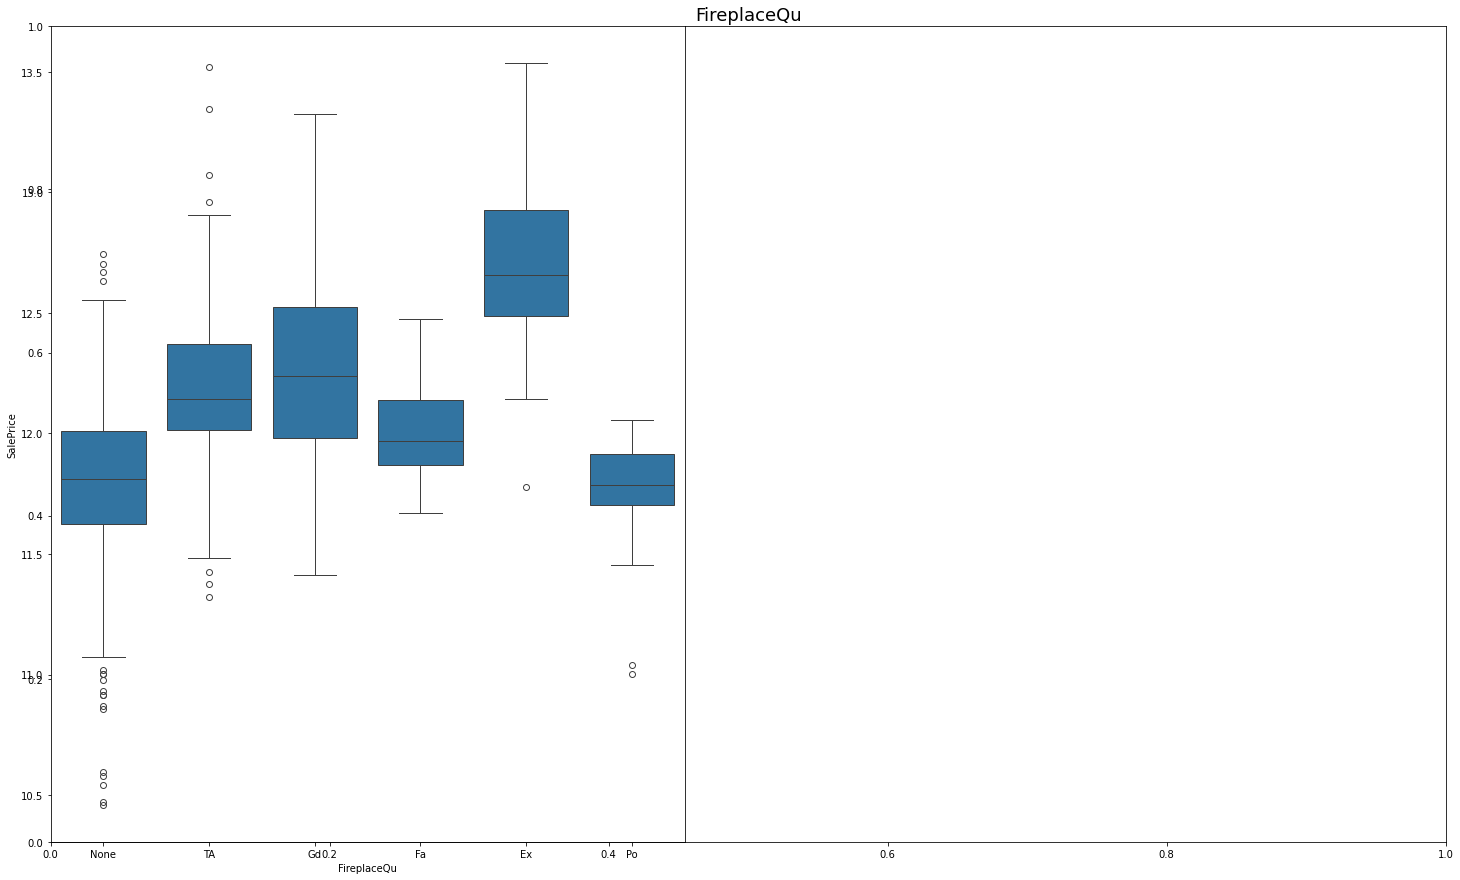

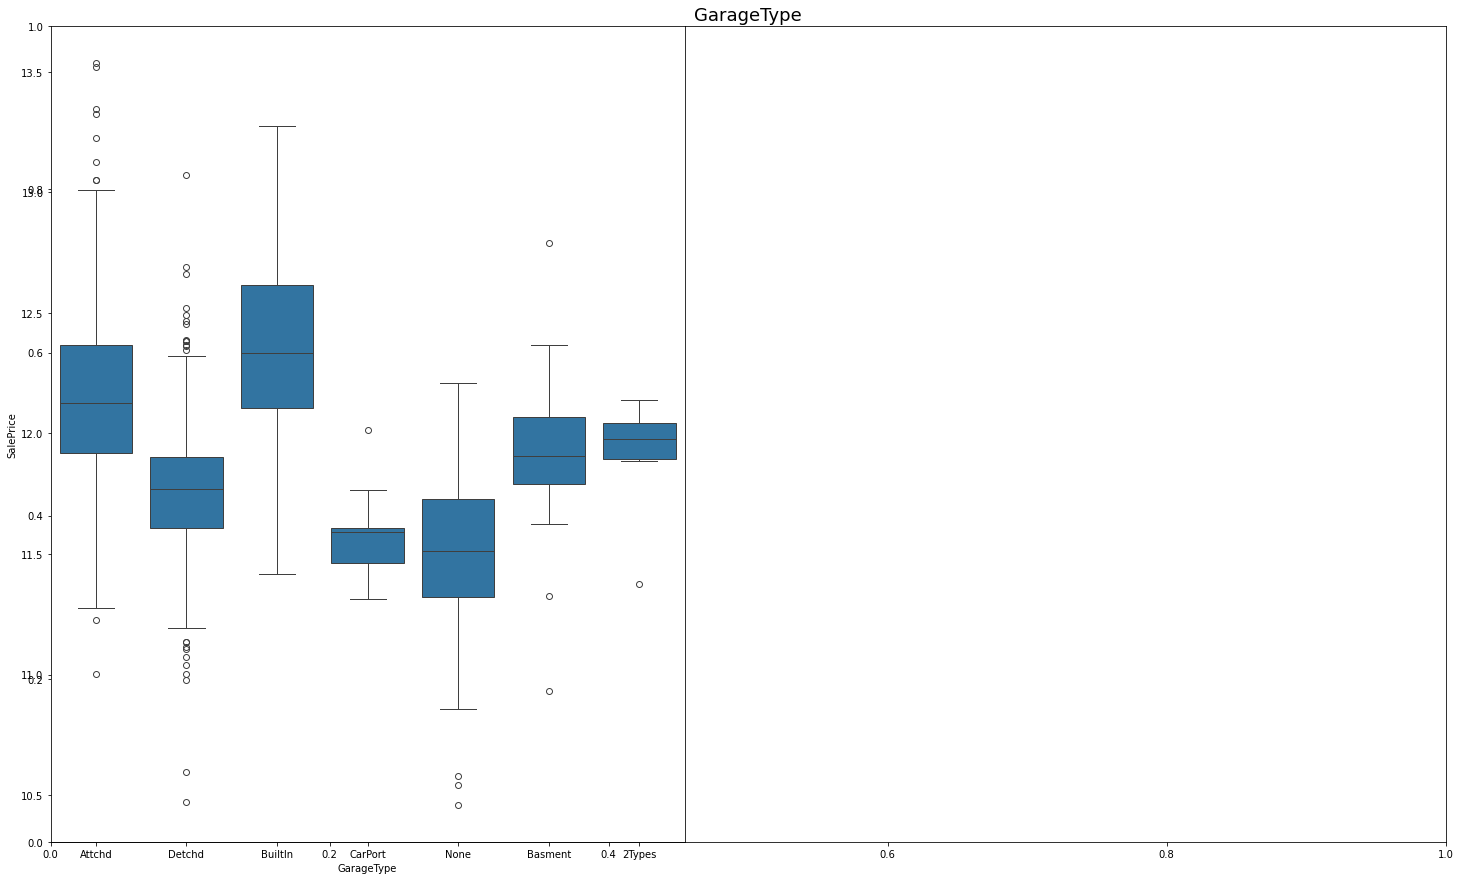

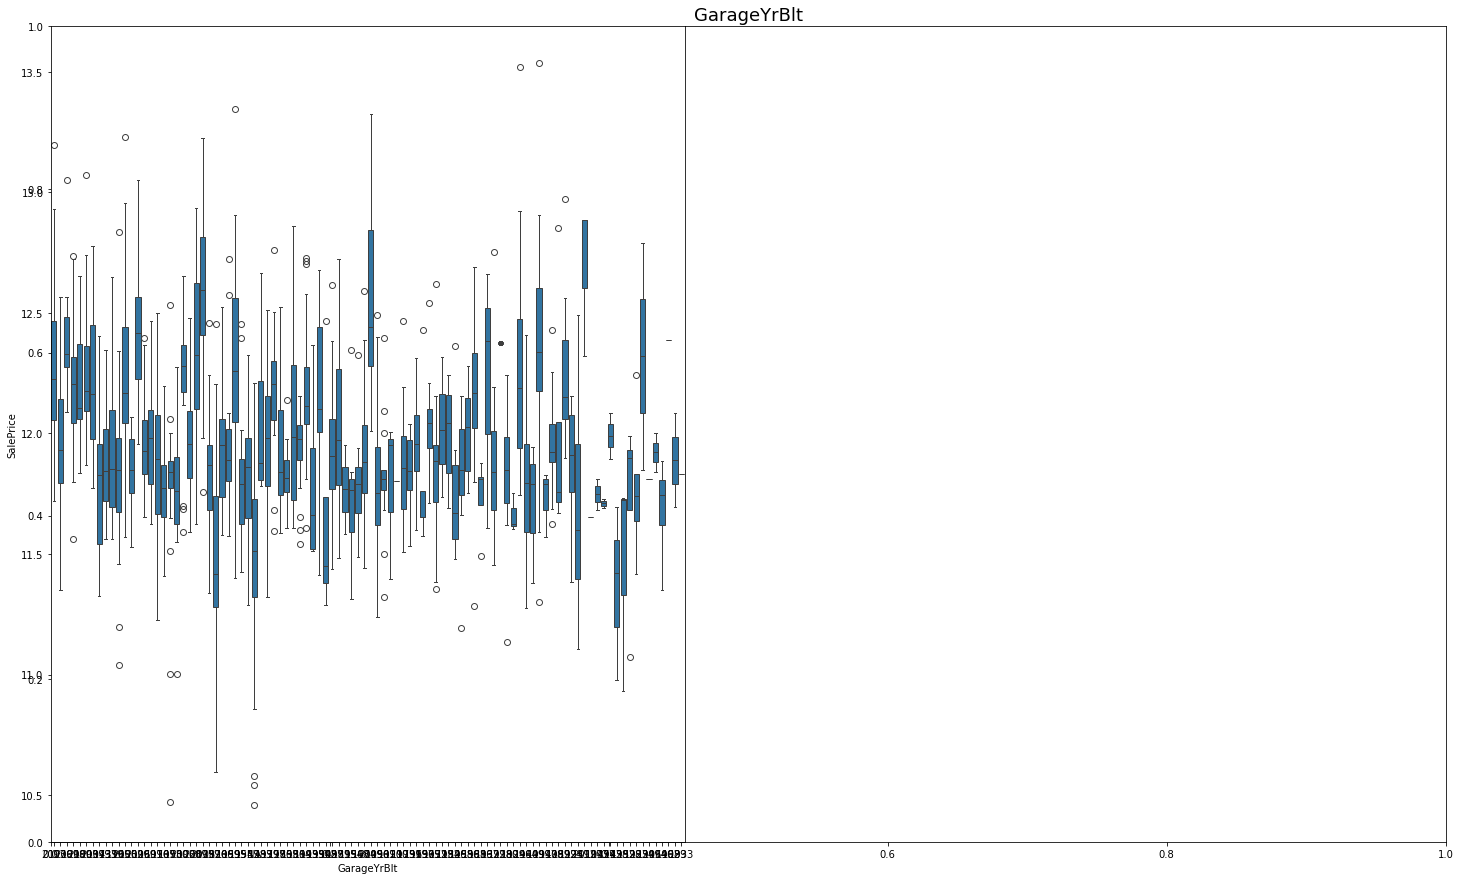

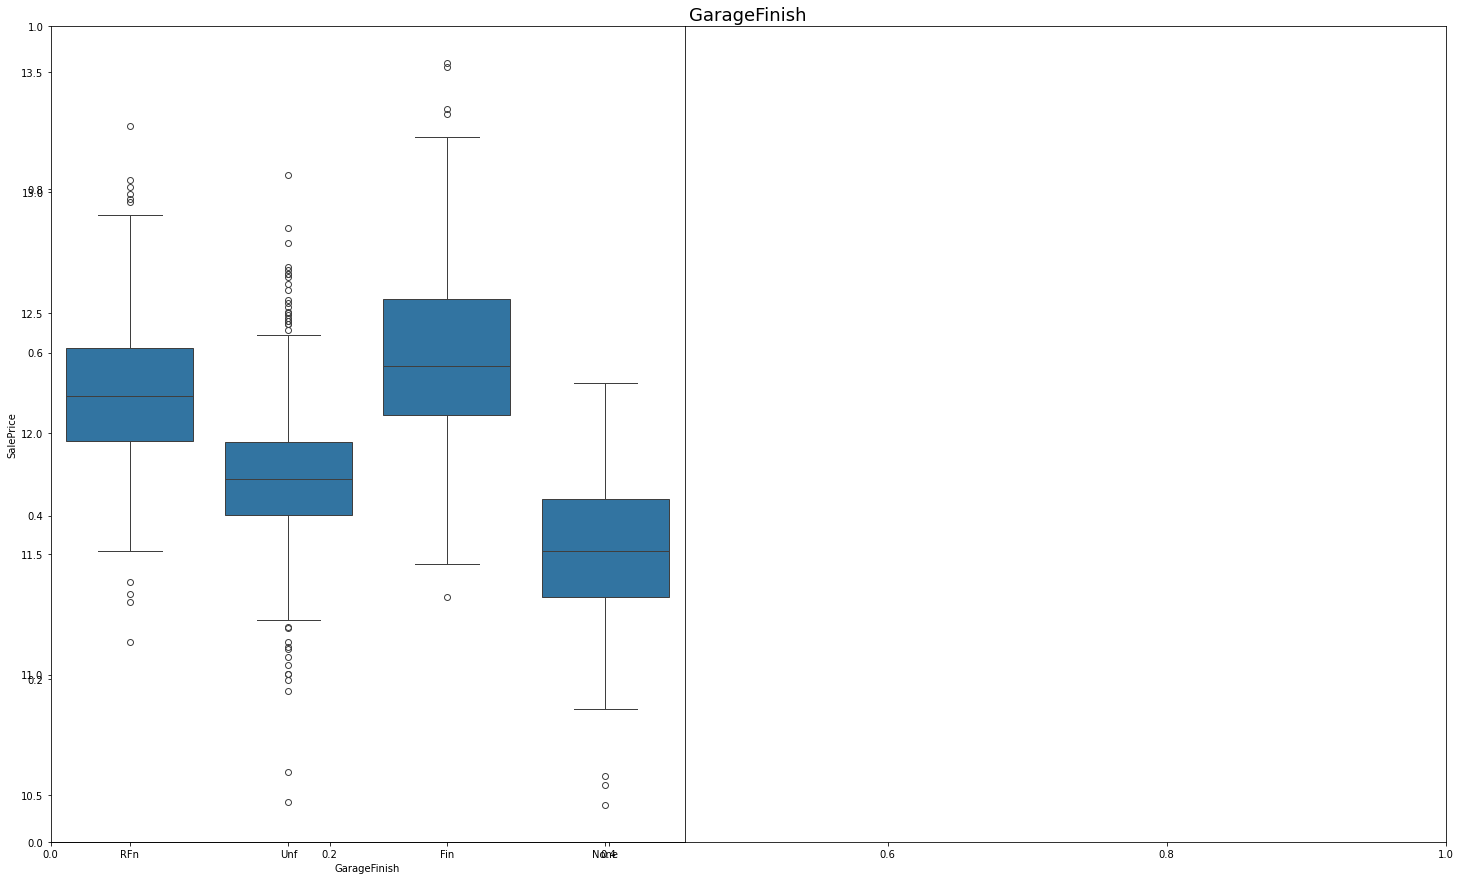

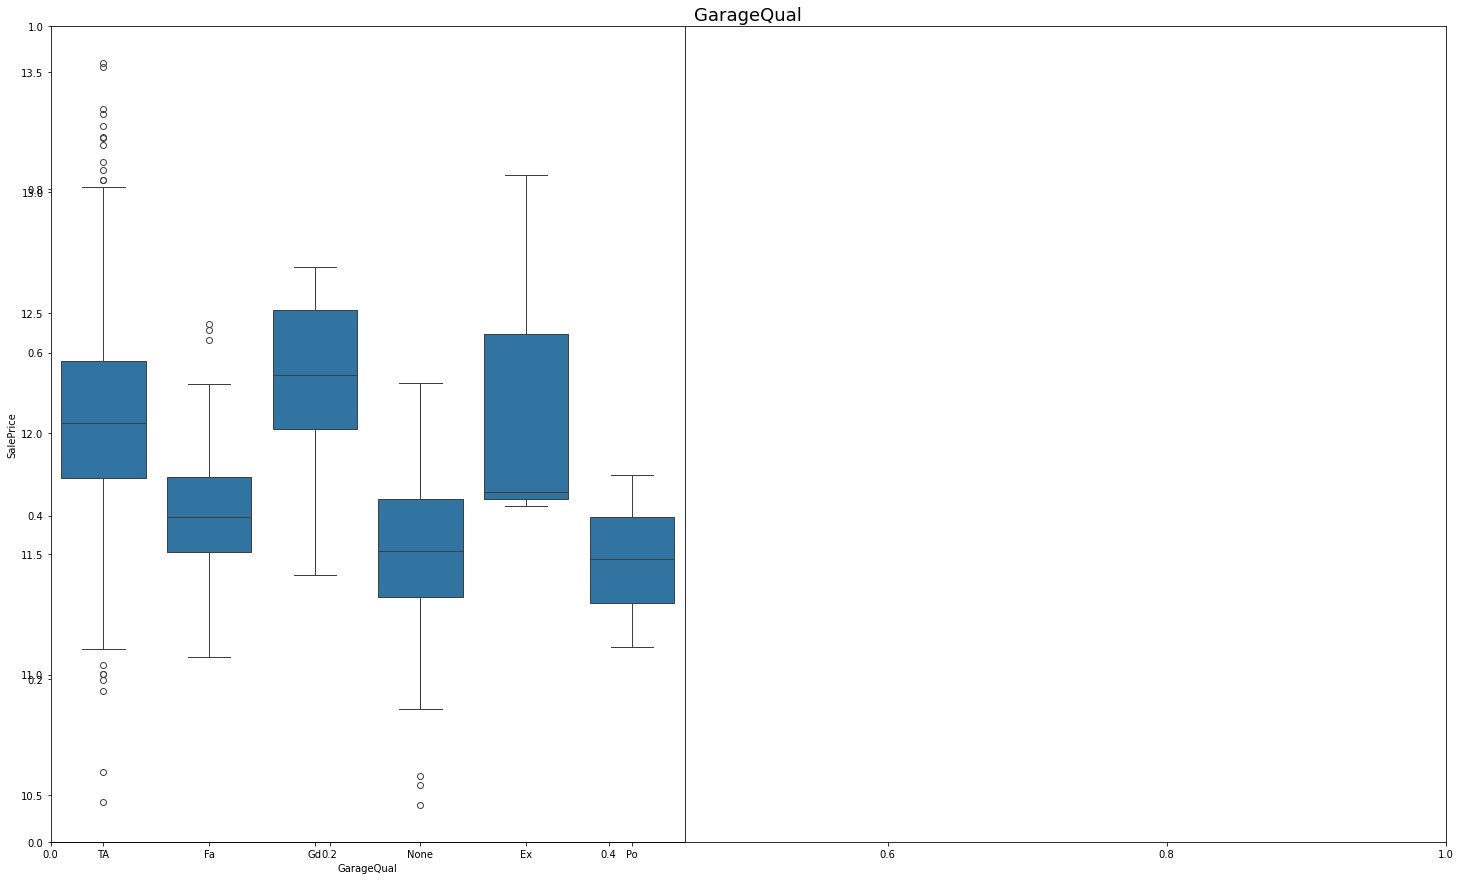

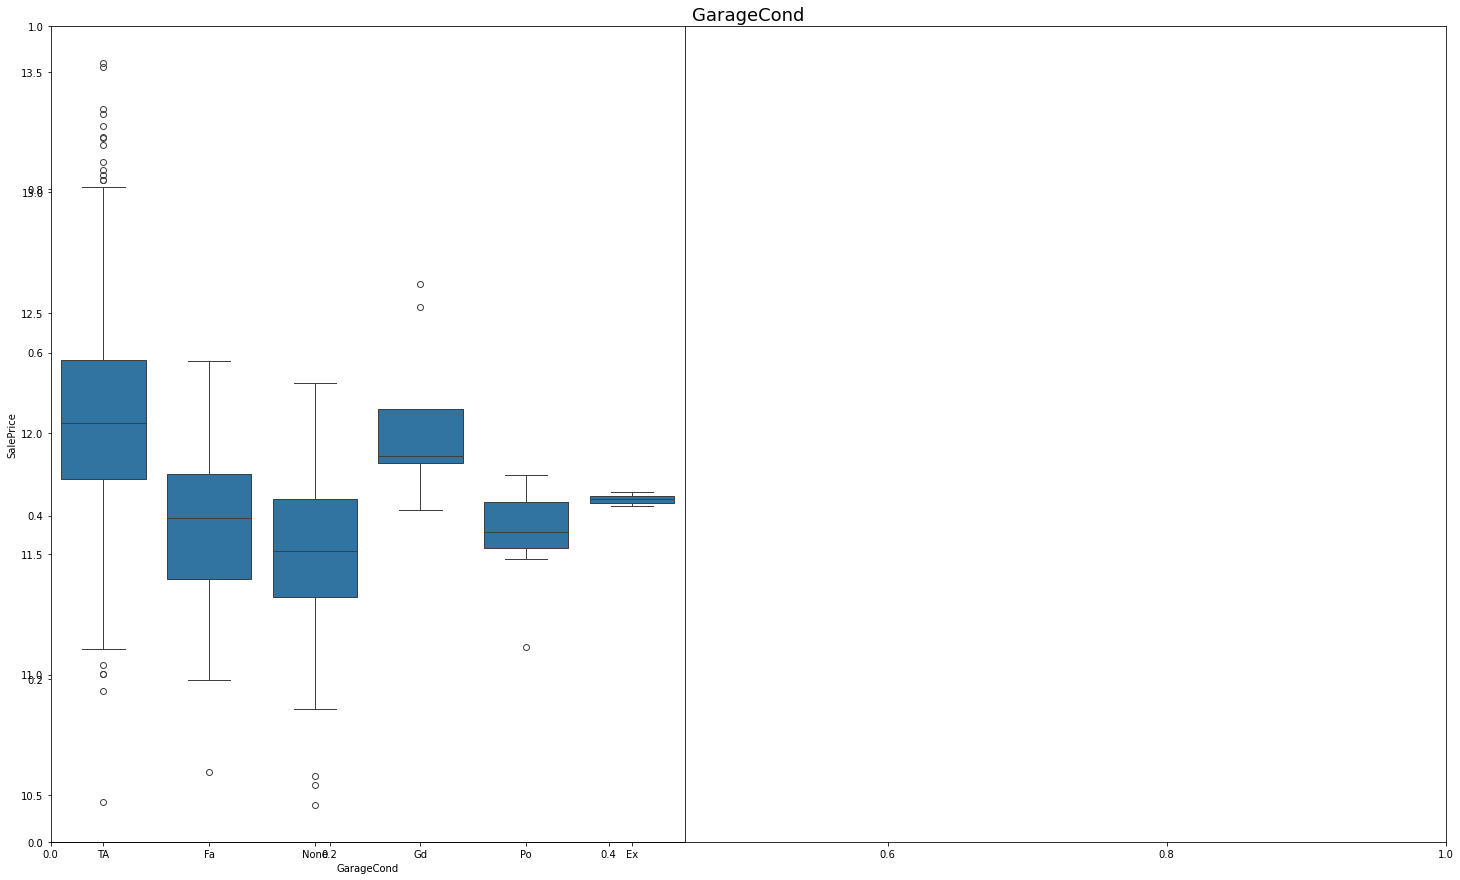

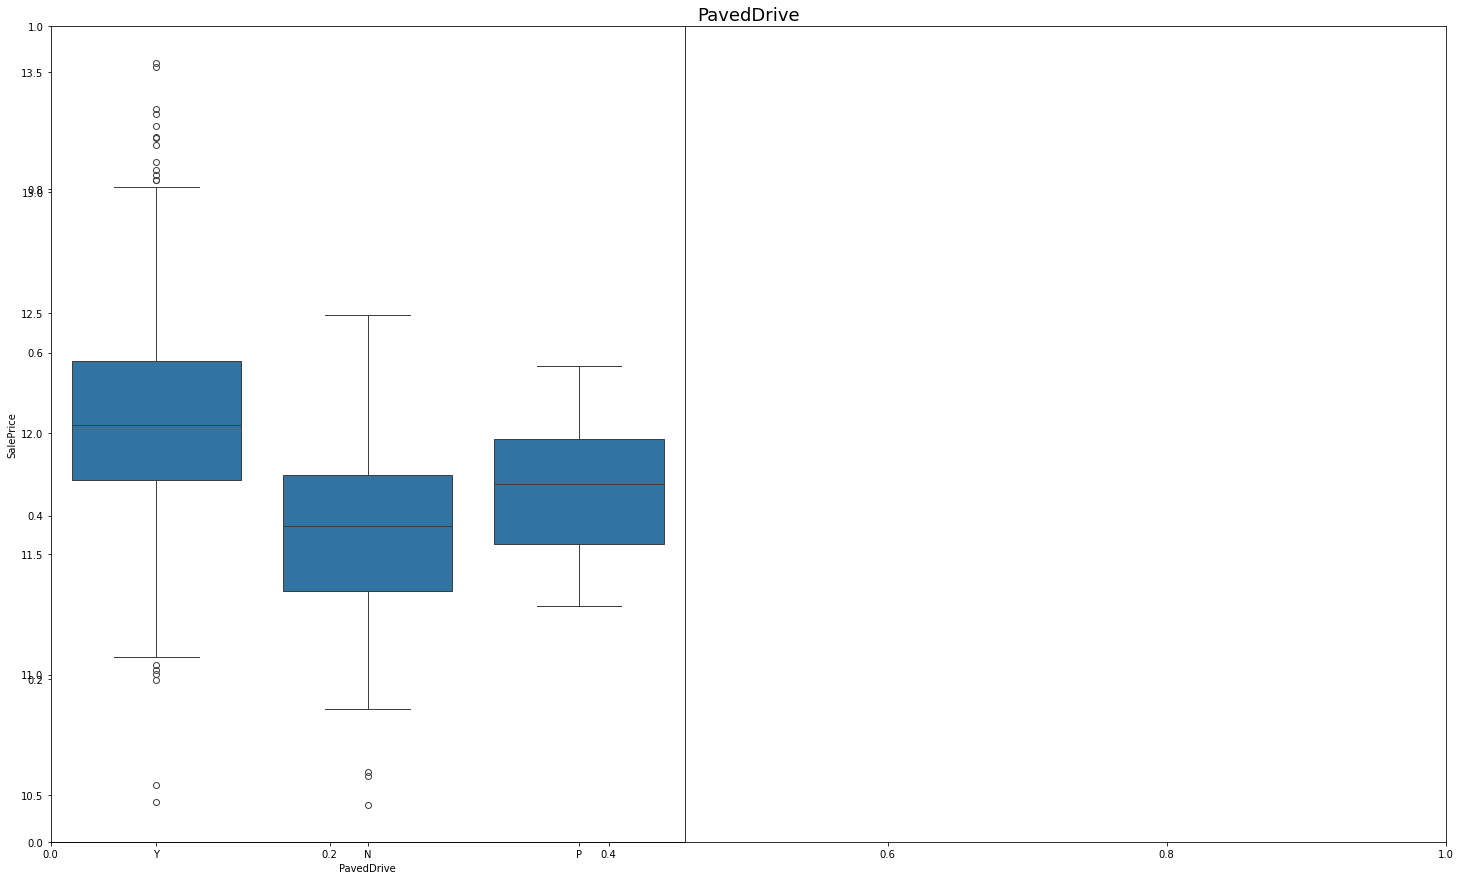

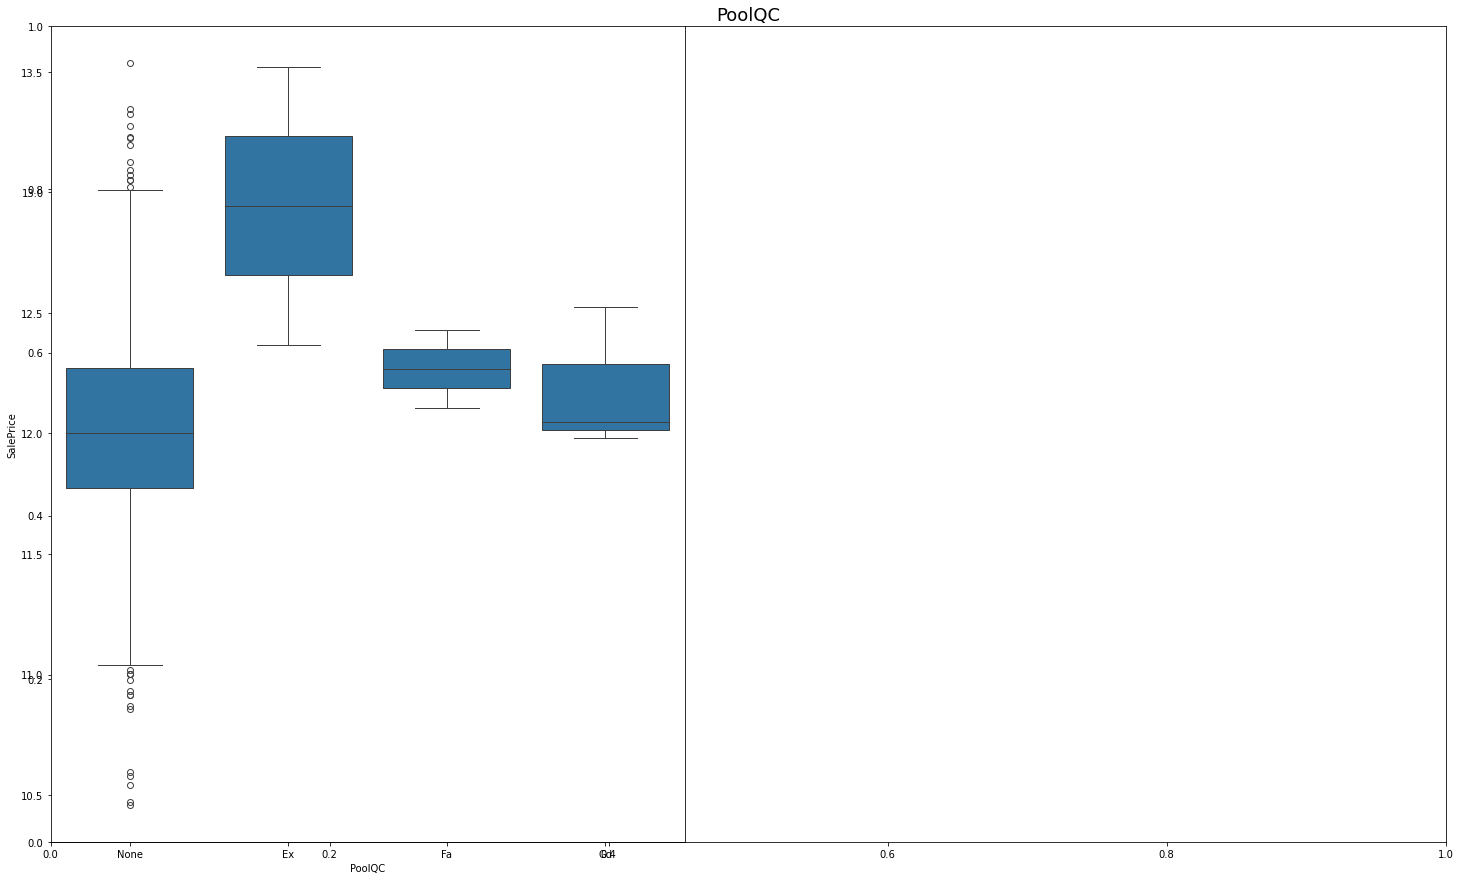

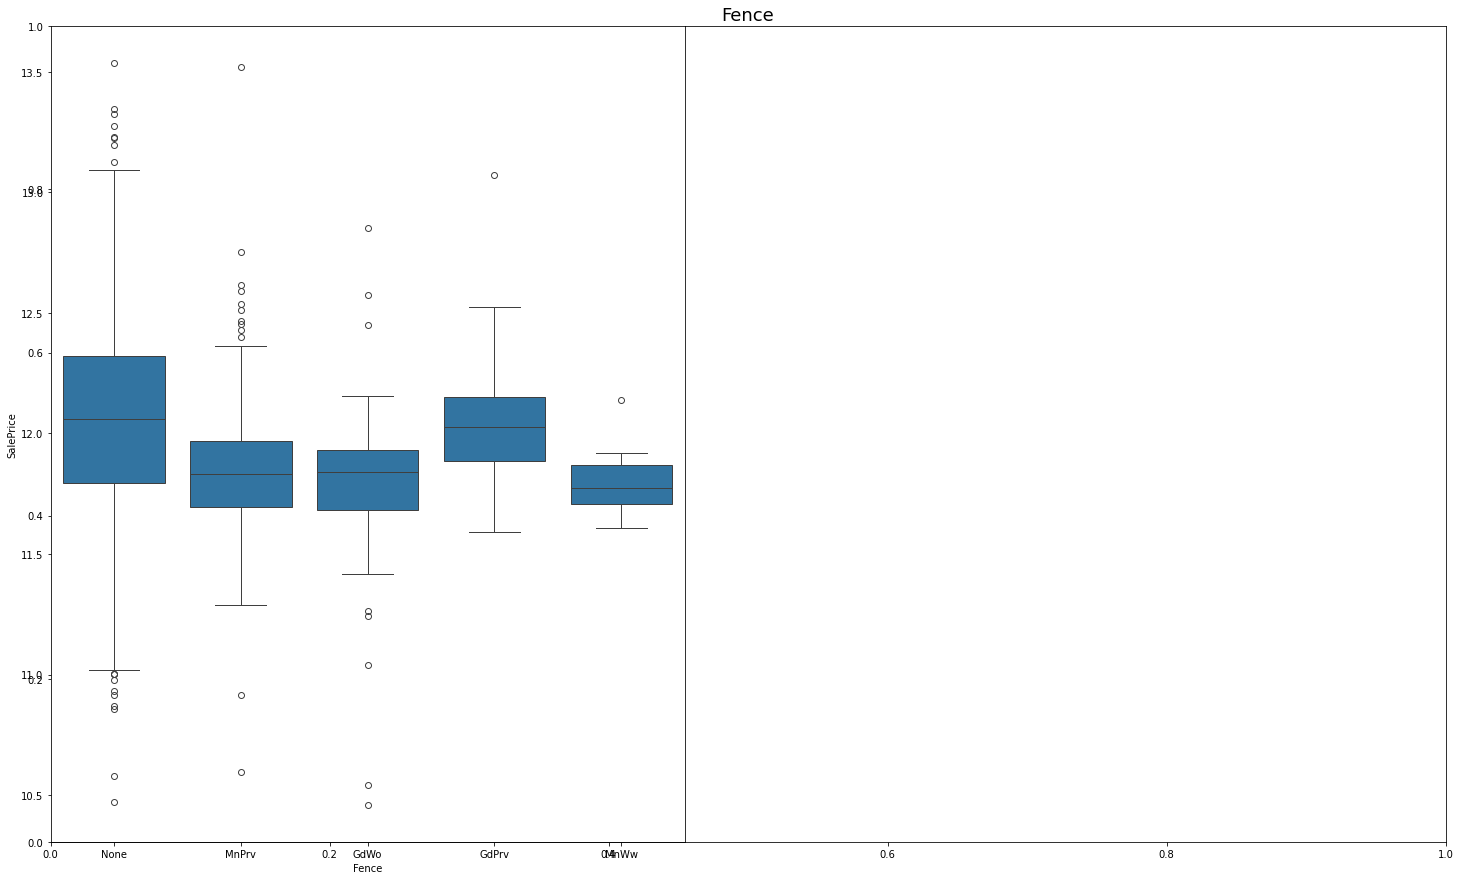

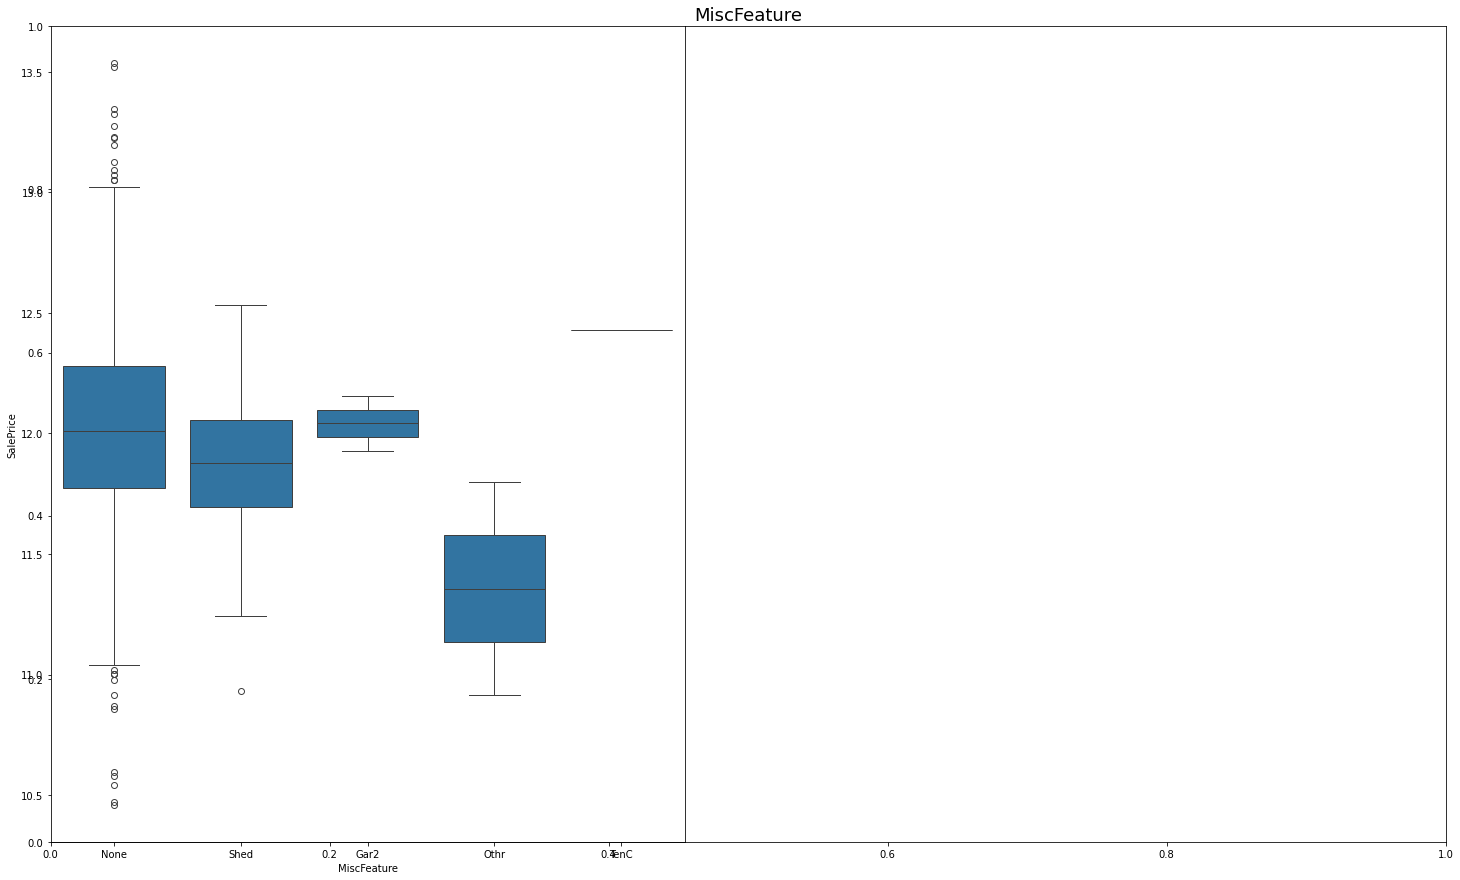

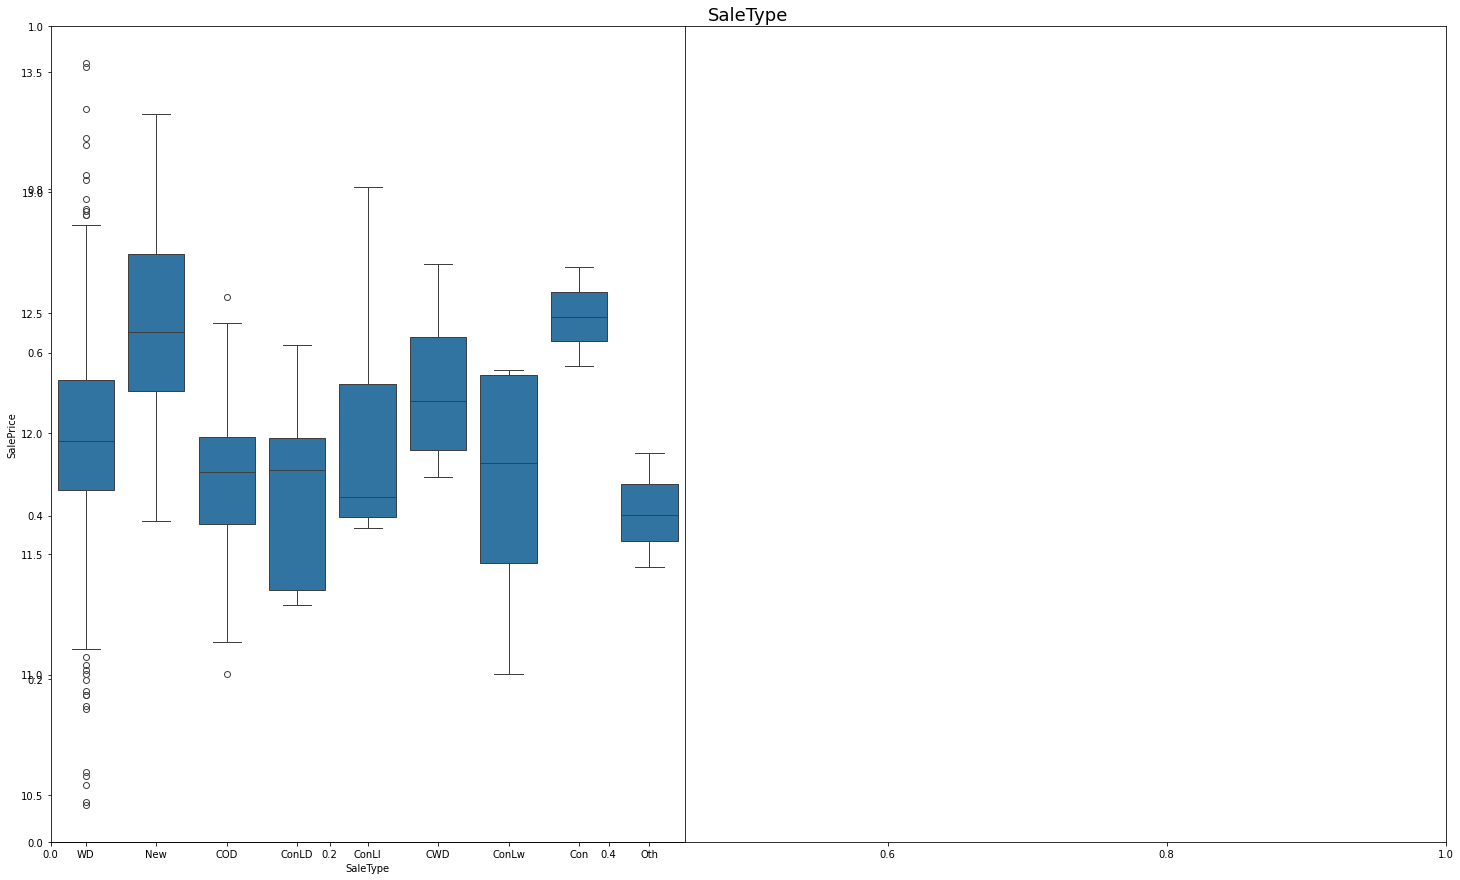

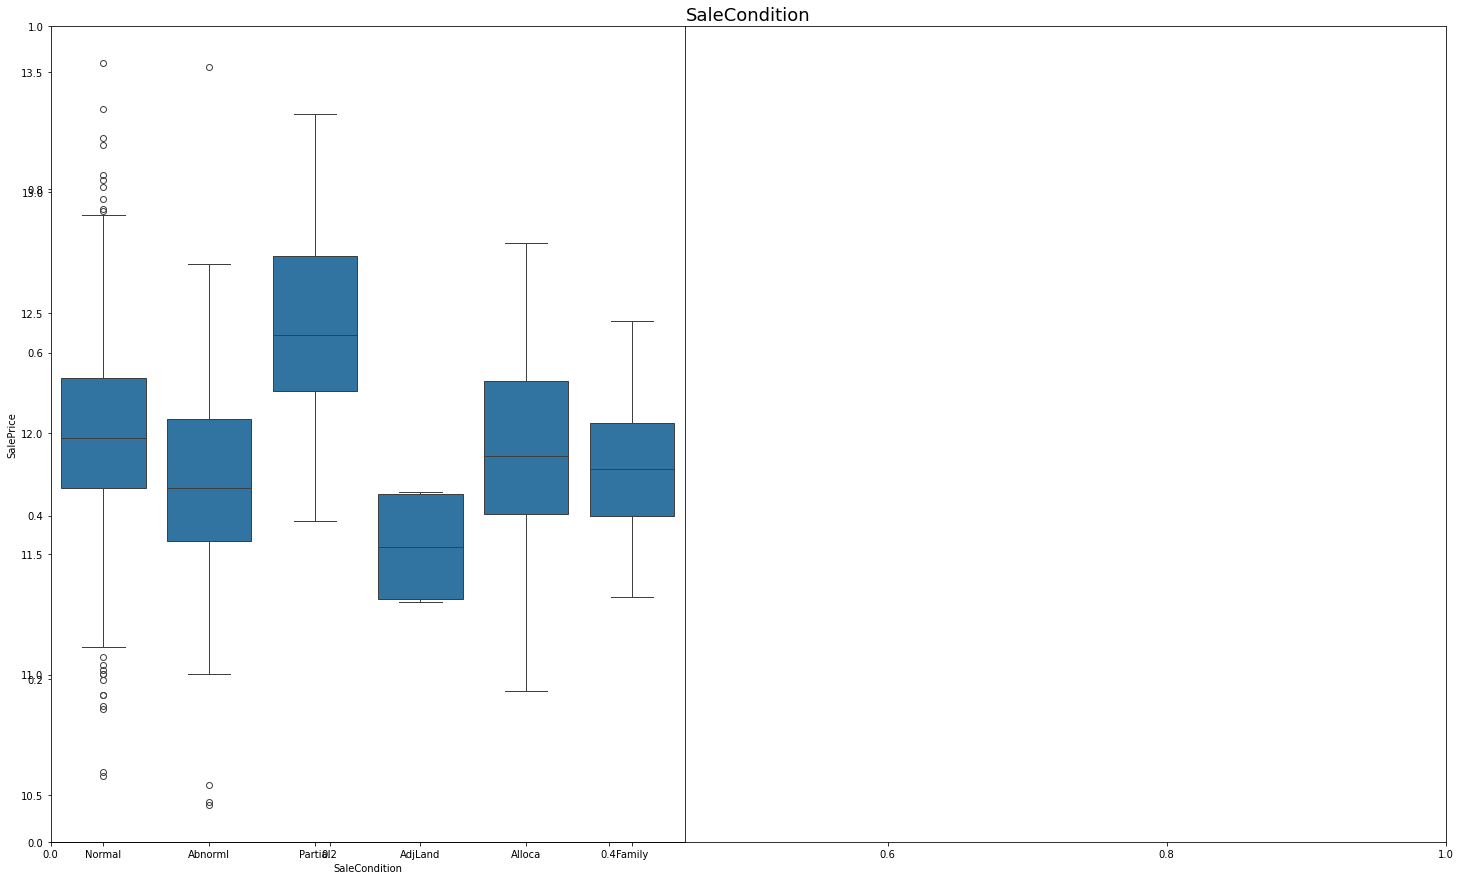

In [20]:
for col in housing_categorial.columns:
    plt.figure(figsize=(25,15))
    plt.title(col, fontdict={'fontsize': 18})
    plt.subplot(1,2,1)
    sns.boxplot(x=housing_categorial[col],y=housing['SalePrice'])
    plt.show()

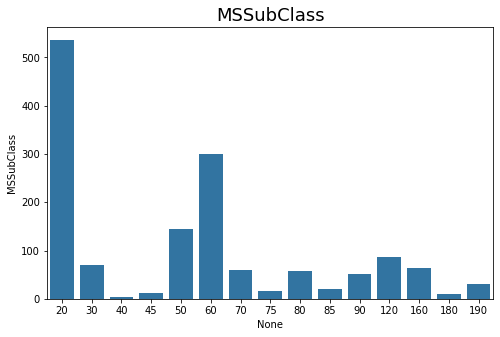

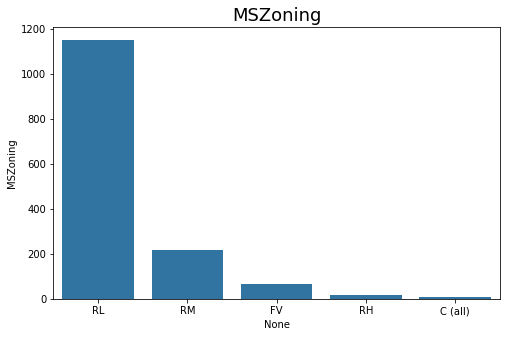

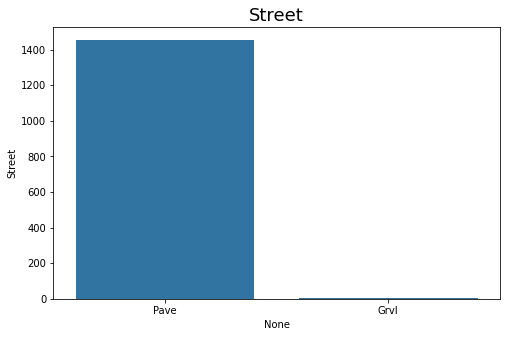

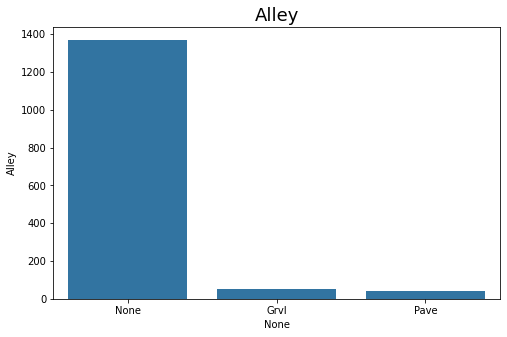

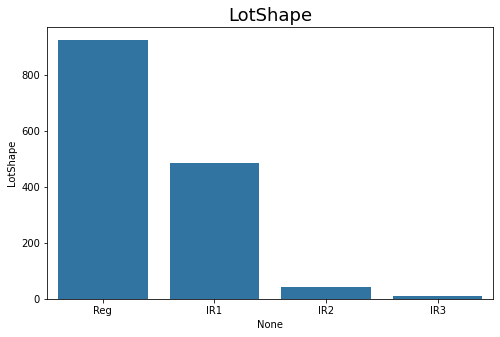

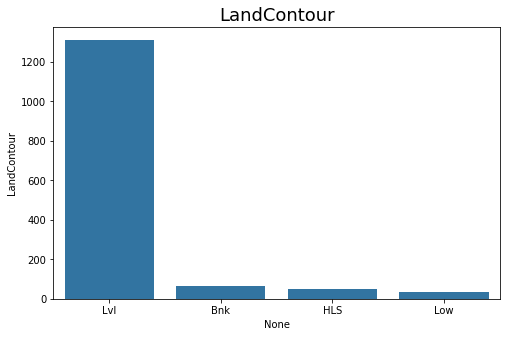

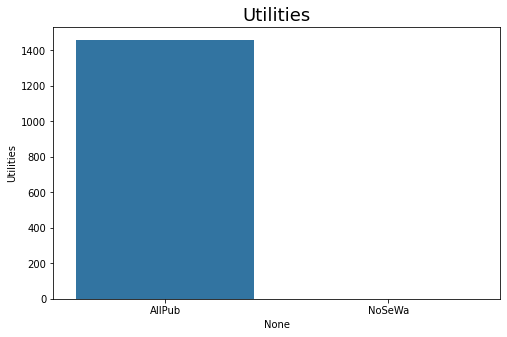

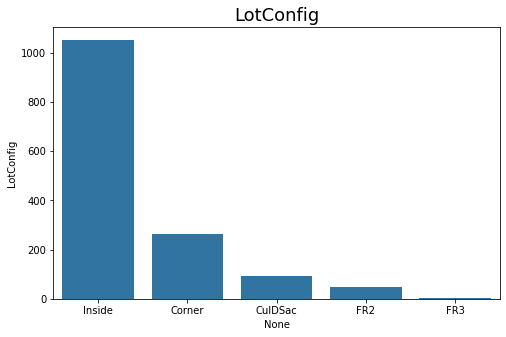

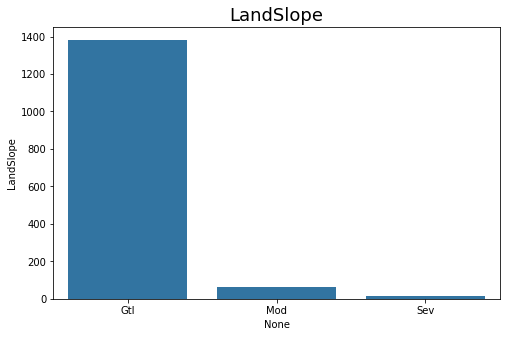

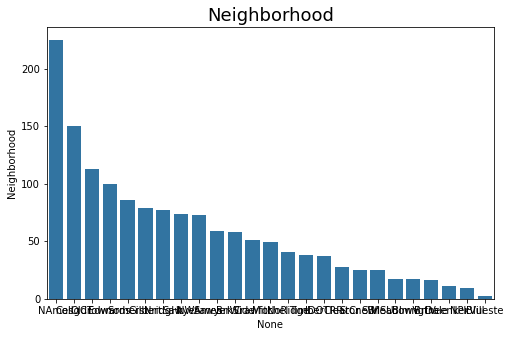

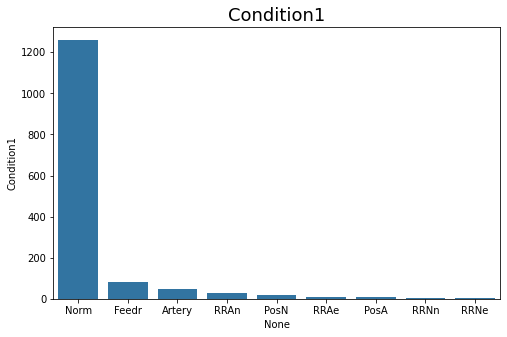

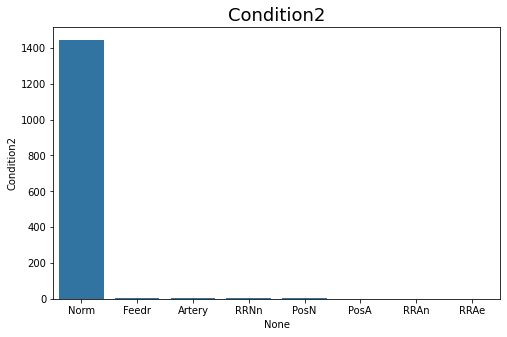

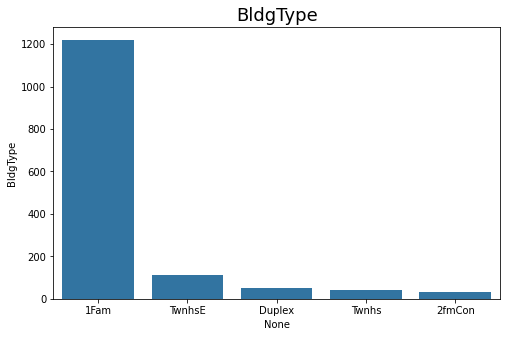

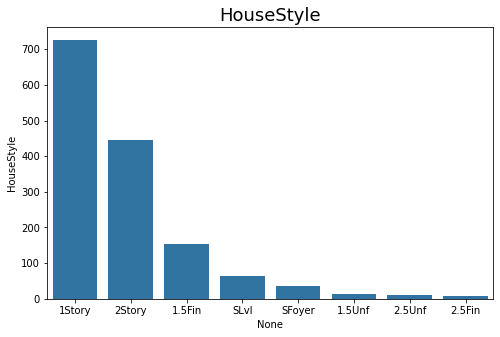

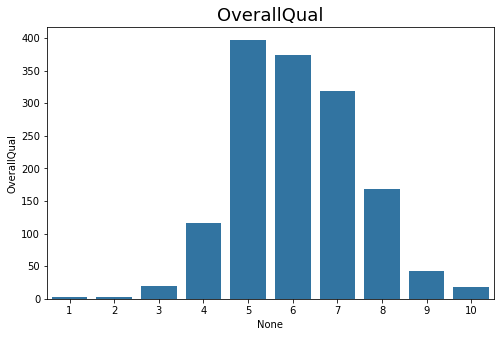

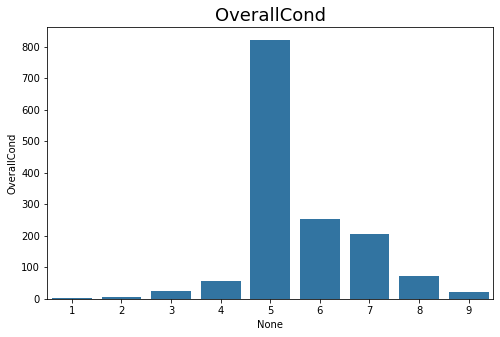

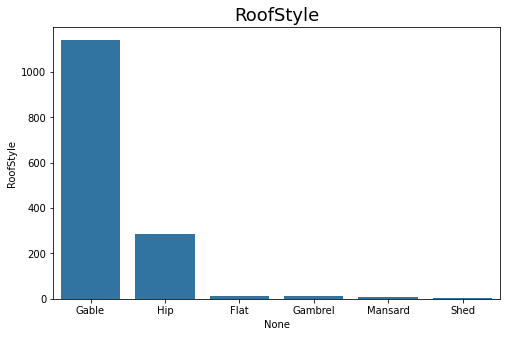

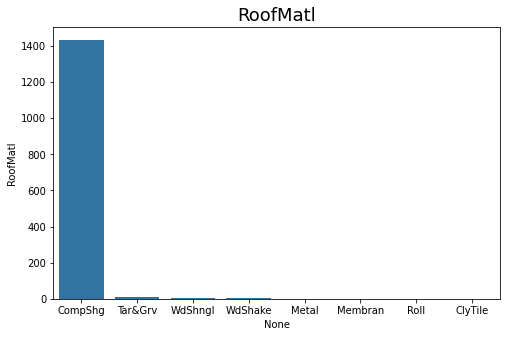

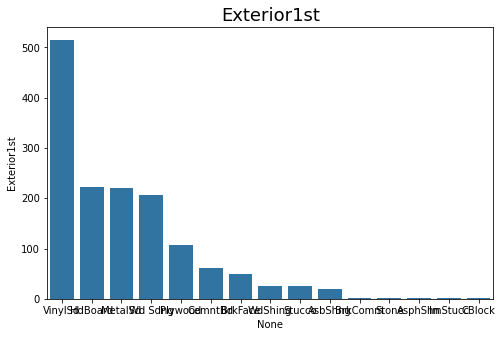

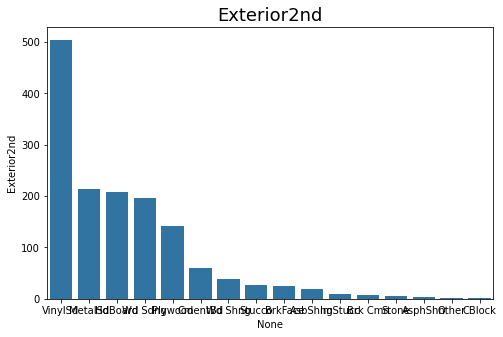

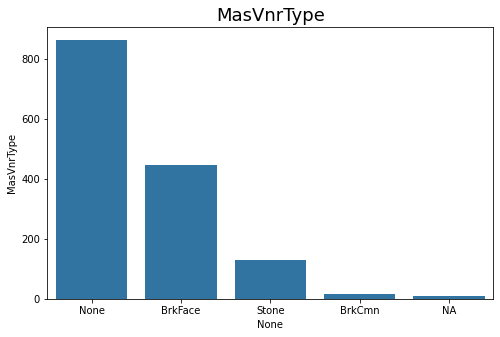

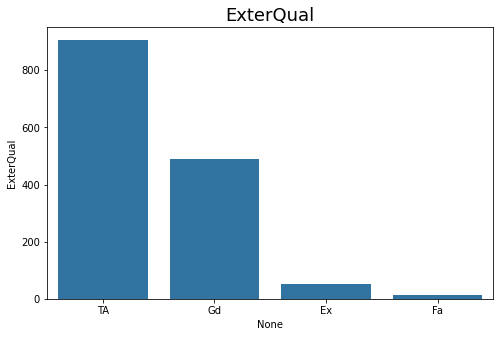

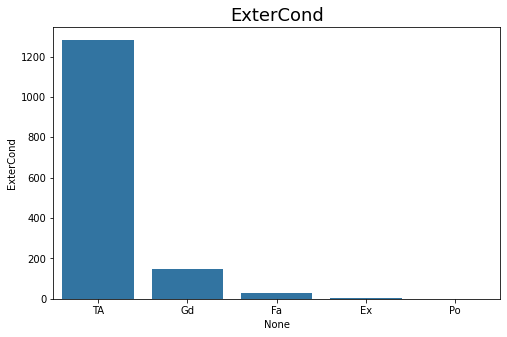

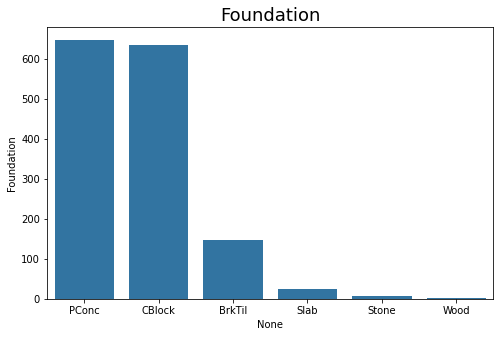

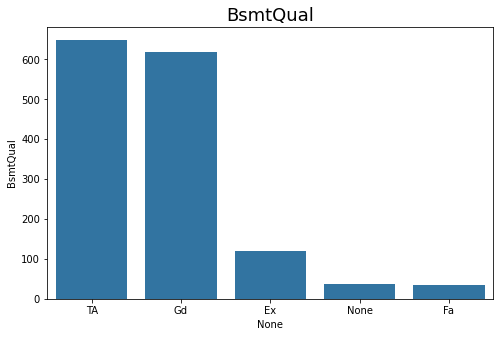

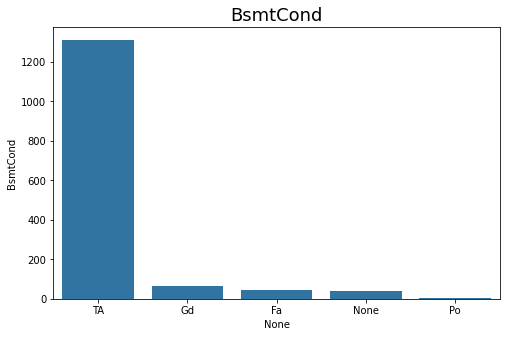

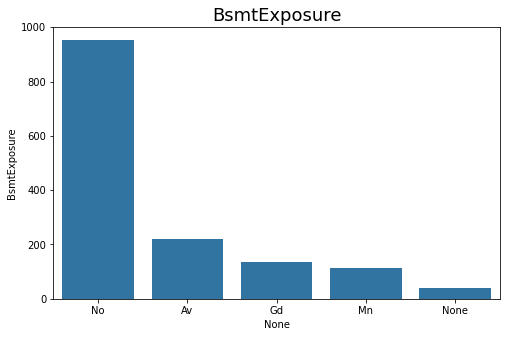

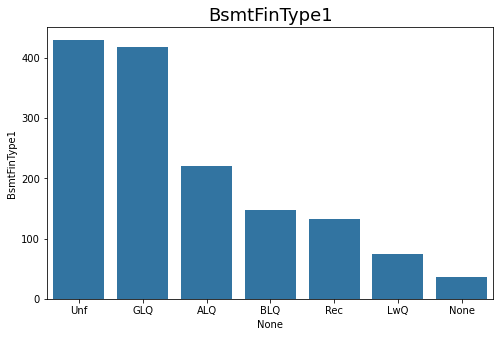

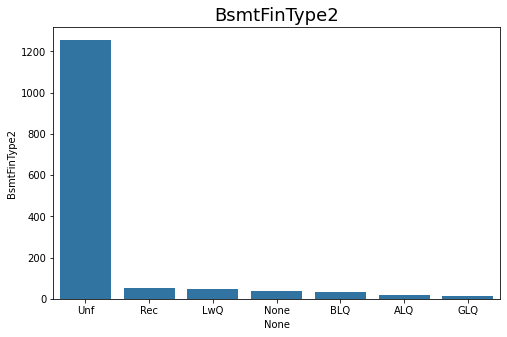

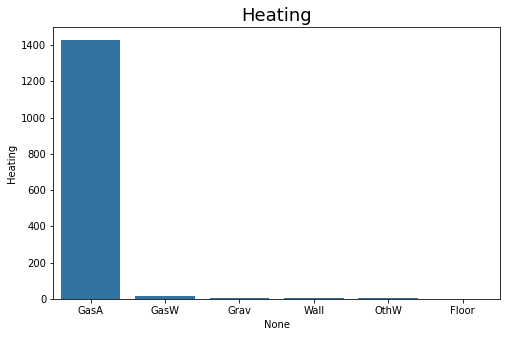

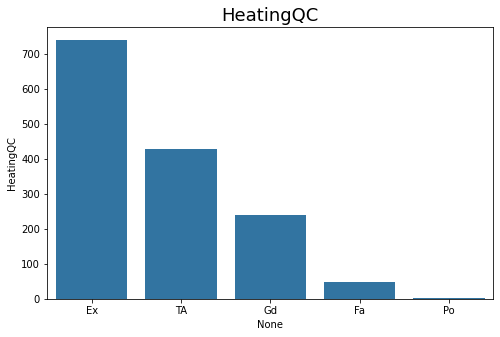

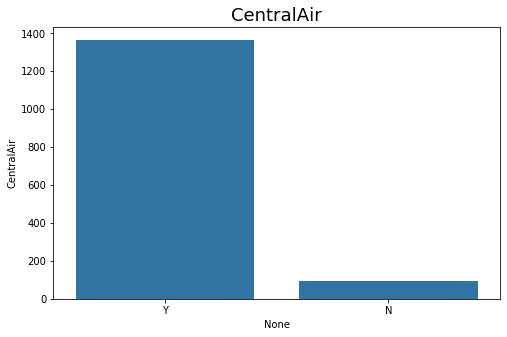

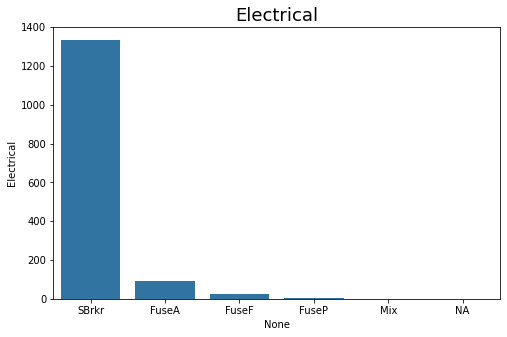

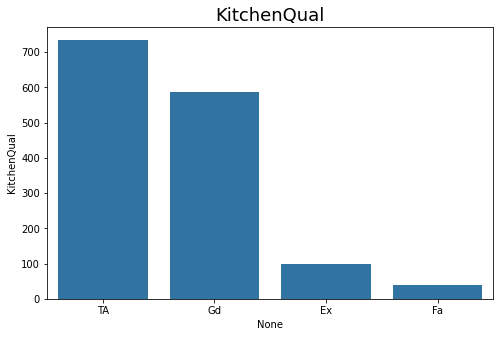

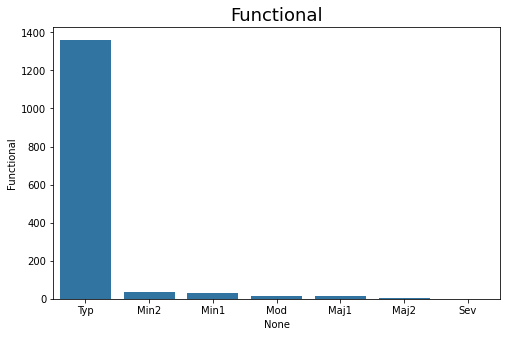

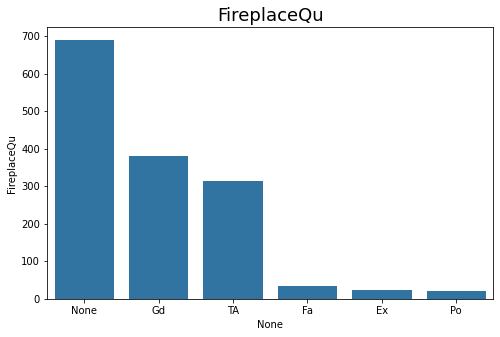

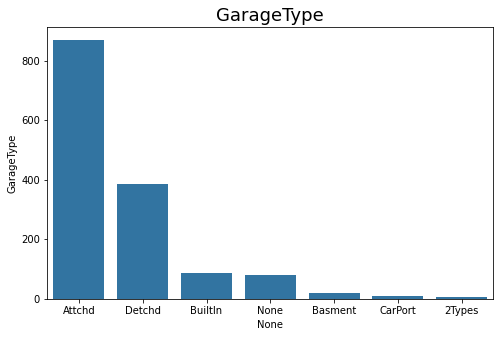

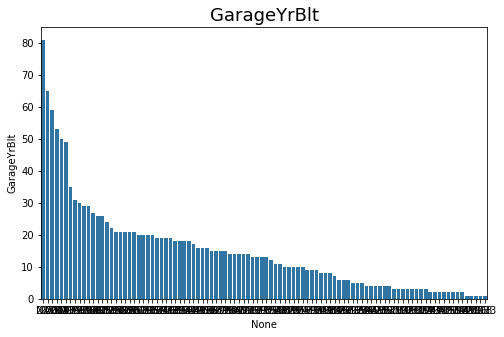

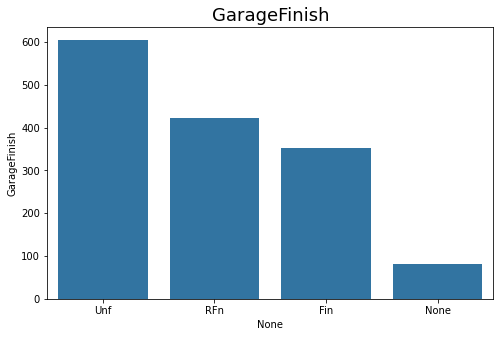

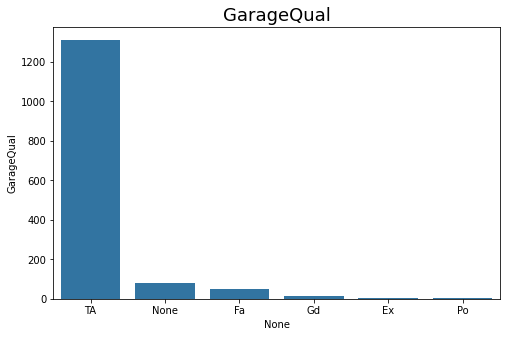

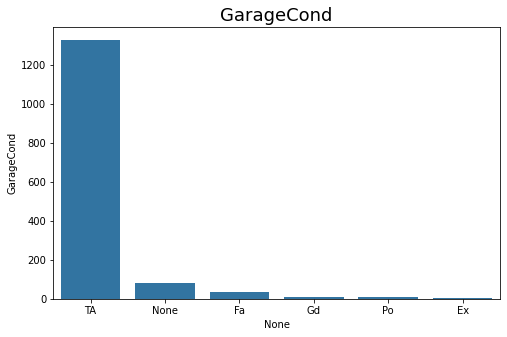

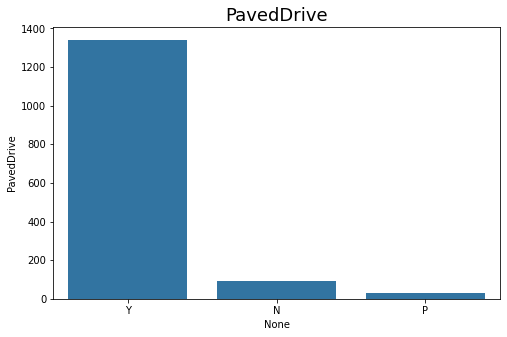

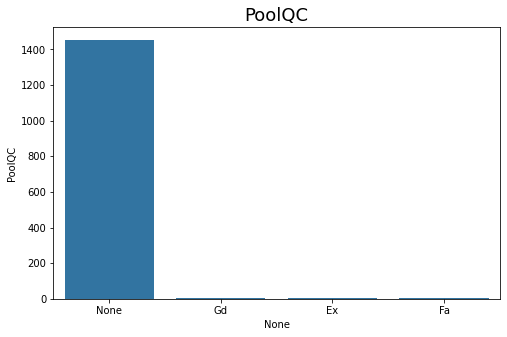

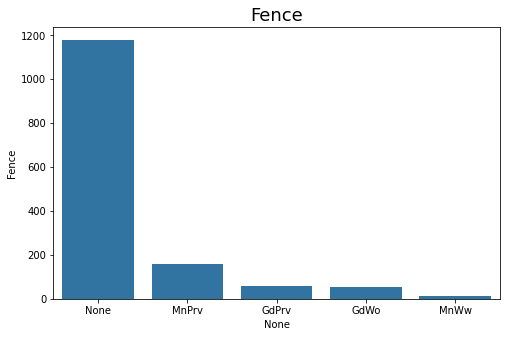

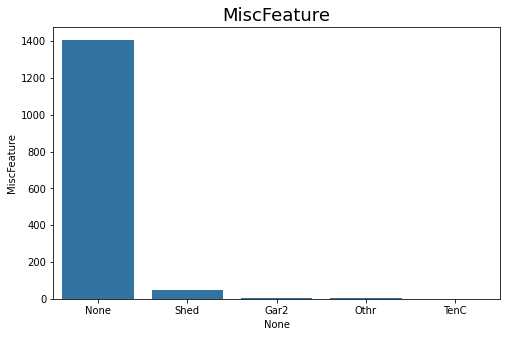

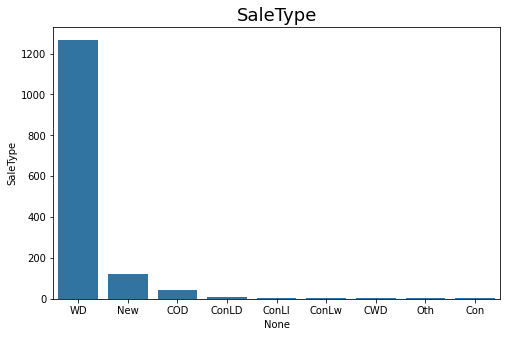

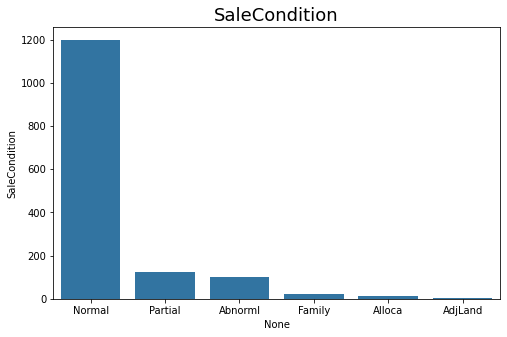

In [21]:
for col in housing_categorial.columns:
    plt.figure(figsize=(8,5))
    plt.title(col, fontdict={'fontsize': 18})
    sns.barplot(x=housing_categorial[col].value_counts().index, y=housing_categorial[col].value_counts())
    plt.show()

From above graph, there is no single unique column and hence no column could be removed

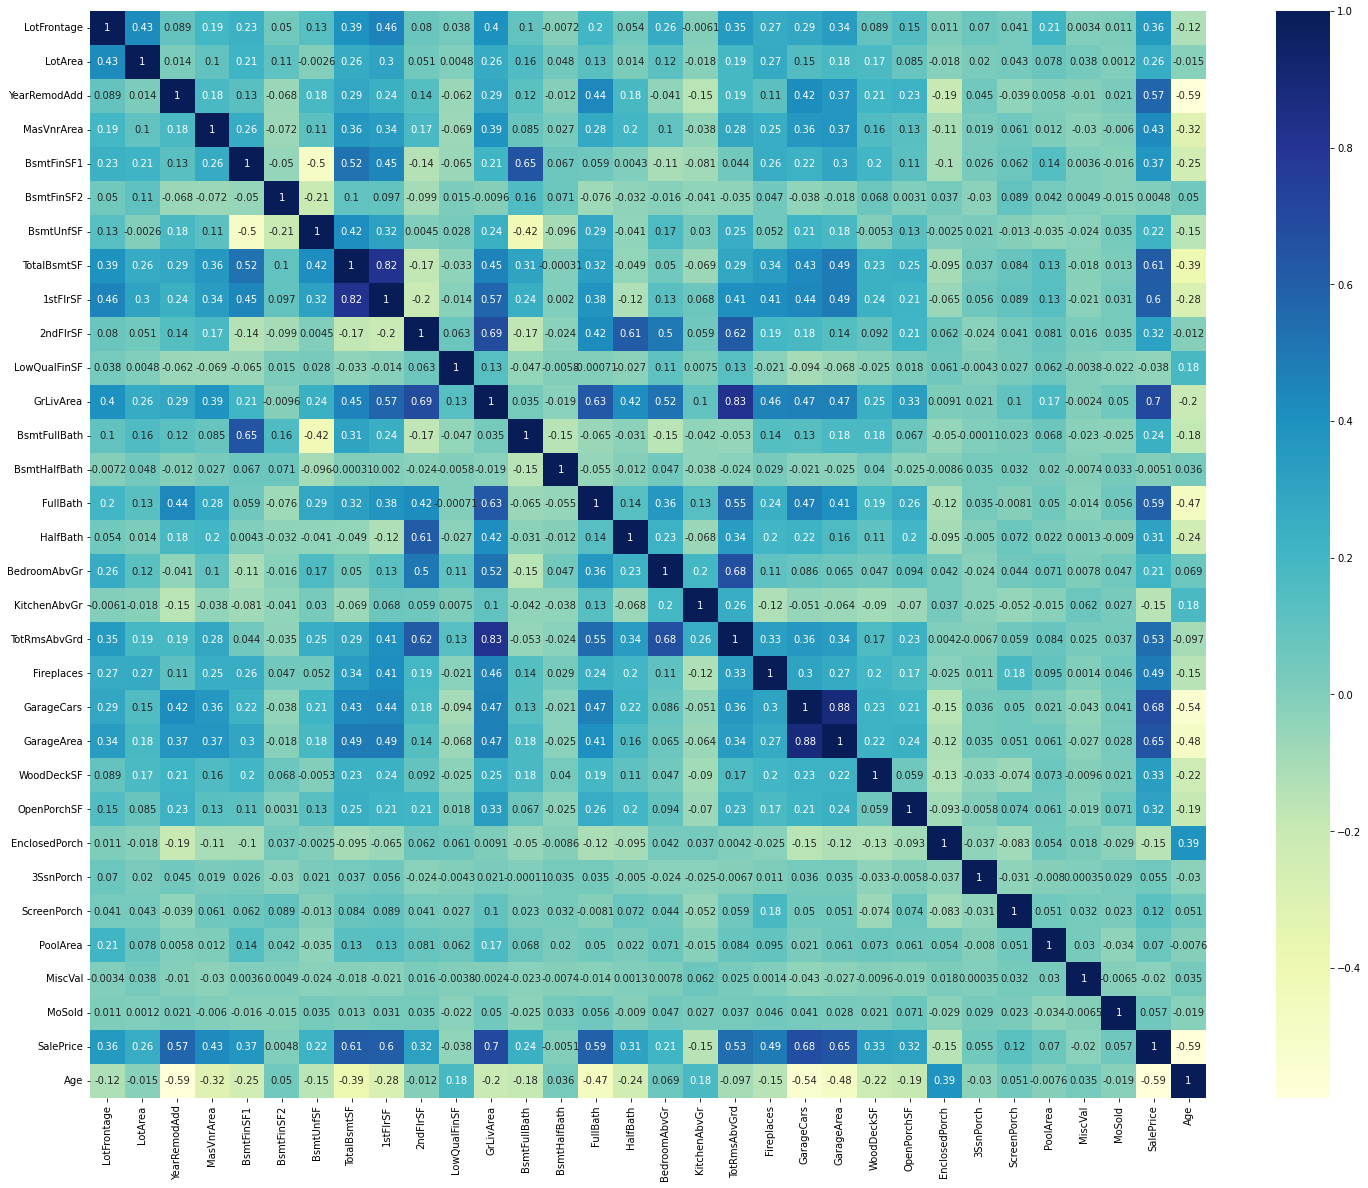

In [22]:
## Check corre;ation between variables and target variabele by plotting heat map
plt.figure(figsize=(25,20))
sns.heatmap(housing_continuous.corr(), annot=True, cmap='YlGnBu');

-  Many columns are highly correlated with each other.
-  Target variable SalePrice is highly correlated with GrLivArea, GarageCars and GarageArea.
-  There is multicollinearity among variables.

## Step 3: Data Preprocessing

##### Mising values treatment

In [23]:
housing.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath     

Only in two columns LotFrontage and MasVnrArea there are missing values, lets replace the missing values by mean value of these respective columns given these are numeric columns.

In [24]:
housing['LotFrontage'].fillna(housing['LotFrontage'].mean(), inplace=True)
housing['MasVnrArea'].fillna(housing['MasVnrArea'].mean(), inplace=True)

In [25]:
housing.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

##### Dummy Variable Creation

In [26]:
housing_num = housing.select_dtypes(include=['int64', 'float64'])
housing_cat = housing.select_dtypes(include='object')

In [27]:
housing_categorial_encoded = pd.get_dummies(housing_cat, drop_first=True)
housing_categorial_encoded.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   Alley_None  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0           1           0             0             0             1   
1           1           0             0             0             1   
2           1           0             0             0             0   
3           1           0             0             0             0   
4           1           0             0             0             0   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  \
0                0                0                1                 0   
1                0                0                1                 0   
2                0                0                1                 0   
3                0                0                1                 0   
4                0                0                1                 0   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              1              0                 0   
2                  0              0              0                 1   
3                  0              0              0                 0   
4                  0              1              0                 0   

   LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
0              0              0                     0                    0   
1              0              0                     0                    0   
2              0              0                     0                    0   
3              0              0                     0                    0   
4              0              0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     1   
1                     0                     0                     0   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     0   

   N

In [28]:
housing_categorial_encoded.shape

(1460, 353)

##### Outlier treatment

In [29]:
## Using 5% for lower bond and 95% for higher bond quantile take out outliers
for col in housing_num.columns:
    housing_num[col][housing_num[col] <= housing_num[col].quantile(0.05)] = housing_num[col].quantile(0.05)
    housing_num[col][housing_num[col] >= housing_num[col].quantile(0.95)] = housing_num[col].quantile(0.95)

In [30]:
housing = pd.concat([housing_num, housing_categorial_encoded], axis=1)
housing.head()

LotFrontage  LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0         65.0   8450.0          2003       196.0         706         0.0   
1         80.0   9600.0          1976         0.0         978         0.0   
2         68.0  11250.0          2002       162.0         486         0.0   
3         60.0   9550.0          1970         0.0         216         0.0   
4         84.0  14260.0          2000       350.0         655         0.0   

   BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0        150        856.0     856.0     854.0             0     1710.0   
1        284       1262.0    1262.0       0.0             0     1262.0   
2        434        920.0     920.0     866.0             0     1786.0   
3        540        756.0     961.0     756.0             0     1717.0   
4        490       1145.0    1145.0    1053.0             0     2198.0   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0             8           0           2       548.0           0         61.0   
1             6           1           2       460.0         298          0.0   
2             6           1           2       608.0           0         42.0   
3             7           1           3       642.0           0         35.0   
4             9           1           3       836.0         192         84.0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  \
0           0.00          0            0         0        0       2   
1           0.00          0            0         0        0       5   
2           0.00          0            0         0        0       9   
3         180.15          0            0         0        0       2   
4           0.00          0            0         0        0      11   

   SalePrice  Age  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
0  12.247694    5              0              0              0              0   
1  12.109011   31              0              0              0              0   
2  12.317167    7              0              0              0              0   
3  11.849398   91              0              0              0              0   
4  12.429216    8              0              0              0              0   

   MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  \
0              1              0              0              0              0   
1              0              0              0              0              0   
2              1              0              0              0              0   
3              0              1              0              0              0   
4              1              0              0              0              0   

   MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  \
0              0               0               0               0   
1              0               0               0               0   
2              0               0               0               0   
3              0               0               0               0   
4              0               0               0               0   

   MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0               0            0            0            1            0   
1               0            0            0            1            0   
2               0            0            0            1            0   
3               0            0 

In [31]:
housing.shape

(1460, 385)

Data is processed and good to start model builing

## Step 4: Data Modeling, Tuning & Evaluation

In [32]:
X = housing.drop(["SalePrice"], axis=1).copy()
X.head()

LotFrontage  LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0         65.0   8450.0          2003       196.0         706         0.0   
1         80.0   9600.0          1976         0.0         978         0.0   
2         68.0  11250.0          2002       162.0         486         0.0   
3         60.0   9550.0          1970         0.0         216         0.0   
4         84.0  14260.0          2000       350.0         655         0.0   

   BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0        150        856.0     856.0     854.0             0     1710.0   
1        284       1262.0    1262.0       0.0             0     1262.0   
2        434        920.0     920.0     866.0             0     1786.0   
3        540        756.0     961.0     756.0             0     1717.0   
4        490       1145.0    1145.0    1053.0             0     2198.0   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0             8           0           2       548.0           0         61.0   
1             6           1           2       460.0         298          0.0   
2             6           1           2       608.0           0         42.0   
3             7           1           3       642.0           0         35.0   
4             9           1           3       836.0         192         84.0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  Age  \
0           0.00          0            0         0        0       2    5   
1           0.00          0            0         0        0       5   31   
2           0.00          0            0         0        0       9    7   
3         180.15          0            0         0        0       2   91   
4           0.00          0            0         0        0      11    8   

   MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            

In [33]:
y = housing["SalePrice"].copy()
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [34]:
## Spilt trian and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, shuffle=True)

In [35]:
print(X_train.shape)
print(y_train.shape)

(1022, 384)
(1022,)


In [36]:
print(X_test.shape)
print(y_test.shape)

(438, 384)
(438,)


In [37]:
scale_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
scale_cols

['LotFrontage',
 'LotArea',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'Age']

In [38]:
X_train.isna().sum()

LotFrontage              0
LotArea                  0
YearRemodAdd             0
MasVnrArea               0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
TotRmsAbvGrd             0
Fireplaces               0
GarageCars               0
GarageArea               0
WoodDeckSF               0
OpenPorchSF              0
EnclosedPorch            0
3SsnPorch                0
ScreenPorch              0
PoolArea                 0
MiscVal                  0
MoSold                   0
Age                      0
MSSubClass_30            0
MSSubClass_40            0
MSSubClass_45            0
MSSubClass_50            0
MSSubClass_60            0
MSSubClass_70            0
M

In [39]:
scaler = StandardScaler()

## Scale the numerical columns 
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])

### Lets build Ridge Regression model


In [40]:
## Create a Ridge Regression model
## we will run a cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

# cross validation

ridgeCV = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
ridgeCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [41]:
ridgeCV.best_params_

{'alpha': 10.0}

In [42]:
ridgeCV.cv_results_

{'mean_fit_time': array([0.05018911, 0.03069744, 0.02552457, 0.03374386, 0.03563232,
        0.02852802, 0.03201442, 0.03609772, 0.03605313, 0.03528123,
        0.03852186, 0.0594625 , 0.03548517, 0.05420389, 0.03270059,
        0.0337801 , 0.03690977, 0.03683815, 0.03767214, 0.04620781,
        0.03601012, 0.03250113, 0.03760061, 0.03600287, 0.03227401,
        0.04051614, 0.02972841, 0.03447642]),
 'std_fit_time': array([0.017172  , 0.0148692 , 0.00094966, 0.00464775, 0.00444577,
        0.00162917, 0.00508189, 0.01027965, 0.00624735, 0.00443748,
        0.01396701, 0.01813528, 0.00590358, 0.02082332, 0.01290999,
        0.00970395, 0.01083981, 0.01421538, 0.00645223, 0.00853746,
        0.00570523, 0.00374146, 0.00776335, 0.00846907, 0.00295002,
        0.017561  , 0.00237441, 0.00596953]),
 'mean_score_time': array([0.00640335, 0.0063168 , 0.00503426, 0.00693121, 0.00710249,
        0.00642571, 0.00611033, 0.00601521, 0.01444125, 0.00759983,
        0.00758085, 0.0170145 , 0.006105

#### Using best alpha  build the Ridge Regression model 

In [43]:
ridge = Ridge(alpha=10)

In [44]:
ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [45]:
ridge.coef_

array([ 6.11717173e-03,  2.38131088e-02,  2.94547221e-02, -1.09209442e-03,
        8.36675608e-03, -9.14669039e-04, -1.46667174e-02,  6.09358040e-02,
        4.95315370e-03,  3.28575447e-02,  0.00000000e+00,  8.93240988e-02,
        8.21815134e-03, -1.89609112e-03,  1.06926660e-02,  7.86063217e-03,
       -2.14035017e-04,  0.00000000e+00, -1.39399074e-03,  1.04484650e-02,
        7.51349853e-03,  2.51508901e-02,  1.14883082e-02,  5.79434489e-03,
        1.75781356e-03,  0.00000000e+00,  5.08184741e-03,  0.00000000e+00,
        0.00000000e+00,  1.64628409e-03, -5.25338570e-02, -3.26682972e-02,
       -9.50654028e-03,  3.62983091e-03,  2.14718865e-03, -1.64101118e-02,
        4.57169958e-02,  2.51595021e-02, -1.06374578e-03,  8.44616926e-03,
       -3.10689975e-02,  5.32708641e-03, -4.13231498e-02, -2.67151118e-02,
       -2.44162919e-02,  3.05596255e-02,  2.35260911e-02,  2.34260307e-02,
       -1.59092484e-02, -5.11303015e-03, -2.63900629e-03,  1.90575225e-02,
        4.08291736e-03, -

In [46]:
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [47]:
## Define a function for getting metrics of the model. WE need this function as we have to call this multiple times

def model_metrics(y_train, y_train_pred, y_test, y_pred):
     
    ## Create a list to save all metrics (will be used in creating a final summary in the end)
    metric = []
    
    ## R-squared of train and test data
    print("R-Squared (Train) =", '%.2f' % r2_score(y_train, y_train_pred))
    metric.append(r2_score(y_train, y_train_pred))
    print("R-Squared (Test) =", '%.2f' % r2_score(y_test, y_pred))
    metric.append(r2_score(y_test, y_pred))
    
    ## Residual sum of squares of train and test data
    rss_train = np.sum(np.square(y_train - y_train_pred))
    metric.append(rss_train)
    rss_test = np.sum(np.square(y_test - y_pred))
    metric.append(rss_test)
    print("RSS (Train) =", '%.2f' % rss_train)
    print("RSS (Test) =", '%.2f' % rss_test)
    
    
    ## Mean Squared Error of train and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    metric.append(mse_train)
    mse_test = mean_squared_error(y_test, y_pred)
    metric.append(mse_test)
    print("MSE (Train) =", '%.2f' % mse_train)
    print("MSE (Test) =", '%.2f' % mse_test)
    

    
    # Root Mean Squared Error for train and test data
    rmse_train = mse_train**0.5
    metric.append(rmse_train)
    rmse_test = mse_test**0.5
    metric.append(rmse_test)
    print("RMSE (Train) =", '%.2f' % rmse_train) 
    print("RMSE (Test) =", '%.2f' % rmse_test) 
    

    return metric


In [48]:
ridgeCV_results= pd.DataFrame(ridgeCV.cv_results_)
ridgeCV_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.050189      0.017172         0.006403        0.001084      0.0001   
1        0.030697      0.014869         0.006317        0.003248       0.001   
2        0.025525      0.000950         0.005034        0.000743        0.01   
3        0.033744      0.004648         0.006931        0.002036        0.05   
4        0.035632      0.004446         0.007102        0.002037         0.1   
5        0.028528      0.001629         0.006426        0.000989         0.2   
6        0.032014      0.005082         0.006110        0.000792         0.3   
7        0.036098      0.010280         0.006015        0.000713         0.4   
8        0.036053      0.006247         0.014441        0.007486         0.5   
9        0.035281      0.004437         0.007600        0.003075         0.6   
10       0.038522      0.013967         0.007581        0.003117         0.7   
11       0.059462      0.018135         0.017015        0.011158         0.8   
12       0.035485      0.005904         0.006105        0.000804         0.9   
13       0.054204      0.020823         0.008761        0.004077         1.0   
14       0.032701      0.012910         0.009109        0.004583         2.0   
15       0.033780      0.009704         0.009004        0.005019         3.0   
16       0.036910      0.010840         0.006107        0.000799         4.0   
17       0.036838      0.014215         0.005315        0.000748         5.0   
18       0.037672      0.006452         0.009430        0.003157         6.0   
19       0.046208      0.008537         0.007030        0.001396         7.0   
20       0.036010      0.005705         0.006507        0.001338         8.0   
21       0.032501      0.003741         0.005935        0.000498         9.0   
22       0.037601      0.007763         0.006406        0.000490        10.0   
23       0.036003      0.008469         0.006765        0.000471          20   
24       0.032274      0.002950         0.006395        0.001635          50   
25       0.040516      0.017561         0.005485        0.001039         100   
26       0.029728      0.002374         0.010324        0.009878         500   
27       0.034476      0.005970         0.006472        0.002298        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.096166          -0.092551   
1    {'alpha': 0.001}          -0.095888          -0.092383   
2     {'alpha': 0.01}          -0.094428          -0.091763   
3     {'alpha': 0.05}          -0.091375          -0.090297   
4      {'alpha': 0.1}          -0.088897          -0.089055   
5      {'alpha': 0.2}          -0.086108          -0.087446   
6      {'alpha': 0.3}          -0.084190          -0.086353   
7      {'alpha': 0.4}          -0.082705          -0.085489   
8      {'alpha': 0.5}          -0.081576          -0.084797   
9      {'alpha': 0.6}          -0.080683          -0.084257   
10     {'alpha': 0.7}          -0.079921          -0.083779   
11     {'alpha': 0.8}          -0.079263          -0.083355   
12     {'alpha': 0.9}          -0.078687          -0.082967   
13     {'alpha': 1.0}          -0.078180          -0.082610   
14     {'alpha': 2.0}          -0.074612          -0.080477   
15     {'alpha': 3.0}          -0.072700          -0.079258   
16     {'alpha': 4.0}          -0.071376          -0.078428   
17     {'alpha': 5.0}          -0.070493          -0.077986   
18     {'alpha': 6.0}          -0.069948          -0.077735   
19     {'alpha': 7.0}          -0.069696          -0.077568   
20     {'alpha': 8.0}          -0.069590          -0.077514   
21     {'alpha': 9.0}          -0.069501          -0.077510   
22    {'alpha': 10.0}          -0.069443          -0.077522   
23      {'alpha': 20}          -0.069716          -0.078553   
24      {'alpha': 50}          -0.072441          -0.082055   
25     {'alpha': 100}          -0.075604     

In [49]:
ridge_metrics = model_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.95
R-Squared (Test) = 0.90
RSS (Train) = 6.32
RSS (Test) = 5.57
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.08
RMSE (Test) = 0.11


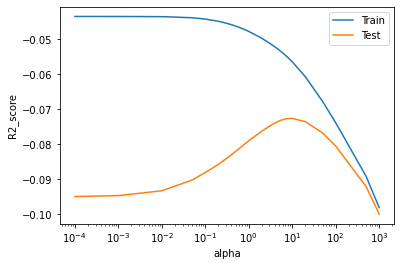

In [50]:
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_train_score'], label='Train')
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

### Lets build Lasso Regression model and then compare both

In [51]:
## Create a Lasso Regression model
## we will run a cross validation on a list of alphas to find the optimum value of alpha


params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [52]:
lassoCV.best_params_

{'alpha': 0.001}

In [53]:
lassoCV.cv_results_

{'mean_fit_time': array([0.21675029, 0.05776544, 0.03715596, 0.0329957 , 0.02970228,
        0.02367773, 0.02584581, 0.02184992, 0.02362599, 0.02747993,
        0.02710185, 0.02673874, 0.03456302, 0.03173828, 0.03084393,
        0.03065448, 0.02458549, 0.02635283, 0.02561302, 0.0373508 ,
        0.02596822, 0.02392559, 0.02579846, 0.02043147, 0.04454136,
        0.03034229, 0.02237587, 0.02312918]),
 'std_fit_time': array([0.07242742, 0.00544084, 0.00659343, 0.00359619, 0.00466916,
        0.00181829, 0.00155974, 0.00232183, 0.00229367, 0.00552438,
        0.00665459, 0.00371068, 0.02061459, 0.00897482, 0.01013876,
        0.01441828, 0.0062413 , 0.00680743, 0.0076457 , 0.01936053,
        0.01086982, 0.00642071, 0.00204015, 0.00129547, 0.00729777,
        0.01257927, 0.00111504, 0.00240844]),
 'mean_score_time': array([0.00834417, 0.00742068, 0.0080667 , 0.00639048, 0.00708566,
        0.00872998, 0.00744324, 0.00622616, 0.00781288, 0.00867143,
        0.00598211, 0.00763035, 0.008448

#### Using best alpha  build the Lasso regression model 

In [54]:
lasso = Lasso(alpha=0.001)

In [55]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [56]:
lasso.coef_

array([ 4.14418951e-03,  2.07851757e-02,  3.29153246e-02,  1.55590545e-03,
        2.15567613e-02,  0.00000000e+00, -2.25619124e-03,  5.43839453e-02,
       -0.00000000e+00,  1.26727858e-02,  0.00000000e+00,  1.05150137e-01,
        9.87642544e-03,  0.00000000e+00,  4.97887422e-03,  8.37676161e-03,
       -4.58753438e-04,  0.00000000e+00, -8.42393552e-05,  1.61480892e-02,
        8.31778622e-03,  2.43035343e-02,  1.20860463e-02,  5.04751025e-03,
        1.31120770e-03,  0.00000000e+00,  4.61245229e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -5.69818428e-02, -1.01378368e-03,
       -0.00000000e+00,  0.00000000e+00,  3.55884705e-03, -0.00000000e+00,
        3.50499964e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -2.95334350e-02,  0.00000000e+00, -2.19526659e-02, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -3.87610873e-02, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

In [57]:
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [58]:
lassoCV_results= pd.DataFrame(lassoCV.cv_results_)
lassoCV_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.216750      0.072427         0.008344        0.002417      0.0001   
1        0.057765      0.005441         0.007421        0.001509       0.001   
2        0.037156      0.006593         0.008067        0.003398        0.01   
3        0.032996      0.003596         0.006390        0.000739        0.05   
4        0.029702      0.004669         0.007086        0.002092         0.1   
5        0.023678      0.001818         0.008730        0.003081         0.2   
6        0.025846      0.001560         0.007443        0.002075         0.3   
7        0.021850      0.002322         0.006226        0.000689         0.4   
8        0.023626      0.002294         0.007813        0.000610         0.5   
9        0.027480      0.005524         0.008671        0.002645         0.6   
10       0.027102      0.006655         0.005982        0.001108         0.7   
11       0.026739      0.003711         0.007630        0.001897         0.8   
12       0.034563      0.020615         0.008449        0.004682         0.9   
13       0.031738      0.008975         0.009904        0.005078         1.0   
14       0.030844      0.010139         0.007368        0.002887         2.0   
15       0.030654      0.014418         0.005914        0.001392         3.0   
16       0.024585      0.006241         0.008649        0.002304         4.0   
17       0.026353      0.006807         0.010250        0.005031         5.0   
18       0.025613      0.007646         0.006021        0.000838         6.0   
19       0.037351      0.019361         0.009233        0.003877         7.0   
20       0.025968      0.010870         0.009691        0.007207         8.0   
21       0.023926      0.006421         0.006140        0.000366         9.0   
22       0.025798      0.002040         0.007598        0.003680        10.0   
23       0.020431      0.001295         0.006272        0.000935          20   
24       0.044541      0.007298         0.009396        0.001942          50   
25       0.030342      0.012579         0.008222        0.002742         100   
26       0.022376      0.001115         0.007155        0.000832         500   
27       0.023129      0.002408         0.009849        0.002964        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.074525          -0.079976   
1    {'alpha': 0.001}          -0.068773          -0.080123   
2     {'alpha': 0.01}          -0.089455          -0.102388   
3     {'alpha': 0.05}          -0.115759          -0.121209   
4      {'alpha': 0.1}          -0.161804          -0.161410   
5      {'alpha': 0.2}          -0.263441          -0.257848   
6      {'alpha': 0.3}          -0.301774          -0.292996   
7      {'alpha': 0.4}          -0.301774          -0.292996   
8      {'alpha': 0.5}          -0.301774          -0.292996   
9      {'alpha': 0.6}          -0.301774          -0.292996   
10     {'alpha': 0.7}          -0.301774          -0.292996   
11     {'alpha': 0.8}          -0.301774          -0.292996   
12     {'alpha': 0.9}          -0.301774          -0.292996   
13     {'alpha': 1.0}          -0.301774          -0.292996   
14     {'alpha': 2.0}          -0.301774          -0.292996   
15     {'alpha': 3.0}          -0.301774          -0.292996   
16     {'alpha': 4.0}          -0.301774          -0.292996   
17     {'alpha': 5.0}          -0.301774          -0.292996   
18     {'alpha': 6.0}          -0.301774          -0.292996   
19     {'alpha': 7.0}          -0.301774          -0.292996   
20     {'alpha': 8.0}          -0.301774          -0.292996   
21     {'alpha': 9.0}          -0.301774          -0.292996   
22    {'alpha': 10.0}          -0.301774          -0.292996   
23      {'alpha': 20}          -0.301774          -0.292996   
24      {'alpha': 50}          -0.301774          -0.292996   
25     {'alpha': 100}          -0.301774     

In [59]:
lasso_metrics = model_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.93
R-Squared (Test) = 0.89
RSS (Train) = 8.65
RSS (Test) = 5.77
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.09
RMSE (Test) = 0.11


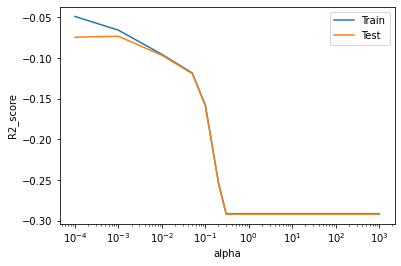

In [60]:
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_train_score'], label='Train')
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

## Comparing Ridge and Lasso models..

#### Ridge Regression:
R-Squared (Train) = 0.95
R-Squared (Test) = 0.90
RSS (Train) = 6.32
RSS (Test) = 5.57
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.08
RMSE (Test) = 0.1

#### Lasso Regression:
R-Squared (Train) = 0.93
R-Squared (Test) = 0.89
RSS (Train) = 8.65
RSS (Test) = 5.77
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.09
RMSE (Test) = 0.11

R-Squared (Test) of both models are almost same. 

#### Lets get coefficents from both models

In [61]:
Coefs = pd.DataFrame(index=X.columns)
Coefs.rows = X.columns
Coefs

Empty DataFrame
Columns: []
Index: [LotFrontage, LotArea, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, Age, MSSubClass_30, MSSubClass_40, MSSubClass_45, MSSubClass_50, MSSubClass_60, MSSubClass_70, MSSubClass_75, MSSubClass_80, MSSubClass_85, MSSubClass_90, MSSubClass_120, MSSubClass_160, MSSubClass_180, MSSubClass_190, MSZoning_FV, MSZoning_RH, MSZoning_RL, MSZoning_RM, Street_Pave, Alley_None, Alley_Pave, LotShape_IR2, LotShape_IR3, LotShape_Reg, LandContour_HLS, LandContour_Low, LandContour_Lvl, Utilities_NoSeWa, LotConfig_CulDSac, LotConfig_FR2, LotConfig_FR3, LotConfig_Inside, LandSlope_Mod, LandSlope_Sev, Neighborhood_Blueste, Neighborhood_BrDale, Neighborhood_BrkSide, Neighborhood_ClearCr, Neighborhood_CollgCr, Neighborhood_Crawfor, Neighborhood_Edwards, Neighborhood_Gilbert, Neighborhood_IDOTRR, Neighborhood_MeadowV, Neighborhood_Mitchel, Neighborhood_NAmes, Neighborhood_NPkVill, Neighborhood_NWAmes, Neighborhood_NoRidge, Neighborhood_NridgHt, Neighborhood_OldTown, Neighborhood_SWISU, Neighborhood_Sawyer, Neighborhood_SawyerW, Neighborhood_Somerst, Neighborhood_StoneBr, Neighborhood_Timber, Neighborhood_Veenker, Condition1_Feedr, Condition1_Norm, Condition1_PosA, Condition1_PosN, Condition1_RRAe, Condition1_RRAn, Condition1_RRNe, Condition1_RRNn, Condition2_Feedr, Condition2_Norm, Condition2_PosA, ...]

In [62]:
Coefs['Ridge'] = ridge.coef_
Coefs['Lasso'] = lasso.coef_
Coefs

Ridge     Lasso
LotFrontage            0.006117  0.004144
LotArea                0.023813  0.020785
YearRemodAdd           0.029455  0.032915
MasVnrArea            -0.001092  0.001556
BsmtFinSF1             0.008367  0.021557
BsmtFinSF2            -0.000915  0.000000
BsmtUnfSF             -0.014667 -0.002256
TotalBsmtSF            0.060936  0.054384
1stFlrSF               0.004953 -0.000000
2ndFlrSF               0.032858  0.012673
LowQualFinSF           0.000000  0.000000
GrLivArea              0.089324  0.105150
BsmtFullBath           0.008218  0.009876
BsmtHalfBath          -0.001896  0.000000
FullBath               0.010693  0.004979
HalfBath               0.007861  0.008377
BedroomAbvGr          -0.000214 -0.000459
KitchenAbvGr           0.000000  0.000000
TotRmsAbvGrd          -0.001394 -0.000084
Fireplaces             0.010448  0.016148
GarageCars             0.007513  0.008318
GarageArea             0.025151  0.024304
WoodDeckSF             0.011488  0.012086
OpenPorchSF            0.005794  0.005048
EnclosedPorch          0.001758  0.001311
3SsnPorch              0.000000  0.000000
ScreenPorch            0.005082  0.004612
PoolArea               0.000000  0.000000
MiscVal                0.000000  0.000000
MoSold                 0.001646  0.000000
Age                   -0.052534 -0.056982
MSSubClass_30         -0.032668 -0.001014
MSSubClass_40         -0.009507 -0.000000
MSSubClass_45          0.003630  0.000000
MSSubClass_50          0.002147  0.003559
MSSubClass_60         -0.016410 -0.000000
MSSubClass_70          0.045717  0.035050
MSSubClass_75          0.025160  0.000000
MSSubClass_80         -0.001064  0.000000
MSSubClass_85          0.008446  0.000000
MSSubClass_90         -0.031069 -0.029533
MSSubClass_120         0.005327  0.000000
MSSubClass_160        -0.041323 -0.021953
MSSubClass_180        -0.026715 -0.000000
MSSubClass_190        -0.024416 -0.000000
MSZoning_FV            0.030560  0.000000
MSZoning_RH            0.023526  0.000000
MSZoning_RL            0.023426  0.000000
MSZoning_RM           -0.015909 -0.038761
Street_Pave           -0.005113 -0.000000
Alley_None            -0.002639 -0.000000
Alley_Pave             0.019058  0.000000
LotShape_IR2           0.004083  0.000000
LotShape_IR3          -0.019598 -0.000000
LotShape_Reg           0.003601 -0.000000
LandContour_HLS        0.013379  0.000000
LandContour_Low        0.015801  0.000000
LandContour_Lvl        0.020188  0.000000
Utilities_NoSeWa      -0.008074 -0.000000
LotConfig_CulDSac      0.031238  0.020697
LotConfig_FR2         -0.013663 -0.000000
LotConfig_FR3          0.002530  0.000000
LotConfig_Inside       0.003130  0.000000
LandSlope_Mod          0.014089  0.000000
LandSlope_Sev          0.016767  0.000000
Neighborhood_Blueste   0.003989  0.000000
Neighborhood_BrDale   -0.013946 -0.000000
Neighborhood_BrkSide   0.030638  0.022376
Neighborhood_ClearCr   0.040922  0.029965
Neighborhood_CollgCr  -0.017992 -0.000000
Neighborhood_Crawfor   0.081338  0.095784
Neighborhood_Edwards  -0.059371 -0.041306
Neighborhood_Gilbert  -0.004005  0.000000
Neighborhood_IDOTRR   -0.004080 -0.000000
Neighborhood_MeadowV  -0.054114 -0.017667
Neighborhood_Mitchel  -0.036753 -0.000000
Neighborhood_NAmes    -0.028509 -0.000000
Neighborhood_NPkVill   0.002392  0.000000
Neighborhood_NWAmes   -0.021389 -0.000000
Neighborhood_NoRidge   0.010548  0.000000
Neighborhood_NridgHt   0.032537  0.023980
Neighborhood_OldTown  -0.028632 -0.005583
Neighborhood_SWISU     0.018984  0.000000
Neighborhood_Sawyer   -0.027412 -0.004415
Neighborhood_SawyerW  -0.007437 -0.000000
Neighborhood_Somerst   0.049645  0.057697
Neighborhood_StoneBr   0.039928  0.000000
Neighborhood_Timber    0.006602  0.000000
Neighborhood_Veenker   0.019028  0.000000
Condition1_Feedr      -0.001714 -0.000000
Condition1_Norm        0.037905  0.040823
Condition1_PosA        0.012944  0.000000
Condition1_PosN        0.005604 -0.000000
Condition1_RRAe       -0.034516 -0.000000
Condition1_RRAn        0.009430  0.0

In [63]:
Coefs[Coefs['Lasso']==0].shape

(306, 2)

Out of 384 features, Lasso elimated 306 features

In [64]:
## features selected by lasso
Coefs.loc[Coefs['Lasso']!=0, 'Lasso']

LotFrontage              0.004144
LotArea                  0.020785
YearRemodAdd             0.032915
MasVnrArea               0.001556
BsmtFinSF1               0.021557
BsmtUnfSF               -0.002256
TotalBsmtSF              0.054384
2ndFlrSF                 0.012673
GrLivArea                0.105150
BsmtFullBath             0.009876
FullBath                 0.004979
HalfBath                 0.008377
BedroomAbvGr            -0.000459
TotRmsAbvGrd            -0.000084
Fireplaces               0.016148
GarageCars               0.008318
GarageArea               0.024304
WoodDeckSF               0.012086
OpenPorchSF              0.005048
EnclosedPorch            0.001311
ScreenPorch              0.004612
Age                     -0.056982
MSSubClass_30           -0.001014
MSSubClass_50            0.003559
MSSubClass_70            0.035050
MSSubClass_90           -0.029533
MSSubClass_160          -0.021953
MSZoning_RM             -0.038761
LotConfig_CulDSac        0.020697
Neighborhood_B

In [65]:
## Top 10 coefficients of Ridge regression
Coefs['Ridge'].sort_values(ascending=False)[:10]
ridge_coeffs = np.exp(Coefs['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

GrLivArea               1.093435
OverallQual_9           1.089846
Neighborhood_Crawfor    1.084737
OverallQual_8           1.082082
OverallCond_9           1.078183
TotalBsmtSF             1.062831
Functional_Typ          1.060670
Exterior1st_BrkFace     1.054403
Neighborhood_Somerst    1.050898
MSSubClass_70           1.046778
Name: Ridge, dtype: float64

In [66]:
## Top 10 coefficients of Lasso regression
Coefs['Lasso'].sort_values(ascending=False)[:10]
ridge_coeffs = np.exp(Coefs['Lasso'])
ridge_coeffs.sort_values(ascending=False)[:10]

OverallQual_9           1.160192
OverallQual_8           1.127971
GrLivArea               1.110877
Neighborhood_Crawfor    1.100521
Functional_Typ          1.064080
OverallQual_7           1.061799
Neighborhood_Somerst    1.059394
TotalBsmtSF             1.055890
Exterior1st_BrkFace     1.047260
OverallCond_9           1.046992
Name: Lasso, dtype: float64

## Step 6:  Conclusion :

we got a decent score for both Ridge and Lasso regression.

- Ridge : Train :95    Test :90
- Lasso : Train :93    Test :89

### These Varaiables are directly proportional to each other.

- Optimal Value of lamda for ridge : 10
- Optimal Value of lamda for Lasso : 0.001

### Because of Feature selection as well we can choose Lasso regression in this case.

#### ADVANCED REGRESSION ASSIGNMENT - PART-II

Check models using double values of alpha to answer question 1

In [67]:
ridge_20 = Ridge(alpha=20)
ridge_20.fit(X_train, y_train)

Ridge(alpha=20)

In [68]:
y_train_pred = ridge_20.predict(X_train)
y_pred = ridge_20.predict(X_test)

In [69]:
ridge_metrics = model_metrics(y_train, y_train_pred, y_test, y_pred)


R-Squared (Train) = 0.94
R-Squared (Test) = 0.90
RSS (Train) = 7.16
RSS (Test) = 5.55
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.08
RMSE (Test) = 0.11


In [70]:
lasso_002 = Lasso(alpha=0.002)
lasso_002.fit(X_train, y_train)

Lasso(alpha=0.002)

In [71]:
y_train_pred = lasso_002.predict(X_train)
y_pred = lasso_002.predict(X_test)

In [72]:
lasso_metrics = model_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.92
R-Squared (Test) = 0.88
RSS (Train) = 10.63
RSS (Test) = 6.64
MSE (Train) = 0.01
MSE (Test) = 0.02
RMSE (Train) = 0.10
RMSE (Test) = 0.12


In [73]:
Coefs_2alpha = pd.DataFrame(index=X.columns)
Coefs_2alpha.rows = X.columns
Coefs_2alpha

Empty DataFrame
Columns: []
Index: [LotFrontage, LotArea, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, Age, MSSubClass_30, MSSubClass_40, MSSubClass_45, MSSubClass_50, MSSubClass_60, MSSubClass_70, MSSubClass_75, MSSubClass_80, MSSubClass_85, MSSubClass_90, MSSubClass_120, MSSubClass_160, MSSubClass_180, MSSubClass_190, MSZoning_FV, MSZoning_RH, MSZoning_RL, MSZoning_RM, Street_Pave, Alley_None, Alley_Pave, LotShape_IR2, LotShape_IR3, LotShape_Reg, LandContour_HLS, LandContour_Low, LandContour_Lvl, Utilities_NoSeWa, LotConfig_CulDSac, LotConfig_FR2, LotConfig_FR3, LotConfig_Inside, LandSlope_Mod, LandSlope_Sev, Neighborhood_Blueste, Neighborhood_BrDale, Neighborhood_BrkSide, Neighborhood_ClearCr, Neighborhood_CollgCr, Neighborhood_Crawfor, Neighborhood_Edwards, Neighborhood_Gilbert, Neighborhood_IDOTRR, Neighborhood_MeadowV, Neighborhood_Mitchel, Neighborhood_NAmes, Neighborhood_NPkVill, Neighborhood_NWAmes, Neighborhood_NoRidge, Neighborhood_NridgHt, Neighborhood_OldTown, Neighborhood_SWISU, Neighborhood_Sawyer, Neighborhood_SawyerW, Neighborhood_Somerst, Neighborhood_StoneBr, Neighborhood_Timber, Neighborhood_Veenker, Condition1_Feedr, Condition1_Norm, Condition1_PosA, Condition1_PosN, Condition1_RRAe, Condition1_RRAn, Condition1_RRNe, Condition1_RRNn, Condition2_Feedr, Condition2_Norm, Condition2_PosA, ...]

In [74]:
Coefs_2alpha['Ridge'] = ridge_20.coef_
Coefs_2alpha['Lasso'] = lasso_002.coef_
Coefs_2alpha

Ridge     Lasso
LotFrontage            0.006504  0.004396
LotArea                0.023149  0.023293
YearRemodAdd           0.031512  0.040543
MasVnrArea             0.000767  0.000000
BsmtFinSF1             0.013270  0.026051
BsmtFinSF2             0.000413  0.000000
BsmtUnfSF             -0.010341 -0.000000
TotalBsmtSF            0.056980  0.054547
1stFlrSF               0.011538 -0.000000
2ndFlrSF               0.033871  0.008731
LowQualFinSF           0.000000  0.000000
GrLivArea              0.081737  0.107655
BsmtFullBath           0.008448  0.007872
BsmtHalfBath          -0.000988  0.000000
FullBath               0.010555  0.000000
HalfBath               0.009294  0.006680
BedroomAbvGr          -0.000114 -0.000000
KitchenAbvGr           0.000000  0.000000
TotRmsAbvGrd          -0.000329 -0.000000
Fireplaces             0.013918  0.024615
GarageCars             0.009044  0.008510
GarageArea             0.025130  0.029594
WoodDeckSF             0.011441  0.012216
OpenPorchSF            0.006371  0.006247
EnclosedPorch          0.001896  0.000000
3SsnPorch              0.000000  0.000000
ScreenPorch            0.005312  0.004658
PoolArea               0.000000  0.000000
MiscVal                0.000000  0.000000
MoSold                 0.001648  0.000000
Age                   -0.046303 -0.051475
MSSubClass_30         -0.029466 -0.000000
MSSubClass_40         -0.003434  0.000000
MSSubClass_45          0.003465  0.000000
MSSubClass_50          0.002660  0.000000
MSSubClass_60         -0.012644 -0.000000
MSSubClass_70          0.041429  0.009114
MSSubClass_75          0.015336  0.000000
MSSubClass_80          0.001757  0.000000
MSSubClass_85          0.005498  0.000000
MSSubClass_90         -0.027184 -0.018279
MSSubClass_120         0.006022  0.000000
MSSubClass_160        -0.031840 -0.000000
MSSubClass_180        -0.018438 -0.000000
MSSubClass_190        -0.019912 -0.000000
MSZoning_FV            0.027173  0.000000
MSZoning_RH            0.014187  0.000000
MSZoning_RL            0.018385  0.000000
MSZoning_RM           -0.022514 -0.034093
Street_Pave           -0.001926  0.000000
Alley_None            -0.001049  0.000000
Alley_Pave             0.015732  0.000000
LotShape_IR2           0.004335  0.000000
LotShape_IR3          -0.016192 -0.000000
LotShape_Reg           0.000615 -0.000000
LandContour_HLS        0.011450  0.000000
LandContour_Low        0.011228  0.000000
LandContour_Lvl        0.012710 -0.000000
Utilities_NoSeWa      -0.004629 -0.000000
LotConfig_CulDSac      0.027691  0.004178
LotConfig_FR2         -0.010786 -0.000000
LotConfig_FR3          0.001869  0.000000
LotConfig_Inside       0.003334  0.000000
LandSlope_Mod          0.012867  0.000000
LandSlope_Sev          0.011141  0.000000
Neighborhood_Blueste   0.002010  0.000000
Neighborhood_BrDale   -0.011052 -0.000000
Neighborhood_BrkSide   0.025060  0.000000
Neighborhood_ClearCr   0.029841  0.000000
Neighborhood_CollgCr  -0.014144 -0.000000
Neighborhood_Crawfor   0.064963  0.070957
Neighborhood_Edwards  -0.054155 -0.039234
Neighborhood_Gilbert  -0.005058  0.000000
Neighborhood_IDOTRR   -0.005168 -0.000000
Neighborhood_MeadowV  -0.036756 -0.000000
Neighborhood_Mitchel  -0.027085 -0.000000
Neighborhood_NAmes    -0.023230 -0.000000
Neighborhood_NPkVill   0.001756  0.000000
Neighborhood_NWAmes   -0.013653 -0.000000
Neighborhood_NoRidge   0.006613  0.000000
Neighborhood_NridgHt   0.029449  0.000001
Neighborhood_OldTown  -0.024791 -0.000000
Neighborhood_SWISU     0.013931  0.000000
Neighborhood_Sawyer   -0.024442 -0.000000
Neighborhood_SawyerW  -0.006430 -0.000000
Neighborhood_Somerst   0.043507  0.029359
Neighborhood_StoneBr   0.026709  0.000000
Neighborhood_Timber    0.005633  0.000000
Neighborhood_Veenker   0.014961  0.000000
Condition1_Feedr      -0.005006 -0.000000
Condition1_Norm        0.035564  0.033553
Condition1_PosA        0.007953  0.000000
Condition1_PosN        0.000927 -0.000000
Condition1_RRAe       -0.023865 -0.000000
Condition1_RRAn        0.007365  0.0

In [75]:
## Top 10 coefficients of Ridge regression with double of best alpha
Coefs_2alpha['Ridge'].sort_values(ascending=False)[:10]
ridge_20_coeffs = np.exp(Coefs_2alpha['Ridge'])
ridge_20_coeffs.sort_values(ascending=False)[:10]

GrLivArea               1.085171
OverallQual_8           1.073845
OverallQual_9           1.068418
Neighborhood_Crawfor    1.067120
TotalBsmtSF             1.058635
Functional_Typ          1.052955
OverallCond_9           1.051047
Neighborhood_Somerst    1.044468
Exterior1st_BrkFace     1.042851
MSSubClass_70           1.042299
Name: Ridge, dtype: float64

### Ridge coefficents with alpha 10
GrLivArea               1.093435

OverallQual_9           1.089846

Neighborhood_Crawfor    1.084737

OverallQual_8           1.082082

OverallCond_9           1.078183

TotalBsmtSF             1.062831

Functional_Typ          1.060670

Exterior1st_BrkFace     1.054403

Neighborhood_Somerst    1.050898

MSSubClass_70           1.046778


        
### Ridge coefficents with alpha 20
GrLivArea               1.085171

OverallQual_8           1.073845

OverallQual_9           1.068418

Neighborhood_Crawfor    1.067120

TotalBsmtSF             1.058635

Functional_Typ          1.052955

OverallCond_9           1.051047

Neighborhood_Somerst    1.044468

Exterior1st_BrkFace     1.042851

MSSubClass_70           1.042299


In [76]:
## Top 10 coefficients of Lasso regression with double of best alpha
Coefs_2alpha['Lasso'].sort_values(ascending=False)[:10]
lasso_002_coeffs = np.exp(Coefs_2alpha['Lasso'])
lasso_002_coeffs.sort_values(ascending=False)[:10]

GrLivArea               1.113664
OverallQual_8           1.109393
OverallQual_9           1.106611
Neighborhood_Crawfor    1.073535
Functional_Typ          1.057430
TotalBsmtSF             1.056062
OverallQual_7           1.053188
YearRemodAdd            1.041376
Condition1_Norm         1.034122
GarageArea              1.030037
Name: Lasso, dtype: float64

### Lasso coefficents with alpha 0.001
OverallQual_9           1.160192


OverallQual_8           1.127971

GrLivArea               1.110877

Neighborhood_Crawfor    1.100521

Functional_Typ          1.064080

OverallQual_7           1.061799

Neighborhood_Somerst    1.059394

TotalBsmtSF             1.055890


Exterior1st_BrkFace     1.047260

OverallCond_9           1.046992


### Lasso coefficents with alpha 0.002

GrLivArea               1.113664

OverallQual_8           1.109393

OverallQual_9           1.106611

Neighborhood_Crawfor    1.073535

Functional_Typ          1.057430

TotalBsmtSF             1.056062

OverallQual_7           1.053188

YearRemodAdd            1.041376

Condition1_Norm         1.034122

GarageArea              1.030037


### Remove top5 predictor variables and build Lasso model to answer question 3

In [77]:
variables2drop=['OverallQual_9','OverallQual_8','GrLivArea','Neighborhood_Crawfor','Functional_Typ']

In [78]:
X_train_new = X_train.drop(variables2drop, axis=1)
X_test_new = X_test.drop(variables2drop, axis=1)

In [79]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [80]:
lassoCV.best_params_

{'alpha': 0.0001}

In [81]:
## Build Lasso model using this new alpha
lasso = Lasso(alpha=0.0001)

In [82]:
lasso.fit(X_train_new, y_train)

Lasso(alpha=0.0001)

In [83]:
y_train_pred = lasso.predict(X_train_new)
y_pred = lasso.predict(X_test_new)

In [84]:
lasso_metrics = model_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.96
R-Squared (Test) = 0.84
RSS (Train) = 5.22
RSS (Test) = 8.83
MSE (Train) = 0.01
MSE (Test) = 0.02
RMSE (Train) = 0.07
RMSE (Test) = 0.14


In [85]:
coefs = pd.DataFrame(index=X_train_new.columns)
coefs.rows = X_train_new.columns

coefs['Lasso'] = lasso.coef_
coefs['Lasso'].sort_values(ascending=False)[:5]

Condition2_PosA    0.280342
OverallCond_9      0.179527
SaleType_ConLD     0.156266
OverallCond_8      0.095422
2ndFlrSF           0.094494
Name: Lasso, dtype: float64